# Bechdel Data Visualization
In the console, I imported and joined the csv files from the previous notebook in order to create a dataset with Bechdel targets and metadata from TMDb. The next section is generated using Console Reporter- it is only missing imports!

Importantly, this dataset is not completely 'clean' yet. Most concerningly, there are a lot of NA's being accumulated from different sources, which are handled somewhat haphazardly in the previous notebook, which made use of fairly broad except statements. In some cases it may be impossible to distinguish between true 0s and NAs in this data in certain categories, among other such difficulties.

This speaks to the need for a well organized database for this project, a need already identified at the end of the previous notebook. This notebook will serve only as a brief exploration, in order to get a more robust sense of the data before finalizing a structure for the database. 

In [1]:
import ast
import pandas as pd
import json, requests
import warnings
warnings.filterwarnings("ignore")

### Console Session Report (Automatically Generated)
**Created by:** Mark
**Date:** May 28, 2024
**Model Version:** models/gemini-pro

**Session outcome:** *Create the final dataset, 'data', starting with the two .csv files, 'BechdelData.csv' and 'tmdb_data_targets.csv'*

 Reading in the CSV Files and Setting the Index**


In [2]:
data = pd.read_csv('BechdelData.csv', index_col=0).set_index('imdbid')
df = pd.read_csv('tmdb_data_targets.csv', index_col=0, converters={"genre_ids": ast.literal_eval})
df.set_index('imdbid', inplace=True)

 Adding the 'pass_fail' Column**


In [3]:
data['pass_fail'] = pd.Series()
for i in data.index:
    try:
        if data['rating'][i] == 3:
            data['pass_fail'][i] = 'pass'
        else:
            data['pass_fail'][i] = 'fail'
    except ValueError: pass

 Joining the Two DataFrames**


In [4]:
data = data.join(df, on='imdbid', lsuffix='bechdel', rsuffix='tmdb')

 Getting the Genre Data from the TMDb API**


In [5]:
url = "https://api.themoviedb.org/3/genre/movie/list"
auth = 'Bearer ' + open('tmdbauth.txt').read()
headers = {
    'accept' : 'application/json',
    'Authorization' : auth
}
response = requests.get(url, headers=headers)
genre_dict = {}
for genre in json.loads(response.text)['genres']:
    genre_dict[genre['id']] = genre['name']

 Adding the Genre Columns to the DataFrame**


In [6]:
for i in genre_dict.keys():
    data[genre_dict[i]] = pd.Series()
for i in data.index:
    try:
        for j in data['genre_ids'][i]:
            data[genre_dict[j]][i] = 1
    except (TypeError, KeyError): continue

 Filling in Missing Values and Summing the Genre Columns**


In [7]:
data.loc[:,'Action':] = data.loc[:,'Action':].fillna(0)
data.loc[:,'Action':].sum()

Action             1749
Adventure          1418
Animation           708
Comedy             3582
Crime              1194
Documentary         160
Drama              5118
Family              919
Fantasy             980
History             459
Horror             1293
Music               437
Mystery             814
Romance            1967
Science Fiction    1093
TV Movie            225
Thriller           2028
War                 316
Western             181
dtype: object

### (End Auto Generated Report)
## Basic Visualization and Statistics

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

In [9]:
data.describe()

,idbechdel,rating,year,idtmdb,popularity,vote_average,vote_count
count,10302.000000,10302.000000,10302.000000,1.013400e+04,10134.000000,10134.000000,10134.000000
mean,5495.883227,2.135508,1996.765288,1.454870e+05,29.899502,6.452367,1608.870634
std,3218.173090,1.098880,25.079217,2.108556e+05,63.360817,1.023776,3098.721848
min,1.000000,0.000000,1874.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,2685.250000,1.000000,1988.000000,1.108225e+04,9.456750,5.982250,95.000000
50%,5455.500000,3.000000,2006.000000,3.998350e+04,16.304000,6.550000,432.000000
75%,8305.750000,3.000000,2014.000000,2.229260e+05,28.176250,7.103750,1621.500000
max,11323.000000,3.000000,2024.000000,1.296263e+06,3853.790000,10.000000,35757.000000


In [10]:
data.head()

,idbechdel,titlebechdel,rating,year,pass_fail,backdrop_path,idtmdb,original_title,overview,poster_path,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
imdbid,,,,,,,,,,,,,,,,,,,,,
3155794.0,9602,Passage de Venus,0,1874,fail,/6vYffq6NoneNmNPp6IsobnnlrHS.jpg,315946.0,Passage de Venus,Photo sequence of the rare transit of Venus ov...,/XWPDZzK7N2WQcejI8W96IxZEeP.jpg,...,0,0,0,0,0,0,0,0,0,0
14495706.0,9804,La Rosace Magique,0,1877,fail,NaN,766094.0,La Rosace Magique,Praxinoscope strip of a shifting rosette. Seri...,/5zeVMAp3R4QHGarSc4Bf3B1uBY2.jpg,...,0,0,0,0,0,0,0,0,0,0
2221420.0,9603,Sallie Gardner at a Gallop,0,1878,fail,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
12592084.0,9806,Le singe musicien,0,1878,fail,NaN,751212.0,Le Singe Musicien,A pre-cinematograph colour animation of the mo...,/fx2gnyV2n9KdOCyGzQtVnpB9bIg.jpg,...,0,0,0,0,0,0,0,0,0,0
7816420.0,9816,Athlete Swinging a Pick,0,1881,fail,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [11]:
genres = data.loc[:,'Action':].join(data['pass_fail'])

In [12]:
genres.groupby('pass_fail').sum()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
pass_fail,,,,,,,,,,,,,,,,,,,
fail,1005,752,311,1402,665,100,2067,339,403,241,440,159,304,658,539,64,974,213,138
pass,744,666,397,2180,529,60,3051,580,577,218,853,278,510,1309,554,161,1054,103,43


<Axes: xlabel='pass_fail', ylabel='Action'>

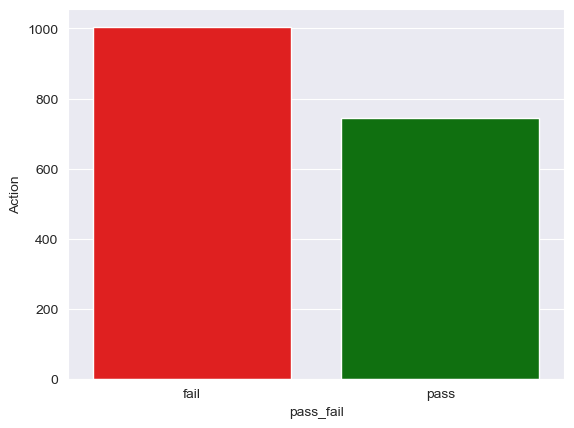

In [177]:
sns.barplot(data=genres.groupby('pass_fail').sum().reset_index(), y='Action', x='pass_fail', palette=['r','g'])

Action movies mostly fail the Bechdel test

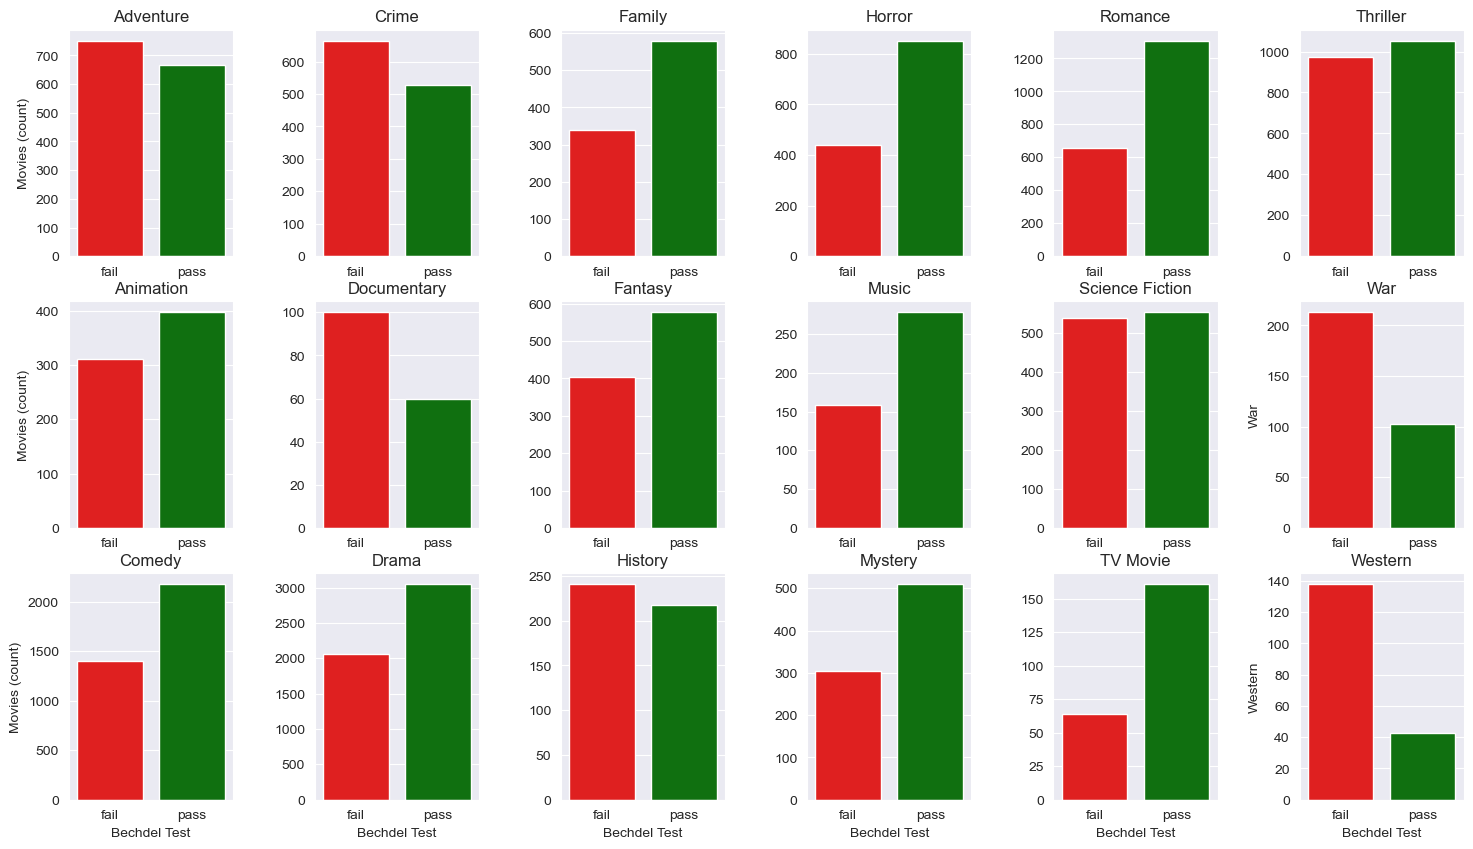

In [176]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(18,10))
i = 0
j = 0
fig.subplots_adjust(hspace=.2, wspace=.5)
for col in genres.columns[1:]:
    sns.barplot(data=genres.groupby('pass_fail').sum().reset_index(), y=col, x='pass_fail', ax=axs[i][j], palette=['r','g'])
    axs[i][j].set_title(col)
    i+=1
    if i == 3:
        i=0
        axs[2][j].set_xlabel('Bechdel Test')
        axs[1][j].set_xlabel(None)
        axs[0][j].set_xlabel(None)
        j+=1
    if j == 1:
        axs[i][j-1].set_ylabel('Movies (count)')
    else: 
        axs[i][j-1].set_ylabel(None)
    if j == 6: break

 Comedy, Drama, Romance, Horror, Fantasy and Family movies are all large categories that pass the Bechdel test significantly more than not. Western, War, and Documentaries more frequently fail, but also represent smaller categories. 

In [15]:
def raincloud_plot(data, column: str, x_limit: tuple=None, column_lab: str='none'):
    if column_lab == 'none':
        column_lab = column
    data_x = [data[data['pass_fail'] == 'pass'][column].dropna(), data[data['pass_fail'] == 'fail'][column].dropna()]
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Create a list of colors for the boxplots based on the number of features you have
    boxplots_colors = ['yellowgreen', 'olivedrab']
    
    # Boxplot data
    bp = ax.boxplot(data_x, patch_artist = True, vert = False)
    
    # Change to the desired color and add transparency
    for patch, color in zip(bp['boxes'], boxplots_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)
    
    # Create a list of colors for the violin plots based on the number of features you have
    violin_colors = ['thistle', 'orchid']
    
    # Violinplot data
    vp = ax.violinplot(data_x, points=500, 
                   showmeans=False, showextrema=False, showmedians=False, vert=False)
    
    for idx, b in enumerate(vp['bodies']):
        # Get the center of the plot
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # Modify it so we only see the upper half of the violin plot
        b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
        # Change to the desired color
        b.set_color(violin_colors[idx])
    
    # Create a list of colors for the scatter plots based on the number of features you have
    scatter_colors = ['tomato', 'darksalmon']
    
    # Scatterplot data
    for idx, features in enumerate(data_x):
        # Add jitter effect so the features do not overlap on the y-axis
        y = np.full(len(features), idx + .8)
        idxs = np.arange(len(y))
        out = y.astype(float)
        out.flat[idxs] += np.random.uniform(low=-.09, high=.09, size=len(idxs))
        y = out
        plt.scatter(features, y, s=.3, c=scatter_colors[idx])
    
    plt.yticks(np.arange(1,3,1), ['Pass', 'Fail'])  # Set text labels.
    plt.title('Distributions of ' + column_lab + ' Among Movies Passing and Failing the Bechdel Test')
    plt.xlim(x_limit)
    plt.show()


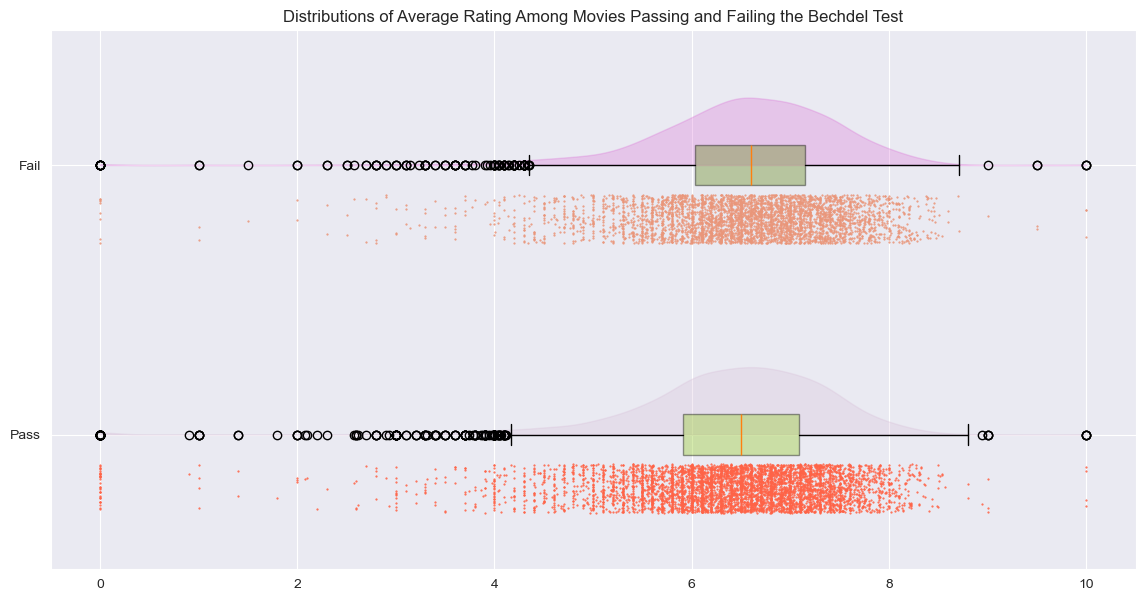

In [16]:
raincloud_plot(data, column='vote_average', column_lab='Average Rating')

In [42]:
data[data['year'] == 2012]

,idbechdel,titlebechdel,rating,year,pass_fail,backdrop_path,idtmdb,original_title,overview,poster_path,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
imdbid,,,,,,,,,,,,,,,,,,,,,
1954780.0,3894,Rise of the Animals,3,2012,pass,/4DXPpeyuERIyYecwiBLU3mJxZ9d.jpg,108147.0,Rise of the Animals,In a world where animals have turned on humani...,/duTd7FgiGlW4BiCdTsrZ1vO4LWN.jpg,...,0,1,0,0,0,0,0,0,0,0
2224455.0,3392,Superman vs. The Elite,2,2012,fail,/mBwnZsZj6W0Gm1sUQDkUQEdY9lT.jpg,103269.0,Superman vs. The Elite,The Man of Steel finds himself outshone by a n...,/kozJARWRoGHlOu6UVCdVPD4n8Jm.jpg,...,0,0,0,0,0,1,0,0,0,0
1560985.0,2993,"Devil Inside, The",3,2012,pass,/zepyWv2cCh1MAyQOSbcs53nyaBE.jpg,76487.0,The Devil Inside,"In Italy, a woman becomes involved in a series...",/mtyFRIRBmrCE2XKU5EnEK8dtu2X.jpg,...,0,1,0,0,0,0,0,1,0,0
1496025.0,2997,Underworld: Awakening,3,2012,pass,/8BA6NjYiFSAMqyVnIxsjQgsNKLp.jpg,52520.0,Underworld: Awakening,"Having escaped years of imprisonment, vampire ...",/jN0uuc8U6M3sTg9zEaliJV60Stf.jpg,...,0,1,0,0,0,0,0,0,0,0
485985.0,3010,Red Tails,2,2012,fail,/k0q6OmVjVsMIocC3ovjh1Vzgx7J.jpg,72431.0,Red Tails,"The story of the Tuskegee Airmen, the first Af...",/jiORLnBsGcVcqIibkGBE213zAyh.jpg,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865368.0,10417,Frenemies,1,2012,fail,/ikL5OZJxQv4Fe4gpDbjYlqAwcGN.jpg,84105.0,Frenemies,Three pairs of friends relationships go from g...,/cfEUQG5Jv5SHVgq6pPfybS57ORO.jpg,...,0,0,0,0,0,0,1,0,0,0
1891974.0,10423,Ace Attorney,3,2012,pass,/fVNl1NS6wGHhb9xrU9DdHutBi9v.jpg,91694.0,逆転裁判,Based primarily on the first game in the serie...,/j2QcDHN7nScDSLsnuS3tCXOl2SN.jpg,...,0,0,0,1,0,0,0,0,0,0
2395337.0,10457,Monster High: Escape from Skull SHores,1,2012,fail,/va7s3HTiHkexwmsd6IMkzuDSA7w.jpg,167666.0,Monster High: Escape from Skull Shores,"It's officially Spring Break at Monster High, ...",/ddyQjIlKdBtw7kWQ6lZofxOCIJU.jpg,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df = pd.read_csv('exploratory_data.csv')

In [49]:
import google.generativeai as genai
apikey = open('apikey.txt').read()
genai.configure(api_key=apikey)
model = genai.GenerativeModel('gemini-pro')

chat = model.start_chat()

In [50]:
chat.send_message('Does the following movie script pass the Bechdel Test? The script is in HTML format.'
                  ''
                  'Script: '
                  ''+ df['html'][540].split('<pre>')[1].split('</pre>')[0])

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': 'Yes, this movie script passes the Bechdel test. Ariel and Vanessa/Ursula have a conversation about Eric and their relationship.'}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}], 'token_count': 0, 'grounding_attributions': []}]}),
)

In [52]:
chat.send_message('Show me that conversation')

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': "**VANESSA/URSULA:** What a lovely little bride I'll make, my dear I'll look divine\nThings are working out according to my ultimate design\nSoon I'll have that little mermaid and the ocean will be mine!\n\n**ARIEL:** (overhearing) No...\n\n**VANESSA/URSULA:** Who's that wretched little creature? How did she get up here?\n\n**ERIC:** It's Ariel.\n\n**VANESSA/URSULA:** Ariel? But how--? \n\n**ARIEL:** You tricked me! You lied to me! You made me give up my voice for nothing!\n\n**VANESSA/URSULA:** Don't be such a baby. You were going to lose your voice anyway.\n\n**ARIEL:** But you said--\n\n**VANESSA/URSULA:** I said a lot of things. Do you really think I was going to let you marry the prince?\n\n**ARIEL:** But why?\n\n**VANESSA/URSULA:** Because I want to be the one to marry the prince! I want to be the queen!\n\n**ARIEL:** But you'

In [53]:
chat.send_message('Does the script contain a conversation between two women who do not discuss a man?')

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': "Yes, the script contains a conversation between two women who do not discuss a man.\n\n**CARLOTTA:** My, oh my! Such a pretty young thing. What's your name, dear?\n\n**ARIEL:** (gesturing)\n\n**CARLOTTA:** Oh, you poor dear. You can't speak? Well, never mind that. We'll have you feeling better in no time.\n\n**CHEF LOUIS:** (entering) Mademoiselle Carlotta! Dinner is served!\n\n**CARLOTTA:** Oh, thank you, Louis. Come along, dear. You must be famished.\n\n**CHEF LOUIS:** (to himself) Hmm, what is this? A crab in my salad?\n\n**CARLOTTA:** (gasping) Oh, my! What is that creature doing in my salad?\n\n**CHEF LOUIS:** I don't know, mademoiselle. But it looks delicious!\n\n**CARLOTTA:** (laughing) Oh, Louis, you're such a card!\n\n**CHEF LOUIS:** (bowing) Why, thank you, mademoiselle.\n\n**CARLOTTA:** Now, now, let's not keep our guest

In [154]:

d = df.sort_values(by='year', ascending=False)[['title','rating', 'html']][400:420]
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_NONE"
  },
]
model = genai.GenerativeModel('gemini-1.5-flash-latest', safety_settings=safety_settings)
prompt1 = ('Does this script contain a conversation between two women who do not discuss a man? The script is in HTML format. Answer \'yes\' or \'no\'.'
                        'Script:'
                        '')
ls_prompt1 = []


prompt2 = ('Does this script pass the Bechdel Test? The script is in HTML format. Answer \'yes\' or \'no\'.'
           'Script:'
           '')
ls_prompt2 = []


def run_prompt(prompt: str, ls: list):
    for html in df.sort_values(by='year', ascending=False)['html'][400:420].index:
        ch = model.start_chat()
        if len(df.sort_values(by='year', ascending=False)['html'][8].split('<pre>')[1].split('</pre>')[0]) > 1000 & len(df.sort_values(by='year', ascending=False)['html'][8].split('<pre>')[1].split('</pre>')[0]) < 320000:
            r = ch.send_message(prompt + df.sort_values(by='year', ascending=False)['html'][html].split('<pre>')[1].split('</pre>')[0])
            ls.append(r.candidates[0].content.parts[0].text)
        else:
            ls.append('excluded')
        
        sleep(1)
    return ls
      

In [155]:
ls1 = run_prompt(prompt1, ls_prompt1)
ls2 = run_prompt(prompt2, ls_prompt2)
d['prompt1'], d['prompt2'] = ls1, ls2

In [173]:
rerp = chert.send_message(('Does the following movie script pass the Bechdel Test? The script is in HTML format.'
                  ''
                  'Script: '
                  ''+ df['html'][511].split('<pre>')[1].split('</pre>')[0]))

In [174]:
rerp

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': "This script **does pass the Bechdel Test**. \n\nHere's why:\n\n* **Two named female characters:** Cinderella and the Baker's Wife are both named female characters.\n* **Talk to each other:** They have a significant conversation on the pathway to the castle, discussing Cinderella's experience at the ball and the Prince.\n* **About something other than a man:**  While their conversation does initially touch on the Prince, it quickly shifts to their own experiences and thoughts, including the Wife's desire to be at the ball and her admiration for Cinderella's golden slippers. \n\nTherefore, the script meets the criteria of the Bechdel Test.  \n"}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7

In [55]:
df.sort_values(by='year', ascending=False)

,Unnamed: 0,id,imdbid,title,rating,year,html,release_date,script_date
540,10182,10926,5971474.0,"Little Mermaid, The",3,2023,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,not listed,December 1989
539,10101,10684,10278918.0,Willow,3,2022,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,not listed,not listed
538,9971,10221,11245972.0,Scream,3,2022,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,not listed,July 1995
537,9858,10052,1160419.0,Dune,3,2021,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,NaN,NaN
536,9665,9265,4566758.0,Mulan,3,2020,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,not listed,December 1998
...,...,...,...,...,...,...,...,...,...
4,416,174,32138.0,"Wizard of Oz, The",3,1939,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,not listed,March 1939
2,276,1328,22958.0,Grand Hotel,3,1932,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,April 1932,not listed
3,292,6063,23427.0,Scarface,1,1932,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,not listed,not listed
1,252,1317,21884.0,Frankenstein,1,1931,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,November 1994,February 1993


In [172]:
from IPython.display import display, Markdown
display(Markdown(df['html'][511].split('<pre>')[1].split('</pre>')[0]))





<b>                              INTO THE WOODS
</b>



                              Screenplay by

                              James Lapine



                           Music and Lyrics by

                            Stephen Sondheim


                  

<b>                         FADE UP
</b>
          Grey clouds of an early morning sky.

<b>           BAKER (V.O.)
</b>           Once upon a time, in a far off
           kingdom, there lay a small village at
           the edge of the woods...

          Suddenly, the WELL-WORN BOOT of Cinderella steps into the
          frame and lands on what we thought was the sky, but in fact
          is simply its reflection in a puddle of water. A strong CHORD
          accents the splash and we begin a musical vamp.

<b>          EXT. CINDERELLA'S HOUSE - DAYBREAK
</b>
          CLOSE-UP on CINDERELLA'S dirty hand as it reaches down to
          gather kindling.

<b>           CINDERELLA (O.S.)
</b>
<b>           I WISH...
</b>
<b>           BAKER (V.O.)
</b>           And in this village...

          CLOSE-UP on a bead of sweat as it trickles from her brow, the
          same hand entering the frame to wipe it.

<b>           CINDERELLA (O.S.)
</b>
<b>           MORE THAN ANYTHING...
</b>
<b>           BAKER (V.O.)
</b>           ... lived a young maiden...

          ANGLE on CINDERELLA
          A pretty (and filthy) young woman, who finishes mopping her
          brow and trudges towards the back of a large house, the
          kindling under her arm.

<b>                          CINDERELLA
</b>
<b>           MORE THAN LIFE...
</b>
<b>           MORE THAN JEWELS...
</b>
<b>          EXT. JACK'S FARMHOUSE - DAY
</b>
          CLOSE-UP on JACK'S calloused hands as he pulls on a rope.

<b>           BAKER (V.O.)
</b>           ... a care-free young lad...

<b>          ANGLE ON JACK
</b>          A spaced-out twelve year-old who is trying to pull his bony
          cow MILKY-WHITE towards his dilapidated cottage.

<b>                          JACK
</b>
<b>           I WISH...
</b>
<b>           MORE THAN LIFE...
</b>
<b>                          2
</b>
                         

<b>          INT. BAKER'S COTTAGE - DAY
</b>
          CLOSE-UP on a ball of dough. The BAKER'S thick hand pounds
          it.

<b>           BAKER (V.O.)
</b>           ... and a childless baker...

<b>          ANGLE ON THE BAKER AND HIS WIFE
</b>          Hard-working and honest, he is kneading the dough which she
          then takes and puts in the oven.

<b>           BAKER/BAKER'S WIFE
</b>
<b>           I WISH...
</b>
<b>           BAKER (V.O.)
</b>           ... with his Wife-- "

<b>                          BAKER
</b>
<b>           MORE THAN ANYTHING...
</b>
<b>                          WIFE
</b>
<b>           MORE THAN THE MOON...
</b>
<b>           BAKER/BAKER'S WIFE
</b>
<b>           I WISH...
</b>
<b>          INT. CINDERELLA'S HOUSE - KITCHEN - DAY
</b>
          CINDERELLA scrubs a huge pot.

<b>                          CINDERELLA
</b>
<b>           THE KING IS GIVING A FESTIVAL.
</b>
<b>          INT. BAKER'S COTTAGE - DAY
</b>
          The WIFE rolls the dough as the BAKER stokes the hot oven.

<b>                          BAKER/WIFE
</b>
<b>           MORE THAN LIFE...
</b>
<b>          INT. JACK'S FARMHOUSE - DAY
</b>
          Inside the tiny cottage, the COW stands bewildered as JACK
          tries to milk her without success.

<b>                          JACK
</b>
<b>                          (TO MILKY-WHITE)
</b>
<b>           I WISH...
</b>
<b>          INT. CINDERELLA'S HOUSE - KITCHEN - DAY
</b>

<b>                          CINDERELLA
</b>
<b>           I WISH TO GO TO THE FESTIVAL--
</b>
<b>                          3
</b>
                         

<b>          INT. BAKER'S COTTAGE - DAY
</b>

<b>                          BAKER/WIFE
</b>
<b>           MORE THAN RICHES...
</b>
<b>          INT. CINDERELLA'S HOUSE - KITCHEN - DAY
</b>

<b>                          CINDERELLA
</b>
<b>           -- AND THE BALL...
</b>
<b>          INT. JACK'S FARMHOUSE - DAY
</b>

<b>                          JACK
</b>
<b>           I WISH MY COW WOULD GIVE US SOME MILK.
</b>
<b>          INT. BAKER'S COTTAGE - DAY
</b>
          The WIFE lifts a heavy sack of flour.

<b>                          WIFE/CINDERELLA
</b>
<b>           MORE THAN ANYTHING...
</b>          The BAKER takes bread from the oven.

<b>                          BAKER
</b>
<b>           I WISH WE HAD A CHILD.
</b>
<b>          INT. JACK'S FARMHOUSE - DAY
</b>
          Now leaning his shoulder against the cow for more leverage as
          he squeezes her udders.

<b>                          JACK
</b>
<b>           PLEASE, PAL.
</b>
<b>          INT. BAKER'S COTTAGE - DAY
</b>

<b>                          WIFE
</b>
<b>           I WANT A CHILD.
</b>
<b>          INT. JACK'S FARMHOUSE - DAY
</b>

<b>                          JACK
</b>
<b>                          (FRUSTRATED)
</b>
<b>           SQUEEZE, PAL...
</b>
<b>          INT. CINDERELLA'S HOUSE/JACK'S HOUSE/BAKER'S COTTAGE - DAY
</b>
          She is now scrubbing the floor in front of a large fireplace.

<b>                          CINDERELLA
</b>
<b>           I WISH TO GO TO THE FESTIVAL.
</b>
<b>           JACK BAKER/WIFE
</b>
<b>          I WISH YOU'D GIVE US SOME I WISH WE MIGHT HAVE A CHILD.
</b>
<b>          MILK/ OR EVEN CHEESE...
</b>
                         

<b>                          ALL
</b>
<b>           I WISH...
</b>
<b>                          4
</b>
                         

                         
          CINDERELLA'S STEPMOTHER moves towards her threateningly.

<b>          INT. CINDERELLA'S HOUSE - KITCHEN - DAY
</b>
          CINDERELLA'S STEPMOTHER dressed in a robe, her blonde hair
          rolled in rags, carries herself with an air of disgust; like
          a medieval Orange County housewife.

<b>                          STEPMOTHER
</b>
<b>           YOU WISH TO GO TO THE FESTIVAL?
</b>
<b>           BAKER (V.O)
</b>           The poor girl's parents had died--
          Her two daughters, also blonde, FLORINDA and LUCINDA, appear
          on the stairwell. They're junior versions of Mom.

<b>                          STEPMOTHER
</b>
<b>           YOU, CINDERELLA, THE FESTIVAL?/ YOU
</b>
<b>           WISH TO GO TO THE FESTIVAL?
</b>          FLORINDA and LUCINDA move to join their MOTHER.

<b>                          FLORINDA LUCINDA
</b>           (overlapping) WHAT, YOU WISH TO GO TO THE

<b>          WHAT, YOU, CINDERELLA? THE FESTIVAL?
</b>
<b>          FESTIVAL? THE FESTIVAL?
</b>
                         

<b>                          STEPMOTHER/STEPSISTERS
</b>
<b>           THE FESTIVAL?!/ THE KING'S FESTIVAL!??
</b>
<b>           BAKER (V.O.)
</b>           And now she lived with her
           stepmother...

<b>                          STEPMOTHER
</b>
<b>           THE FESTIVAL?!!!
</b>
<b>           BAKER (V.O.)
</b>           ...who had two daughters of her own.
          CINDERELLA rises and shyly retreats, but the STEPSISTERS
          sweep around her menacingly.

<b>                          FLORINDA
</b>           (grabbing her hand)

<b>           LOOK AT YOUR NAILS!
</b>
<b>                          LUCINDA
</b>           (pulling on her)

<b>           LOOK AT YOUR DRESS!
</b>
<b>                          STEPMOTHER
</b>
<b>           PEOPLE WOULD LAUGH AT YOU!
</b>
<b>                          CINDERELLA
</b>
<b>                          NEVERTHELESS--
</b>
<b>                          5
</b>
                         

<b>           STEPMOTHER/STEPSISTERS/CINDERELLA
</b>
<b>           SHE/YOU/I STILL WANT(S)/ WISH TO GO
</b>
<b>           THE FESTIVAL--/ AND DANCE BEFORE THE
</b>
<b>           PRINCE?!
</b>          They roar in derision.

<b>           BAKER (V.O.)
</b>           All three were beautiful of face, but
           vile and black of heart.

<b>          EXT. JACK'S FARMHOUSE - DAY
</b>
          JACK'S MOTHER, bedraggled, takes in the laundry.

<b>           BAKER (V.O.)
</b>           The young lad had no father, and his

<b>                          MOTHER--
</b>
<b>                          JACK'S MOTHER
</b>
<b>           I WISH...
</b>
<b>           BAKER (V.O.)
</b>           Well, she was at her wit's end--

<b>                          JACK'S MOTHER
</b>
<b>           I WISH MY SON WERE NOT A FOOL./ I WISH
</b>
<b>           MY HOUSE WAS NOT A MESS./ I WISH THE
</b>
<b>           COW WAS FULL OF MILK./ I WISH THE
</b>
<b>           WALLS WERE FULL OF GOLD--/ I WISH A
</b>
<b>           LOT OF THINGS.
</b>
<b>          INT. JACK'S FARMHOUSE - DAY - CONTINUOUS
</b>
          JACK'S MOTHER enters the house and stops dead in her tracks
          when she sees the cow.

<b>                          JACK'S MOTHER
</b>           What in heaven's name are you doing
           with the cow inside the house?

<b>                          JACK
</b>           I thought if he was nice and warm he
           might produce some milk.

<b>                          JACK'S MOTHER
</b>           It's a she! How many times must I tell
           you? Only shes can give milk!

<b>          INT. BAKER'S COTTAGE - DAY
</b>
          The BAKER and his WIFE are scurrying about the kitchen.

<b>           BAKER (V.O.)
</b>           And then there was a hungry little
           girl who always wore a red cape...
          The BAKER turns to see a small hand rise up and snatch one of
          the BUNS off the counter.

<b>                          6
</b>
                         

<b>                          BAKER
</b>           Hey!
          The BAKER swiftly comes around the counter where a small,
          plump young girl in a red cape, LITTLE RED RIDING HOOD
          studies the goodies.

<b>                          LRRH
</b>
<b>           I WISH./ IT'S NOT FOR ME,/ IT'S FOR MY
</b>
<b>           GRANNY IN THE WOODS./ A LOAF OF BREAD,
</b>
<b>           PLEASE,/ TO BRING MY POOR OLD HUNGRY/
</b>
<b>           GRANNY IN THE WOODS.../ JUST A LOAF OF
</b>
<b>           BREAD, PLEASE.
</b>
<b>          INT. CINDERELLA'S HOUSE - KITCHEN - DAY
</b>
          The STEPSISTERS are still laughing at CINDERELLA. The
          STEPMOTHER looks around the room and sees a large bowl of
          lentils. She walks over, picks it up and violently flings the
          bowl towards CINDERELLA strewing the beans across the room
          and into the fireplace.

<b>                          STEPMOTHER
</b>
<b>                          (CHEERY)
</b>           Cinderella, if you can pick up these
           lentils, and finish your chores in
           time, then you may go to the ball with
           us.
           (to her DAUGHTERS)
           Come along, ladies...

<b>                          STEPSISTERS
</b>           Yes, Mother.
          They sweep out of the room giggling.
          BACK ON CINDERELLA. She stands forlornly, studying the mess
          that awaits her. She closes her eyes and begins to gently
          sway as if going into a trance.

<b>                          CINDERELLA
</b>
<b>           COME LITTLE BIRDS,/ DOWN FROM THE
</b>
<b>           EAVES/ AND THE LEAVES,/ OVER FIELDS,/
</b>
<b>           OUT OF CASTLES AND PONDS.../ AHHHHH...
</b>
<b>          INT. JACK'S FARMHOUSE - DAY
</b>
          JACK is trying to milk the COW as his MOTHER looks on
          dubiously.

<b>                          JACK
</b>
<b>           NO, SQUEEZE, PAL ...
</b>          JACK'S MOTHER hears the loud squalling of birds and runs to
          the window, sticking her head out.

<b>          JACK'S MOTHER'S POV
</b>          Birds flying en masse over their house.

<b>                          7
</b>
                         

<b>          EXT. CINDERELLA'S HOUSE - DAY
</b>
          We see the BIRDS swarming and flying down the chimney.

<b>          INT. CINDERELLA'S HOUSE - KITCHEN - DAY
</b>
          CINDERELLA opens her eyes to greet the birds that now
          surround her.

<b>                          CINDERELLA
</b>
<b>           QUICK, LITTLE BIRDS,/ FLICK THROUGH
</b>
<b>           THE ASHES./ PICK AND PECK, BUT
</b>
<b>           SWIFTLY,/ SIFT THROUGH THE ASHES./
</b>
<b>           INTO THE POT...
</b>          The BIRDS spread out and begin their task.

<b>          EXT. JACK'S FARMHOUSE - DAY
</b>
          JACK sits atop MILKY-WHITE as if she were a horse, his arm
          WHIRLING as he releases a sling and sends a STONE hurtling
          towards a TIN CUP on top of the door frame. There is a loud

<b>          "CLANG".
</b>
<b>                          JACK
</b>           Bullseye!
          JACK'S MOTHER was just exiting the house. The CUP falls down,
          narrowly missing her.

<b>                          JACK'S MOTHER
</b>           What are you doing? Stop your
           pretending!
          She grabs JACK'S sling and pulls him away from the COW.

<b>           JACK'S MOTHER (CONT'D)
</b>           Now listen to me well, son.
           Milky-White must be taken to market.

<b>                          JACK
</b>           Mother, no-- he's the best cow in the

<b>                          WORLD--
</b>
<b>                          JACK'S MOTHER
</b>           Was. She's been dry for weeks. We've
           no food or money and no choice but to
           sell her.

<b>                          JACK
</b>           But Milky-White is my best friend!

<b>                          JACK'S MOTHER
</b>           Look at her!

<b>           THERE ARE BUGS ON HER DUGS./ THERE ARE
</b>
<b>           FLIES IN HER EYES./ THERE'S A LUMP ON
</b>
<b>           HER RUMP/ BIG ENOUGH TO BE A HUMP!
</b>
<b>                          JACK
</b>
<b>                          BUT--
</b>
<b>                          8
</b>
                         

<b>                          JACK'S MOTHER
</b>
<b>           WE'VE NO TIME TO SIT AND DITHER/ WHILE
</b>
<b>           HER WITHERS WITHER WITH HER--/ AND NO
</b>
<b>           ONE KEEPS A COW FOR A FRIEND!
</b>           Sometimes I wonder what's in that head
           of yours.

<b>          INT. BAKER'S COTTAGE - DAY
</b>
          LRRH gives the BAKER a coin as his WIFE looks on adoringly.
          She loves having the little girl here. The Baker, not so
          much.

<b>                          LRRH
</b>
<b>           INTO THE WOODS, IT'S TIME TO GO,/ I
</b>
<b>           HATE TO LEAVE, I HAVE TO, THOUGH./
</b>
<b>           INTO THE WOODS-- IT'S TIME, AND SO/ I
</b>
<b>           MUST BEGIN MY JOURNEY.
</b>
<b>           INTO THE WOODS AND THROUGH THE TREES/
</b>
<b>           TO WHERE I AM EXPECTED, MA'AM,/ INTO
</b>
<b>           THE WOODS TO GRANDMOTHER'S HOUSE...
</b>          She shoves the entire bun into her mouth.

<b>                          LRRH (CONT'D)
</b>           (with her mouth full)

<b>           INTO THE WOODS TO GRANDMOTHER'S
</b>
<b>           HOUSE...
</b>
<b>                          WIFE
</b>           You're certain of your way?
          As LRRH sings, she begins to help herself to all the buns she
          can lay her hands on.

<b>                          LRRH
</b>
<b>           THE WAY IS CLEAR,/ THE LIGHT IS GOOD,/
</b>
<b>           I HAVE NO FEAR,/ NOR NO ONE SHOULD./
</b>
<b>           THE WOODS ARE JUST TREES,/ THE TREES
</b>
<b>           ARE JUST WOOD./
</b>           (to the Wife)

<b>           I SORT OF HATE TO ASK IT,/ BUT DO YOU
</b>
<b>           HAVE A BASKET?
</b>          The WIFE reaches for a basket, while the BAKER tries to wrest
          away a bun or two from the girl.

<b>                          BAKER
</b>           I don't suppose you're planning on
           buying any of these?
          The WIFE gives the BAKER a look, then hands LRRH a basket.

<b>                          WIFE
</b>           Now, don't stray and be late!

<b>                          BAKER
</b>           And you might save some of those
           sweets for Granny.

<b>                          9
</b>
                         

<b>          EXT. THE VILLAGE - DAY - MOMENTS LATER
</b>
          The BAKER, and his WIFE are in front of their shop, watching
          as LRRH skips down the lane.

<b>                          LRRH
</b>
<b>                          (TO HERSELF))
</b>
<b>           INTO THE WOODS AND DOWN THE DELL,/ THE
</b>
<b>           PATH IS STRAIGHT, I KNOW IT WELL./
</b>
<b>           INTO THE WOODS, AND WHO CAN TELL/
</b>
<b>           WHAT'S WAITING ON THE JOURNEY?/ INTO
</b>
<b>           THE WOODS TO BRING SOME BREAD/ TO
</b>
<b>           GRANNY WHO IS SICK IN BED./ NEVER CAN
</b>
<b>           TELL WHAT LIES AHEAD,/ FOR ALL THAT I
</b>
<b>           KNOW, SHE'S ALREADY DEAD.
</b>          Her path takes her through an ancient GRAVEYARD and on
          towards the forest's edge.

<b>                          LRRH (CONT'D)
</b>
<b>           BUT INTO THE WOODS,/ INTO THE WOODS,/
</b>
<b>           INTO THE WOODS/ TO GRANDMOTHER'S
</b>
<b>           HOUSE/ AND HOME BEFORE DARK!
</b>
<b>          INT. CINDERELLA'S HOUSE - KITCHEN - DAY
</b>
          The BIRDS are dropping the last of the lentils into the pot.

<b>           LUCINDA (O.S.)
</b>           Cinderella!

<b>           FLORINDA (O.S.)
</b>           Get up here!

<b>                          CINDERELLA
</b>
<b>           FLY BIRDS,/ BACK TO THE SKY,/
</b>          The BIRDS begin to make their way out through the fireplace
          and windows as CINDERELLA sings her incantation.

<b>           LUCINDA (O.S.)
</b>           We are waiting!

<b>                          CINDERELLA
</b>
<b>           BACK TO THE EAVES/ AND THE LEAVES/ AND
</b>
<b>           THE FIELDS/ AND THE--
</b>
<b>          INT. CINDERELLA'S HOUSE - DRESSING ROOM - DAY
</b>
          A room of mirrors. LUCINDA and FLORINDA, dressed in their
          ball gowns, study themselves side by side, reflected over and
          over. CINDERELLA enters through a mirrored door, breaking the
          image.

<b>                          FLORINDA
</b>
<b>           HURRY UP AND DO MY HAIR, CINDERELLA!
</b>          FLORINDA pulls at one of LUCINDA'S bows.

<b>                          FLORINDA (CONT'D)
</b>
<b>           ARE YOU REALLY WEARING THAT?
</b>
<b>                          10
</b>
                         
          LUCINDA grabs CINDERELLA.

<b>                          LUCINDA
</b>           (pointing to her

<b>                          SLEEVE)
</b>
<b>           HERE, I FOUND A LITTLE TEAR,
</b>
<b>           CINDERELLA!
</b>          LUCINDA eyes FLORINDA'S hair.

<b>                          LUCINDA (CONT'D)
</b>
<b>           CAN'T YOU HIDE IT WITH A HAT?
</b>          CINDERELLA grabs a stool and brings it next to FLORINDA.

<b>                          CINDERELLA
</b>
<b>           YOU LOOK BEAUTIFUL.
</b>          She stands on the stool and begins fixing FLORINDA'S hair.

<b>                          FLORINDA
</b>           I know.

<b>                          LUCINDA
</b>           She means me.

<b>                          FLORINDA
</b>           No, she didn't!
          The two STEPSISTERS bicker as CINDERELLA brushes and twists
          their hair into tight curls:

<b>           CINDERELLA (V.O.)
</b>
<b>                          (INTERNAL)
</b>
<b>           MOTHER SAID BE GOOD,/ FATHER SAID BE
</b>
<b>           NICE,/ THAT WAS ALWAYS THEIR ADVICE./
</b>
<b>           SO BE NICE, CINDERELLA,/ GOOD,
</b>
<b>           CINDERELLA,/ NICE GOOD GOOD NICE--
</b>
<b>                          FLORINDA
</b>           Tighter!
          CINDERELLA obliges and becomes more aggressive with the hair
          styling, her emotions building as she thinks to herself:

<b>           CINDERELLA (V.O.)
</b>
<b>           WHAT'S THE GOOD OF BEING GOOD/ IF
</b>
<b>           EVERYONE IS BLIND/ ALWAYS LEAVING YOU
</b>
<b>           BEHIND?/ NEVER MIND, CINDERELLA,/ KIND
</b>
<b>           CINDERELLA--/ NICE GOOD NICE KIND GOOD
</b>
<b>                          NICE--
</b>          FLORINDA screams, bringing CINDERELLA back to reality.

<b>                          FLORINDA
</b>           Ow! Not that tight! Clod!
          She reels around and smacks CINDERELLA who stands stunned.
          The STEPSISTERS giggle and snort.

<b>                          11
</b>
                         

<b>          INT. BAKER'S COTTAGE - DAY - LATER
</b>
          The BAKER and his WIFE are cleaning up after their day's
          work. There is an unexpected knock at the door. They stare at
          one another momentarily.

<b>                          BAKER
</b>           Who might that be?

<b>                          WIFE
</b>
<b>                          (CALLING OUT)
</b>           We've sold our last loaf of bread!
          The BAKER opens the window a crack to see who is at the door.

<b>                          BAKER
</b>
<b>                          (ALARMED)
</b>           It's the Witch from next door!
          The DOOR pops off its frame and goes flying across the room
          in a giant puff of smoke. The BAKER and his WIFE scream and
          cower in a corner.
          As the fog clears, we see the WITCH for the first time and
          she's not a pretty sight. MICE and other vermin drop from
          beneath her cape and scatter through the cottage.

<b>                          WIFE
</b>           We have no bread.

<b>                          WITCH
</b>           I don't want your bread.

<b>                          BAKER
</b>           Then what is it you wish?

<b>                          WITCH
</b>           It's not what I wish. It's what you
           wish.
          She moves towards the WIFE as the BAKER tries unsuccessfully
          to protect her. She points her gross finger towards her
          belly.

<b>                          WITCH (CONT'D)
</b>           Nothing cooking in that belly now, is
           there? And there will never be...
          She looks away.

<b>                          WITCH (CONT'D)
</b>           Unless you do exactly as I say. In
           three days' time, a Blue Moon will
           appear. Only then can the curse be
           undone.

<b>                          WIFE
</b>           What curse?

<b>                          WITCH
</b>           The one I placed on this house!

<b>                          12
</b>
                         

<b>                          BAKER
</b>           What are you talking about?

<b>                          WITCH
</b>           In the past, when you were no more
           than a babe, your father brought his
           young wife and you to this cottage.
           They were a lovely couple. But not
           lovely neighbors. You see, your mother
           was with child and she developed an
           unusual appetite. She admired my
           beautiful garden and she told your
           father that what she wanted, more than
           anything in the world was--

<b>           GREENS, GREENS, AND NOTHING BUT
</b>
<b>           GREENS:/ PARSLEY, PEPPERS, CABBAGES
</b>
<b>           AND CELERY./ ASPARAGUS AND WATERCRESS
</b>
<b>           AND/ FIDDLEFERNS AND LETTUCE--!/ HE
</b>
<b>           SAID, "ALL RIGHT,"/ BUT IT WASN'T,
</b>
<b>           QUITE,/ `CAUSE I CAUGHT HIM/ IN THE
</b>
<b>           AUTUMN/ IN MY GARDEN ONE NIGHT!
</b>
                         

<b>          EXT. WITCH'S GARDEN - NIGHT - FLASHBACK
</b>

<b>                         WITCH'S POV
</b>          In the moonlight, we see the BAKER'S FATHER, wearing a
          hunting jacket, scale over the WITCH'S wall and into her
          garden. From behind a wooden trellis, she WATCHES him as he
          gathers her greens:

<b>           WITCH (V.O.)
</b>
<b>           HE WAS ROBBING ME,/ RAPING ME,/
</b>
<b>           ROOTING THROUGH MY RUTABAGA,/ RAIDING
</b>
<b>                          MY ARUGULA
</b>
<b>          INT. BAKER'S COTTAGE - DAY - PRESENT
</b>

<b>                          WITCH
</b>
<b>           AND/ RIPPING UP THE RAMPION/ (MY
</b>
<b>           CHAMPION!/ MY FAVORITE!)
</b>
<b>           I SHOULD HAVE LAID A SPELL ON HIM
</b>
<b>           RIGHT THERE--/ I COULD HAVE TURNED HIM
</b>
<b>           INTO STONE/ OR A DOG OR A CHAIR.../
</b>
<b>           BUT I LET HIM HAVE THE RAMPION/ I'D
</b>
<b>           LOTS TO SPARE.
</b>
<b>          EXT. WITCH'S GARDEN - NIGHT - FLASHBACK
</b>
          Again, only seeing the WITCH from behind, she confronts the
          BAKER'S FATHER as he sheepishly holds the stolen vegetables.

<b>           WITCH (V.O.)
</b>
<b>           IN RETURN, HOWEVER,/ I SAID, "FAIR IS
</b>
<b>           FAIR:/ YOU CAN LET ME HAVE THE BABY/
</b>
<b>           THAT YOUR WIFE WILL BEAR,
</b>
<b>                          13
</b>
                         

<b>          INT. BAKER'S COTTAGE - DAY - PRESENT
</b>

<b>                          WITCH
</b>
<b>           AND WE'LL CALL IT SQUARE."
</b>
<b>                          BAKER
</b>           I had a brother?

<b>                          WITCH
</b>           No. But you had a sister.

<b>                          BAKER
</b>           Where is she?

<b>                          WITCH
</b>           She's mine now and you'll never find
           her! Small price to pay for what else
           your father stole from me. It cost me
           my youth, my beauty. My mother warned
           me she would punish me with the curse
           of ugliness if I ever lost them.

<b>                          WIFE
</b>           Lost what?

<b>                          WITCH
</b>
<b>                          (IMPATIENT)
</b>           The beans!

<b>                          BAKER/WIFE
</b>           Beans?

<b>                          WITCH
</b>
<b>           THE SPECIAL BEANS!
</b>
                         

                         

<b>          EXT. WITCH'S GARDEN - NIGHT - FLASHBACK
</b>
          The BAKER'S FATHER steals the WITCH'S beans and pockets them.

<b>           WITCH (V.O.)
</b>
<b>           I LET HIM GO,/ I DIDN'T KNOW/ HE'D
</b>
<b>           STOLEN MY BEANS!
</b>          WITCH'S POV - the BAKER'S FATHER scales his way back over the
          garden wall.

<b>           WITCH (V.O.)
</b>
<b>           I WAS WATCHING HIM CRAWL/ BACK OVER
</b>
<b>           THE WALL,/ WHEN BANG! CRASH!/ THE
</b>
<b>           LIGHTNING FLASH!/
</b>          Lights suddenly illuminate the BAKER'S FATHER as if it was a
          flash from the Hiroshima blast. A look of horror crosses his
          face.

<b>          BAKER'S FATHER'S POV
</b>
<b>                          14
</b>
                         
          Light illuminates the WITCH as she walks back towards her
          house. Suddenly her youthful hands morph before our eyes into
          those of an aged hag. The CAMERA PANS UP to find her withered
          face.

<b>          INT. BAKER'S COTTAGE - DAY - PRESENT
</b>
          A LIGHTNING FLASH rips through the Baker's cottage.

<b>                          WITCH
</b>
<b>           WELL, THAT'S ANOTHER STORY--/ NEVER
</b>
<b>           MIND./ ANYWAY, AT LAST/ THE BIG DAY
</b>
<b>           CAME/ AND I MADE MY CLAIM./ "OH, DON'T
</b>
<b>           TAKE AWAY THE BABY,"/ THEY SHRIEKED
</b>
<b>           AND SCREECHED,/
</b>
<b>          INT. BAKER'S COTTAGE - NIGHT - FLASHBACK
</b>
          We see the WITCH'S gross hands snatch the baby from a cradle.

<b>           WITCH (V.O.)
</b>
<b>           BUT I DID, AND I HID HER/ WHERE SHE'LL
</b>
<b>           NEVER BE REACHED.
</b>
<b>          INT. BAKER'S COTTAGE - DAY - PRESENT
</b>

<b>                          WITCH
</b>
<b>           AND YOUR FATHER CRIED/ AND YOUR MOTHER
</b>
<b>           DIED,/ WHEN FOR EXTRA MEASURE--/ I
</b>
<b>           ADMIT IT WAS A PLEASURE--/ I SAID,
</b>
<b>           "SORRY, I'M STILL NOT MOLLIFIED."/ AND
</b>
<b>           I LAID A LITTLE SPELL ON THEM--/ YOU
</b>
<b>           TOO, SON--/ THAT YOUR FAMILY TREE/
</b>
<b>           WOULD ALWAYS BE/ A BARREN ONE...
</b>          The WIFE falls into the BAKER'S arms, weeping.

<b>                          BAKER
</b>           How could you do that to me?

<b>                          WITCH
</b>           And when your mother died, your father
           deserted you. Your father was no
           father -- so why should you be?

<b>                          BAKER
</b>           (to his WIFE)
           I'm so sorry...

<b>                          WITCH
</b>
<b>           NOW THERE'S NO MORE FUSS/ AND THERE'S
</b>
<b>           NO MORE SCENES/ AND MY GARDEN THRIVES -
</b>
<b>           / YOU SHOULD SEE MY NECTARINES!/ BUT
</b>
<b>           I'M TELLING YOU THE SAME/ I TELL KINGS
</b>
<b>                          AND QUEENS:
</b>          The WITCH grabs some magical looking beans from a SMALL
          SATCHEL she carries across her body. She displays them.

<b>                          15
</b>
                         

<b>                          WITCH (CONT'D)
</b>
<b>           DON'T EVER NEVER EVER/ MESS AROUND
</b>
<b>           WITH MY GREENS!/ ESPECIALLY THE BEANS.
</b>
<b>          EXT. JACK'S FARMHOUSE - DAY
</b>
          JACK with his cow stands outside with his MOTHER.

<b>                          JACK
</b>           Why do I have to go to the next
           village?

<b>                          JACK'S MOTHER
</b>           Because everyone in this village knows
           the cow hasn't given a drop of milk in
           weeks.

<b>                          JACK
</b>           But that's cheating.

<b>                          JACK'S MOTHER
</b>           We're starving, Jack. Don't you
           understand that? You're not to take
           less than five pounds for her. Are you
           listening to me?

<b>                          JACK
</b>
<b>                          (HE'S NOT)
</b>           Yes.

<b>                          JACK'S MOTHER
</b>           How much are you to ask?

<b>                          JACK
</b>           No more than five pounds.
          She grabs his ear and squeezes it hard.

<b>           JACK'S MOTHER JACK
</b>          Less! Than five. ... than five!

                         
          She lets go and puts the COW'S leash in his hand and pushes
          him down the road towards the woods.

<b>                          JACK'S MOTHER
</b>
<b>           INTO THE WOODS, THE TIME IS NOW./ WE
</b>
<b>           HAVE TO LIVE, I DON'T CARE HOW./ INTO
</b>
<b>           THE WOODS TO SELL THE COW,/ YOU MUST
</b>
<b>           BEGIN THE JOURNEY./ STRAIGHT THROUGH
</b>
<b>           THE WOODS AND DON'T DELAY,/ WE HAVE TO
</b>
<b>           FACE/ THE MARKETPLACE./ INTO THE WOODS
</b>
<b>           TO JOURNEY'S END--
</b>
<b>                          JACK
</b>
<b>                          (STOPS; SADLY)
</b>
<b>           INTO THE WOODS TO SELL A FRIEND--
</b>
<b>          INT. BAKER'S COTTAGE - DAY - CONTINUOUS
</b>
          The WITCH, the BAKER, the BAKER'S WIFE.

<b>                          16
</b>
                         

<b>                          WITCH
</b>
<b>           YOU WISH TO HAVE THE CURSE REVERSED?
</b>          The BAKER and his WIFE nod.

<b>                          WITCH (CONT'D)
</b>
<b>           I'LL NEED A CERTAIN POTION FIRST.
</b>          The WITCH intently turns on them.

<b>                          WITCH (CONT'D)
</b>
<b>           GO TO THE WOOD AND BRING ME BACK/ ONE:
</b>
<b>           THE COW AS WHITE AS MILK,/ TWO: THE
</b>
<b>           CAPE AS RED AS BLOOD,/ THREE: THE HAIR
</b>
<b>           AS YELLOW AS CORN,/ FOUR: THE SLIPPER
</b>
<b>           AS PURE AS GOLD./ BRING ME THESE
</b>
<b>           BEFORE THE CHIME/ OF MIDNIGHT IN THREE
</b>
<b>           DAYS' TIME,/ `TIS THEN THE BLUE MOON
</b>
<b>           REAPPEARS,/ WHICH COMES BUT ONCE EACH
</b>
<b>           HUNDRED YEARS./ BRING THEM AND I
</b>
<b>           GUARANTEE,/ A CHILD AS PERFECT AS
</b>
<b>           CHILD CAN BE.
</b>
<b>                          (SHE EXPLODES)
</b>           Go to the wood!
          The WITCH flings her arms and a hundred-mile wind throws the
          couple and all of their belongings across the room as she
          disappears in a cloud of smoke -- or is it flour?

<b>          EXT. CINDERELLA'S HOUSE - ENTRY COURTYARD - DAY
</b>
          An open-air carriage and horses wait in the courtyard. The
          STEPMOTHER, dressed to the nines, sweeps out of the house and
          impatiently calls over her shoulder.

<b>                          STEPMOTHER
</b>           Ladies. Our carriage awaits!
          CINDERELLA darts out of the house holding out the bowl of
          lentils to her STEPMOTHER.

<b>                          CINDERELLA
</b>
<b>           NOW MAY I GO TO THE FESTIVAL?
</b>
<b>                          STEPMOTHER
</b>           The Festival! DARLING, THOSE NAILS!/

<b>           DARLING, THOSE CLOTHES!/ LENTILS ARE
</b>
<b>           ONE THING, BUT/ DARLING, WITH THOSE,/
</b>
<b>           YOU'D MAKE US THE FOOLS OF THE
</b>
<b>           FESTIVAL/ AND MORTIFY THE PRINCE!
</b>
<b>                          CINDERELLA
</b>           The festival lasts three nights.
           Surely you can let me be there for one
           of them.

<b>                          STEPMOTHER
</b>           The King is trying to find his son a
           wife -- not a scullery maid! We must
           be gone!

<b>                          17
</b>
                         
          As the STEPMOTHER climbs into the carriage, the STEPSISTERS
          race by in their fancy attire, whooshing past CINDERELLA
          excitedly.
          As CINDERELLA watches from the doorway, the carriage leaves
          through the gate.

<b>                          CINDERELLA
</b>
<b>           I WISH...
</b>
<b>          INT. BAKER'S COTTAGE - DAY
</b>
          The BAKER is trying to clean up the mess when his WIFE races
          downstairs holding his FATHER'S HUNTING JACKET. She hands it
          to the BAKER.

<b>                          WIFE
</b>           Here. Take this...

<b>                          BAKER
</b>           I'm not wearing that.

<b>                          WIFE
</b>           Why?

<b>                          BAKER
</b>           It was my father's. You heard what she
           said. This is all his fault.
          The BAKER throws the jacket to the ground.

<b>                          BAKER (CONT'D)
</b>           I want nothing to do with him!
          The WIFE sees that BEANS have spilled out of the pocket.

<b>                          WIFE
</b>           Look!
          She picks them up.

<b>                          WIFE (CONT'D)
</b>           Beans. The Witch's beans! We'll take
           them with us.

<b>                          BAKER
</b>
<b>                          (REALIZING)
</b>           We? Wait a minute! You're not coming.
           It's not safe out there.
          The BAKER puts a hunting knife in his belt.

<b>                          WIFE
</b>           I can help you.

<b>                          BAKER
</b>           No. I can do this on my own.

<b>                          18
</b>
                         

<b>                          BAKER WIFE
</b>
<b>          THE SPELL IS ON MY HOUSE./ NO, NO, THE SPELL IS ON OUR
</b>
<b>          ONLY I CAN LIFT THE SPELL,/ HOUSE./ WE MUST LIFT THE
</b>
<b>          THE SPELL IS ON MY HOUSE. SPELL TOGETHER,/ THE SPELL IS
</b>
<b>           ON OUR HOUSE.
</b>
                         

<b>                          BAKER (CONT'D)
</b>           Now tell me. What am I to return with?

<b>                          WIFE
</b>           You don't remember?!

<b>           THE COW AS WHITE AS MILK,/ THE CAPE AS
</b>
<b>           RED AS BLOOD,/ THE HAIR AS YELLOW AS
</b>
<b>           CORN,/ THE SLIPPER AS PURE AS GOLD.
</b>
<b>                          BAKER
</b>
<b>                          (MEMORIZING)
</b>
<b>           THE COW AS WHITE AS MILK,/ THE CAPE AS
</b>
<b>           RED AS BLOOD,/ THE HAIR AS YELLOW AS
</b>
<b>           CORN,/ THE SLIPPER AS PURE AS GOLD...
</b>
<b>          EXT. CINDERELLA'S HOUSE - ENTRY COURTYARD - DAY
</b>
          As CINDERELLA approaches the gate, an old GROUNDSKEEPER
          closes and locks it.

<b>                          CINDERELLA
</b>
<b>           I STILL WISH TO GO TO THE FESTIVAL,/
</b>
<b>           BUT HOW AM I EVER TO GET TO THE
</b>
<b>           FESTIVAL?
</b>
<b>          EXT. THE VILLAGE/CINDERELLA'S HOUSE - DAY
</b>
          With the cottage behind him, the BAKER appears dressed for
          his journey. His WIFE hurries towards him with his satchel
          and places it around his neck. He proceeds down the
          cobblestone lane, his WIFE walking next to him.
          CINDERELLA looks through the bars, watching the CARRIAGE
          disappear down the road.

<b>                          BAKER
</b>
<b>           THE COW AS WHITE AS MILK,/ THE CAPE AS
</b>
<b>           RED AS BLOOD,/ THE HAIR AS YELLOW AS
</b>
<b>           CORN...
</b>
<b>                          WIFE CINDERELLA
</b>           (prompting him) I KNOW -- I'LL VISIT MOTHER'S

<b>          THE SLIPPER... GRAVE,/ THE GRAVE AT THE
</b>
<b>           WILLOW TREE,/ AND TELL HER I
</b>
<b>           JUST WANT TO GO TO THE KING'S
</b>
<b>           FESTIVAL...
</b>
                         

<b>           BAKER (CONT'D) WIFE
</b>
<b>          THE SLIPPER AS PURE AS THE HAIR!
</b>
<b>          GOLD.../ THE COW, THE CAPE/
</b>
<b>          THE SLIPPER AS PURE AS
</b>
<b>          GOLD...
</b>
<b>                          19
</b>
                         

<b>          EXT. CINDERELLA'S HOUSE/EXT. VILLAGE - DAY - INTERCUT
</b>
          CINDERELLA has thrown a shawl around herself and is heading
          out the back of the house. She places a ladder against the
          stone wall and begins to climb. The BAKER and his WIFE leave
          the village and begin moving towards the woods.

<b>                          CINDERELLA/BAKER
</b>
<b>           INTO THE WOODS, IT'S TIME TO GO,/ IT
</b>
<b>           MAY BE ALL IN VAIN, YOU (I) KNOW./
</b>
<b>           INTO THE WOODS-- BUT EVEN SO,/ I HAVE
</b>
<b>           TO TAKE THE JOURNEY.
</b>
<b>                          WIFE
</b>
<b>           INTO THE WOODS/ THE PATH IS STRAIGHT,/
</b>
<b>           YOU KNOW IT WELL,
</b>
<b>                          BAKER
</b>
<b>           BUT WHO CAN TELL--?
</b>
<b>                          WIFE
</b>           (giving him a little

<b>                          PUSH)
</b>
<b>           INTO THE WOODS TO LIFT THE SPELL--
</b>
<b>          EXT. CINDERELLA'S HOUSE - DAY
</b>
          CINDERELLA climbs over the wall.

<b>                          CINDERELLA
</b>
<b>           INTO THE WOODS TO VISIT MOTHER--
</b>
<b>          EXT. DIRT ROAD BY JACK'S FARMHOUSE - DAY
</b>
          JACK'S MOTHER watches from the distance as JACK leads MILKY-
          WHITE up the path.

<b>                          JACK'S MOTHER
</b>           (calling after him)

<b>           INTO THE WOODS TO SELL THE COW--
</b>
<b>                          JACK
</b>
<b>           TO GET THE MONEY!--
</b>
<b>          EXT. CINDERELLA'S HOUSE - OTHER SIDE OF THE WALL - DAY
</b>
          CINDERELLA drops down from the wall and runs off.

<b>                          CINDERELLA
</b>
<b>           TO GO THE FESTIVAL--
</b>
<b>          EXT. WOODS - NATURAL ARCHWAY/STREAM - DAY
</b>
          LRRH enters an archway that frames the entrance into the
          woods.

<b>                          LRRH
</b>
<b>           INTO THE WOODS TO GRANDMOTHER'S
</b>
<b>           HOUSE.../ INTO THE WOODS TO
</b>
<b>           GRANDMOTHER'S HOUSE...
</b>
<b>                          20
</b>
                         
          INTERCUTTING: THE BAKER entering the same archway; CINDERELLA
          crossing a stream; and LRRH weaving her way down a gully.

<b>           CINDERELLA/BAKER/LRRH
</b>
<b>           THE WAY IS CLEAR,/ THE LIGHT IS GOOD./
</b>
<b>           I HAVE NO FEAR,/ NOR NO ONE SHOULD./
</b>
<b>           THE WOODS ARE JUST TREES,/ THE TREES
</b>
<b>           ARE JUST WOOD./ NO NEED TO BE AFRAID
</b>
<b>                          THERE--
</b>          All THREE of them stop with sudden trepidation.

<b>                          BAKER
</b>
<b>           THERE'S SOMETHING IN THE GLADE THERE.
</b>          The BAKER walks deeper into the woods.

<b>          EXT. DIRT ROAD BY JACK'S FARMHOUSE - DAY
</b>
          The carriage carrying the STEPFAMILY crosses a small country
          bridge, then passes JACK'S MOTHER. One of the wheels turns in
          a puddle and splashes her with mud.

<b>                          ALL
</b>
<b>           INTO THE WOODS WITHOUT DELAY,/ BUT
</b>
<b>           CAREFUL NOT TO LOSE THE WAY./ INTO THE
</b>
<b>           WOODS, WHO KNOWS WHAT MAY/ BE LURKING
</b>
<b>           ON THE JOURNEY?
</b>
<b>          EXT. WOODS - NATURAL ARCHWAY - DAY
</b>
          JACK enters the archway into the woods with his COW.

<b>                          ALL
</b>
<b>           INTO THE WOODS TO GET THE THING/
</b>
<b>           THAT MAKES IT WORTH THE JOURNEYING.
</b>
<b>          EXT. WOODS - DAY
</b>
          VARIOUS ANGLES on each of our CHARACTERS in different
          woodland surrounds.

<b>                          STEPS
</b>
<b>           INTO THE WOODS
</b>
<b>           TO SEE THE KING--
</b>
<b>                          JACK
</b>
<b>           TO SELL THE COW--
</b>
<b>                          BAKER
</b>
<b>           TO MAKE THE POTION--
</b>          QUICK INTERCUTS between the characters:

<b>                          ALL
</b>
<b>           TO SEE--/ TO SELL--/ TO GET--/ TO
</b>
<b>           BRING/ TO MAKE--/ TO LIFT--/ TO GO TO
</b>
<b>           THE FESTIVAL--!
</b>          The CAMERA slowly rises through the trees as the vast forest
          swallows up our intrepid travellers.

<b>                          21
</b>
                         

<b>           ALL (V.O.)
</b>
<b>           INTO THE WOODS!/ INTO THE WOODS!/ INTO
</b>
<b>           THE WOODS,/ THEN OUT OF THE WOODS,/
</b>
<b>           AND HOME BEFORE DARK!
</b>
<b>          EXT. CINDERELLA'S MOTHER'S GRAVE - DAY
</b>
          A large willow tree stands tall.

<b>           BAKER (V.O.)
</b>           Deep within the woods, Cinderella had
           planted a branch at the grave of her
           mother. And she visited there so
           often, and wept so much, that her
           tears watered it until it had become a
           magnificent tree.
          CINDERELLA kneels in prayer.

<b>                          CINDERELLA
</b>
<b>           I WISH...
</b>          She begins to cry.

<b>          MUSIC.
</b>          In the reflection, CINDERELLA sees the tree slowly twist and
          turn taking on the shape of her MOTHER, who looks down upon
          her.

<b>                          C'S MOTHER
</b>           What is it that you wish, child?
          CINDERELLA looks up to see her MOTHER in the tree.

<b>           C'S MOTHER (CONT'D)
</b>
<b>           DO YOU KNOW WHAT YOU WISH?/ ARE YOU
</b>
<b>           CERTAIN WHAT YOU WISH/ IS WHAT YOU
</b>
<b>           WANT?/ IF YOU KNOW WHAT YOU WANT,/
</b>
<b>           THEN MAKE A WISH--/ ASK THE TREE,/ AND
</b>
<b>           YOU SHALL HAVE YOUR WISH.
</b>          CINDERELLA closes her eyes and makes her wish.

<b>                         ANOTHER ANGLE
</b>          The wind now blowing the willow tree, its LEAVES begin to
          rain down on CINDERELLA, turning gold and silver as they
          swirl around her, transforming her clothes into a beautiful
          gown.
          CINDERELLA looks down to see that she is now wearing a pair
          of shoes literally made of gold leaf. When she looks back up,
          the tree has now returned to its former shape.

<b>                          CINDERELLA
</b>           Thank you, Mother.
          She dashes into the woods.

<b>                          22
</b>
                         

<b>          EXT. WOODS - FLOWERED PATH - DAY
</b>
          LRRH walks along the path.

<b>           BAKER (V.O.)
</b>           On her path to Granny's, the little
           girl suddenly found herself in a very
           unusual part of the wood.

<b>                         WOLF'S POV
</b>          Branches and leaves rush by in a blur. Suddenly, the CAMERA
          stops, and in the distance we see LRRH strolling down a path
          of exotic flowers as she munches on a treat. We hear HEAVY
          BREATHING. The CAMERA continues stalking its prey, moving
          closer towards LRRH through the brush.
          ANGLE on LRRH, as she continues walking and eating.

<b>           WOLF (O.S.)
</b>           Good day, young lady.
          She turns around and what she sees - through a CHILD'S EYES -
          is a super-slick, good-looking guy. What she doesn't notice
          is his curiously low hairline, something of a snout, and a
          tail peeking from his waistcoat.

<b>                          LRRH
</b>           Good day, Mr. Wolf.

<b>                          WOLF
</b>           Whither away so hurriedly?

<b>                          LRRH
</b>           To my Grandmother's.

<b>                          WOLF
</b>           And what might be in your basket?

<b>                          LRRH
</b>           It's bread for Grandmother so she'll
           have something good to make her
           strong.

<b>                          WOLF
</b>           And where might your Grandmother live?

<b>                          LRRH
</b>
<b>                          (POINTING)
</b>           A quarter of a league further in the
           woods; her house stands inside a great
           oak tree.
          She continues on the path.
          The WOLF looks after her longingly.

<b>                          23
</b>
                         

<b>                          WOLF
</b>
<b>           MMMMH.../ UNHH.../ LOOK AT THAT
</b>
<b>           FLESH,/ PINK AND PLUMP./ HELLO, LITTLE
</b>
<b>           GIRL.../ TENDER AND FRESH,/ NOT ONE
</b>
<b>           LUMP./ HELLO, LITTLE GIRL.../ THIS
</b>
<b>           ONE'S ESPECIALLY LUSH,/ DELICIOUS...
</b>          With inhuman speed, he manages to suddenly be back in front
          of the girl on the path.

<b>                          WOLF (CONT'D)
</b>
<b>           HELLO, LITTLE GIRL,/ WHAT'S YOUR
</b>
<b>           RUSH?/ YOU'RE MISSING ALL THE
</b>
<b>           FLOWERS./ THE SUN WON'T SET FOR
</b>
<b>           HOURS,/ TAKE YOUR TIME.
</b>
<b>                          LRRH
</b>
<b>           MOTHER SAID,/ "STRAIGHT AHEAD,"/ NOT
</b>
<b>           TO DELAY/ OR BE MISLED.
</b>          She continues moving forward, he slithers around her. This
          WOLF has some smooth moves.

<b>                          WOLF
</b>
<b>           BUT SLOW, LITTLE GIRL,/ HARK! AND HUSH-
</b>
<b>           / THE BIRDS ARE SINGING SWEETLY./
</b>
<b>           YOU'LL MISS THE BIRDS COMPLETELY,/
</b>
<b>           YOU'RE TRAVELLING SO FLEETLY.
</b>          He drops behind again, thinking to himself.

<b>                          WOLF (CONT'D)
</b>
<b>           GRANDMOTHER FIRST,/ THEN MISS
</b>
<b>           PLUMP.../ WHAT A DELECTABLE COUPLE./
</b>
<b>           UTTER PERFECTION:/ ONE BRITTLE, ONE
</b>
<b>                          SUPPLE--
</b>          Racing ahead and then darting out from a tree.

<b>                          WOLF (CONT'D)
</b>
<b>           ONE MOMENT, MY DEAR--
</b>
<b>                          LRRH
</b>
<b>           MOTHER SAID,/ "COME WHAT MAY,/ FOLLOW
</b>
<b>           THE PATH/ AND NEVER STRAY."
</b>
<b>                          WOLF
</b>
<b>           JUST SO, LITTLE GIRL--/ ANY PATH./
</b>
<b>           SO MANY WORTH EXPLORING./ JUST ONE
</b>
<b>           WOULD BE SO BORING./ AND LOOK WHAT
</b>
<b>           YOU'RE IGNORING...
</b>          He ushers LRRH off the path to a lush meadow blanketed with
          exquisite purple flowers and wild berries.

<b>                          24
</b>
                         

<b>                          WOLF (CONT'D)
</b>           (working himself up)

<b>           THINK OF THOSE CRISP,/ AGING BONES,/
</b>
<b>           THEN SOMETHING FRESH ON THE PALATE./
</b>
<b>           THINK OF THAT SCRUMPTIOUS CARNALITY/
</b>
<b>           TWICE IN ONE DAY.../ THERE'S NO
</b>
<b>           POSSIBLE WAY/ TO DESCRIBE WHAT YOU
</b>
<b>           FEEL/ WHEN YOU'RE TALKING TO YOUR
</b>
<b>           MEAL!
</b>          The WOLF picks a flower and hands it to LRRH.

<b>                          WOLF (CONT'D)
</b>           For Granny.

<b>                          LRRH
</b>
<b>           MOTHER SAID/ NOT TO STRAY./ STILL, I
</b>
<b>           SUPPOSE,/ A SMALL DELAY--/ GRANNY
</b>
<b>           MIGHT LIKE/ A FRESH BOUQUET.../
</b>           Goodbye, Mr. Wolf.

<b>                          WOLF
</b>           Goodbye, little girl./ AND HELLO...
          The WOLF climbs to the top of a precipice where he is
          silhouetted by the red hot sun. He lets out a mighty howl.

<b>          EXT. WOODS - FLOWERED PATH - DAY - CONTINUOUS
</b>
          LRRH goes about her business picking flowers further from her
          path.
          ANGLE ON THE BAKER who has been observing LRRH from a
          distance. Like a bat, the WITCH swings upside down from a
          tree above the BAKER:

<b>                          WITCH
</b>           Why are you standing there?! Go get
           the cape!

<b>                          BAKER
</b>           You frightened me!
          The WITCH swings to the ground.

<b>                          WITCH
</b>           Get it! Get it! Get it!

<b>                          BAKER
</b>           How am I supposed to get it?

<b>                          WITCH
</b>           You go up to the little thing, and you
           take it.

<b>                          BAKER
</b>           I can't just take a cloak from a
           little girl. Why don't you take it!

<b>                          25
</b>
                         

<b>                          WITCH
</b>           It's the rules. Why do you think I
           asked you in the first place? I'm not
           allowed to touch any of the objects!
          We suddenly hear the lilting sound of a young voice singing
          in the distance. The WITCH, almost intoxicated by her sound,
          swoons with delight. Then:

<b>                          WITCH (CONT'D)
</b>
<b>                          (YELLING)
</b>           Get me what I need! Get me what I
           need!
          She wraps the cape about herself and disappears in such a
          strong blast of wind that it knocks the BAKER to the ground.

<b>                          BAKER
</b>           This is ridiculous!
          ANOTHER ANGLE. LRRH is picking flowers off the path, blithely
          unaware of anything else. The BAKER gets up and hurries over
          to her.

<b>                          BAKER (CONT'D)
</b>           Hello there little girl.

<b>                          LRRH
</b>           Hello, Mr. Baker.

<b>                          BAKER
</b>           Have you saved some of those sweets
           for Granny?

<b>                          LRRH
</b>           I ate all the sweets and half the loaf
           of bread.

<b>                          BAKER
</b>           So I see! Now tell me...where did you
           get that beautiful cape?

<b>                          LRRH
</b>           My Granny made it for me.

<b>                          BAKER
</b>           Is that right? I would love a red cape
           like that.

<b>                          LRRH
</b>
<b>                          (GIGGLING)
</b>           You'd look pretty foolish.

<b>                          BAKER
</b>           May I take a look at it?
          He quickly unties it.

<b>                          LRRH
</b>           No!

<b>                          26
</b>
                         
          He pulls it off her back, she grabs the other side.

<b>                          BAKER
</b>           I need it badly.

<b>                          LRRH
</b>           Please -- give it back!
          They have a tug of war.
          The BAKER pulls free and runs off with the cape. LRRH stands
          there momentarily stunned, then lets out a loud scream.
          ANGLE ON THE BAKER. He stops cold, realizing what he's done,
          then runs back to LRRH and places the cape around her
          shoulders.

<b>                          BAKER
</b>           I'm sorry. I just wanted to make sure
           that you really loved this cape. Now
           off you go to Granny's -- and be
           careful that no wolf comes your way.

<b>                          LRRH
</b>           I would rather a wolf than you any
           day.
          LRRH stamps on his foot. The BAKER hops on his good foot.

<b>                          BAKER
</b>
<b>                          (DISTRAUGHT)
</b>           This is hopeless. I'll never get that
           red cape or find a golden cow and a
           yellow slipper -- or was it a golden
           slipper and a yellow cow?

<b>           WIFE (O.S.)
</b>
<b>           THE COW AS WHITE AS MILK,/ THE CAPE AS
</b>
<b>           RED AS BLOOD,/ THE HAIR AS YELLOW AS
</b>
<b>           CORN,/ THE SLIPPER AS PURE AS--
</b>          He stops in his tracks.

<b>                          BAKER
</b>           What are you doing here?
          The WIFE steps out from behind a thicket.

<b>                          WIFE
</b>           You forgot your scarf.

<b>                          BAKER
</b>           You shouldn't be here. It's not safe
           in these woods!

<b>                          WIFE
</b>           I want to help.
          She goes to tie the WOOL SCARF around his neck but he pulls
          away.

<b>                          27
</b>
                         

<b>                          BAKER
</b>           No! THE SPELL IS ON MY HOUSE--

<b>                          WIFE
</b>
<b>                          OUR HOUSE--
</b>
<b>                          BAKER WIFE
</b>
<b>          ONLY I CAN LIFT THE SPELL,/ WE MUST LIFT THE SPELL
</b>
<b>          THE SPELL IS ON MY HOUSE--!/ TOGETHER!/ THE SPELL IS ON--
</b>
<b>          THE SPELL IS ON--
</b>
                         
          The two stop cold when they notice JACK and his COW coming
          down the path towards them.

<b>                          WIFE (CONT'D)
</b>
<b>                          (MURMURED)
</b>           A cow as white as ...
          They look at each other.

<b>                          BOTH
</b>           ... milk.
          The WIFE pushes the BAKER in JACK'S direction, then follows.

<b>                          BAKER
</b>           Hello there, young lad.

<b>                          JACK
</b>           Hello, sir.

<b>                          BAKER
</b>           What might you be doing with a cow in
           the middle of the forest?

<b>                          JACK
</b>           I was heading toward market -- but
           I seem to have lost my way.

<b>                          WIFE
</b>
<b>                          (COACHING BAKER)
</b>           What are you planning to do there?

<b>                          BAKER
</b>           And what are you planning to do there?

<b>                          JACK
</b>           Sell my cow, sir. No less than five
           pounds.

<b>                          BAKER
</b>           Five pounds!

<b>                          (TO WIFE)
</b>           Where are we to get five pounds?
          The WIFE moves forward to JACK as the BAKER goes through the
          pockets of his hunting jacket looking for money.

<b>                          28
</b>
                         

<b>                          WIFE
</b>           She must be generous of milk to fetch
           five pounds?

<b>                          JACK
</b>
<b>                          (HESITANTLY)
</b>           Yes, ma'am.

<b>                          WIFE
</b>           And if you can't fetch that sum? Then
           what are you to do?

<b>                          JACK
</b>           I hadn't thought of that...

<b>                          BAKER
</b>
<b>                          (TO WIFE)
</b>           This is all we have...
          She inspects his hand, which holds a few coins and the six
          magic beans.

<b>                          WIFE
</b>           (loudly, for the
           benefit of the boy)
           Beans? We mustn't give up our beans!
           Well, if you feel we must...

<b>                          BAKER
</b>           Huh?

<b>                          JACK
</b>           Beans in exchange for my cow?

<b>                          WIFE
</b>           Oh, these are no ordinary beans, son.
           These beans carry...magic.

<b>                          JACK
</b>           Magic? What kind of magic?

<b>                          WIFE
</b>
<b>                          (TO BAKER)
</b>           Tell him!
          The BAKER has no idea. He makes something up.

<b>                          BAKER
</b>           Magic that defies description.

<b>                          JACK
</b>           How many beans?

<b>                          BAKER
</b>           Six.

<b>                          WIFE
</b>           Five!

<b>                          (TO JACK)
</b>           They're worth a pound each, at least.

<b>                          29
</b>
                         

<b>                          JACK
</b>           Could I buy my cow back someday?

<b>                          BAKER
</b>
<b>                          (UNEASY)
</b>           Well ...
          The WIFE gives him a little poke.

<b>                          WIFE
</b>           Yes.

<b>                          BAKER
</b>           ...possibly. Here.
          He hands JACK the five beans, carefully dropping them one at
          a time into the boy's hand. The WIFE quickly takes the SIXTH
          BEAN and puts it in her pocket.

<b>                          BAKER (CONT'D)
</b>           Good luck there, young lad.
          As the BAKER takes the cow's leash, JACK wraps his arms
          around the bony animal.

<b>                          JACK
</b>           One day, I'll buy you back -- Promise!
          JACK kisses the cow. The BAKER looks to his WIFE guiltily.
          Overcome with emotion, JACK runs back into the woods.

<b>                          BAKER
</b>           Take the cow and go home!

<b>                          WIFE
</b>           I was just trying to help.

<b>                          BAKER
</b>           Magic beans! We've no reason to
           believe they're magic! Are we going to
           dispel this curse through deceit?

<b>                          WIFE
</b>           No one would have given him more for
           this creature. We did him a favor. At
           least they'll have some food.

<b>                          BAKER
</b>           Five beans?!

<b>                          WIFE
</b>           Do we want a child or not?

<b>                          BAKER
</b>           Of course. But...

<b>                          WIFE
</b>           We have one chance. Don't you see
           that? And if we fail...

<b>                          30
</b>
                         

<b>                          BAKER
</b>           I'm just not sure I'm cut out to be a
           father.

<b>                          WIFE
</b>           Why do you say that?

<b>                          BAKER
</b>           Because of my father.

<b>                          WIFE
</b>           You're not him.

<b>                          BAKER
</b>           I don't know...

<b>                          WIFE
</b>           If you can't do this for yourself,
           can't you at least do it for me?

<b>                          BAKER
</b>           All right. You take the cow and go
           home. I'll find the rest of the
           things. On my own.
          The BAKER walks away.

<b>          EXT. WOODS - DAY
</b>
          RAPUNZEL'S PRINCE glides through the woods on a white stead.
          It's difficult to say who is more beautiful, the PRINCE or
          the HORSE. From the corner of his eye he notices something in
          the distance. He slows down and circles back, and HEARS the
          melodious singing of RAPUNZEL. He dismounts and slips through
          the brush to see:

<b>          EXT. WOODS - RAPUNZEL'S TOWER - DAY
</b>

<b>                         R-PRINCE POV
</b>          An exquisite tower, surrounded by a thicket of tall rose
          bushes, with no entryway, just a lone window at its peak. At
          the bottom of the tower, the WITCH looks upward:

<b>                          WITCH
</b>           Rapunzel. Rapunzel. Let down your hair
           to me.
          The PRINCE, hiding within the brush.

<b>                          R'S PRINCE
</b>           (savoring the name)
           Rapunzel...
          At the window, the gorgeous young blonde girl, RAPUNZEL
          proceeds to lower the longest stretch of hair you've ever
          seen. The WITCH scales up the tower. (This causes more than a
          little discomfort for RAPUNZEL.)

<b>                          31
</b>
                         

<b>           BAKER (V.O.)
</b>           The old enchantress had given the name
           Rapunzel to the child she had hidden
           away and locked in a a doorless tower.
           But little did she know that the
           girl's lilting voice had caught the
           attention of a handsome Prince."

<b>                          R'S PRINCE
</b>           Rapunzel...
          The PRINCE dashes back to his horse and gallops off.
          The WITCH arrives at the window.

<b>                          WITCH
</b>           Don't you look lovely today, my dear.

<b>                          RAPUNZEL
</b>           Thank you, Mother.

<b>                          WITCH
</b>           I brought your favorite. Blackberries,
           fresh from the garden.

<b>          EXT. GRANNY'S HOUSE - DAY
</b>
          LRRH walks over a rickety bridge that spans a brook. She
          stops and stares at the cottage which is built into a large

<b>          OAK TREE.
</b>
<b>           BAKER (V.O.)
</b>           As the little girl approached her
           Granny's oak tree, she was surprised
           to see the door standing open.

<b>                          LRRH
</b>           Oh dear, how uneasy I feel. Perhaps
           it's all the sweets.

<b>          INT. GRANNY'S HOUSE - DAY
</b>
          LRRH makes her way down a curved staircase in the house. She
          sees the CURTAINS drawn around her GRANNY'S BED and, behind
          them, the SILHOUETTE of what "looks like" GRANNY.

<b>                          LRRH
</b>           Granny?

<b>                          WOLF
</b>           (In a granny voice)
           Come in, my deary.
          LRRH moves towards the bed with trepidation and slowly pulls
          back the curtain. The WOLF is revealed, lying under the
          covers, dressed in GRANNY'S nightcap and robe.

<b>                          32
</b>
                         

<b>                          LRRH
</b>           My, Grandmother. You're looking very
           strange. What big ears you have!

<b>                          WOLF
</b>           The better to hear you with, my dear.
          The handsome WOLF flashes a smile that reveals a set of
          gleaming white FANGS.

<b>          EXT. GRANNY'S HOUSE - DAY
</b>
          The BAKER crosses the bridge and heads towards the cottage.
          He suddenly hears LRRH scream. Nervously he pulls the knife
          from his belt.

<b>           BAKER (V.O.)
</b>           And with a single bound, the wolf had
           devoured the little girl. Well, it
           was a full day of eating for both.

<b>          INT. GRANNY'S HOUSE - DAY - CONTINUOUS
</b>
          The BAKER enters and hears a loud SNORE. Brandishing the
          knife, he moves towards the bed where he sees the WOLF
          DRESSED AS GRANNY, sound asleep, a piece of the red cloth
          sticking out of it's mouth.
          Squeamishly, he pulls back the sheet to see the WOLF'S
          SWOLLEN STOMACH. He raises his knife and as he brings it
          slashing down we hear a loud HOWL from the WOLF.

<b>           CUT TO BLACK
</b>
<b>          EXT. GRANNY'S HOUSE - DAY - LATER
</b>
          FADE UP ON THE BAKER, clearly shaken, leaving the cottage and
          walking away.

<b>                          BAKER
</b>           I can't believe I just did that.
          LRRH and GRANNY appear at the doorway behind him.

<b>                          LRRH
</b>
<b>                          (CALLING)
</b>           Wait!

<b>                          GRANNY
</b>           Aren't you going to help us skin that
           beast?

<b>                          BAKER
</b>           No thanks!

<b>                          GRANNY
</b>           What kind of hunter are you?

<b>                          BAKER
</b>           I'm a baker.

<b>                          33
</b>
                         
          GRANNY gives him a disdainful look and goes back into the
          house. LRRH in her cape runs after the BAKER as he approaches
          the rickety bridge.

<b>                          LRRH
</b>           Wait a minute. I never thanked you.

<b>                          BAKER
</b>           You need to be more careful, young
           lady.

<b>                          LRRH
</b>           I'm sorry. I should have known better.

<b>           MOTHER SAID,/ "STRAIGHT AHEAD,"/ NOT
</b>
<b>           TO DELAY/ OR BE MISLED./ I SHOULD HAVE
</b>
<b>           HEEDED/ HER ADVICE.../ BUT HE SEEMED
</b>
<b>           SO NICE.
</b>
<b>           AND HE SHOWED ME THINGS,/ MANY
</b>
<b>           BEAUTIFUL THINGS,/ THAT I HADN'T
</b>
<b>           THOUGHT TO EXPLORE./ THEY WERE OFF MY
</b>
<b>           PATH,/ SO I NEVER HAD DARED./ I HAD
</b>
<b>           BEEN SO CAREFUL/ I NEVER HAD CARED./
</b>
<b>           AND HE MADE ME FEEL EXCITED--/ WELL,
</b>
<b>           EXCITED AND SCARED.
</b>          LRRH relives her nightmare.

<b>          INT. GRANNY'S HOUSE - DAY - NIGHTMARE
</b>
          LRRH walks down the staircase towards GRANNY'S bed. She sees
          the WOLF'S silhouette through the bed curtains.

<b>           LRRH (V.O.) (CONT'D)
</b>
<b>           WHEN HE SAID "COME IN!"/ WITH THAT
</b>
<b>           SICKENING GRIN,/ HOW COULD I KNOW WHAT
</b>
<b>           WAS IN STORE?/ ONCE HIS TEETH WERE
</b>
<b>           BARED,/ THOUGH, I REALLY GOT SCARED--/
</b>
<b>           WELL, EXCITED AND SCARED./
</b>          LRRH grabs hold of the bed curtains and pulls them around
          herself.

<b>          INT. THE WOLF'S BELLY - NIGHTMARE
</b>
          LRRH falls down a dark cavernous void.

<b>           LRRH (V.O.) (CONT'D)
</b>
<b>           BUT HE DREW ME CLOSE /AND HE SWALLOWED
</b>
<b>           ME DOWN,/ DOWN A DARK, SLIMY PATH/
</b>
<b>           WHERE LIE SECRETS THAT I NEVER WANT TO
</b>
<b>           KNOW,/
</b>          She lands and sees a blurry form in the distance before
          realizing it is GRANNY.

<b>           LRRH (V.O.) (CONT'D)
</b>
<b>           AND WHEN EVERYTHING FAMILIAR/ SEEMED
</b>
<b>           TO DISAPPEAR FOREVER,/ AT THE END OF
</b>
<b>           THE PATH/ WAS GRANNY ONCE AGAIN.
</b>
<b>                          34
</b>
                         
          GRANNY reaches out her arms blindly until the two are united
          in a warm embrace.

<b>           LRRH (V.O.) (CONT'D)
</b>
<b>           SO WE LAY IN THE DARK/ TILL YOU CAME
</b>
<b>           AND SET US FREE,
</b>          LRRH POV -- A crack of light widens until it's clear that she
          is seeing a KNIFE opening the WOLF'S STOMACH that creates the
          blinding light. The BAKER'S EYE peeks through the slit.

<b>           LRRH (V.O.) (CONT'D)
</b>
<b>           AND YOU BROUGHT US TO THE LIGHT,
</b>          LRRH reaches for the BAKER...

<b>          EXT. GRANNY'S HOUSE - DAY
</b>
          ...the BAKER takes her hand.

<b>                          LRRH
</b>
<b>           AND WE'RE BACK AT THE START.
</b>          She continues her story.

<b>                          LRRH (CONT'D)
</b>
<b>           AND I KNOW THINGS NOW,/ MANY VALUABLE
</b>
<b>           THINGS,/ THAT I HADN'T KNOWN BEFORE:/
</b>
<b>           DO NOT PUT YOUR FAITH/ IN A CAPE AND A
</b>
<b>           HOOD,
</b>          She takes off her cape.

<b>                          LRRH (CONT'D)
</b>
<b>           THEY WILL NOT PROTECT YOU/ THE WAY
</b>
<b>           THAT THEY SHOULD./ AND TAKE EXTRA CARE
</b>
<b>           WITH STRANGERS--/ EVEN FLOWERS HAVE
</b>
<b>           THEIR DANGERS./ AND THOUGH SCARY IS
</b>
<b>           EXCITING,/ NICE IS DIFFERENT THAN
</b>
<b>           GOOD.
</b>           Mr. Baker. You saved our lives. Here.
          LRRH hands him the cape.

<b>                          BAKER
</b>           Are you certain?

<b>                          LRRH
</b>           Yes. Maybe Granny will make me another
           with the skins of the wolf.

<b>                          BAKER
</b>           Thank you. Thank you!
          Impulsively he gives her a kiss on the cheek and as he
          leaves, the girl wipes it off.

<b>                          LRRH
</b>           Yuck!

<b>                          35
</b>
                         
          She makes her way back to GRANNY'S.

<b>                          LRRH (CONT'D)
</b>
<b>                          (TO HERSELF)
</b>
<b>           NOW, I KNOW:/ DON'T BE SCARED./ GRANNY
</b>
<b>           IS RIGHT,/ JUST BE PREPARED./ ISN'T IT
</b>
<b>           NICE TO KNOW A LOT?/ AND A LITTLE BIT
</b>
<b>           NOT...
</b>
<b>          EXT. JACK'S FARMHOUSE - TWILIGHT
</b>
          Having just greeted JACK on his return, his MOTHER stares at
          the beans he has just handed her.

<b>                          JACK'S MOTHER
</b>
<b>                          (DESPAIRING)
</b>           How could you do this? What sort of
           boy would exchange a cow for beans?

<b>                          JACK
</b>           But they're magic -- the man said --

<b>                          JACK'S MOTHER
</b>           Get your head out of the clouds!
          She angrily THROWS the beans to the ground.

<b>                          JACK
</b>           Mother -- no!
          She turns to grab JACK'S ear, failing to see the electric
          sparks that flare when the beans strike the ground.

<b>          INT. JACK'S FARMHOUSE - TWILIGHT - CONTINUOUS
</b>
          Dragging him up to the hayloft and pushing him on to his cot.

<b>                          JACK'S MOTHER
</b>           You and your worthless adventures!
           Will you never learn, Jack?! To bed
           without supper for you!
          She storms away. JACK lies on his bed bereft. He sees his
          sling on the floor and picks it up cradling it as he closes
          his eyes.
          THE CAMERA travels to a hole in the wall and looks below to
          see five bean stalks already growing and intertwining,
          quickly reaching skyward.

<b>          EXT. KING'S CASTLE - NIGHT
</b>
          WIDE SHOT. Sitting on a hilltop surrounded by the woods on
          all sides, a magical and ageless castle sits aglow. A huge
          FULL MOON hangs in the sky, but there's already the slither
          of a SHADOW beginning to cross its face.
          We hear MUSIC in the background along with the jovial sounds
          of the ball.

<b>                          36
</b>
                         

<b>           BAKER (V.O.)
</b>           The first night of the festival ball
           brought Cinderella her wish. The
           Prince danced only with her, `til he
           turned and she had slipped away.
          Suddenly CINDERELLA in her ball-gown rushes out of a back
          entrance and onto the terrace disappearing around a corner.

<b>          ANOTHER ANGLE - THE STEPS
</b>          She descends a long stretch of ancient stone steps that lead
          to the outside grounds.

<b>          ANOTHER ANGLE - CONTINUOUS
</b>          She appears running down a garden path below and into the
          woods. A beat later, CINDERELLA'S PRINCE, dashes out on to a
          drawbridge where he spots CINDERELLA below. He is tall, dark
          and impossibly handsome. His STEWARD and other attendants
          join him.

<b>                          C'S PRINCE
</b>           I must find that girl!

<b>          EXT. WOODS - PATHWAY TO THE CASTLE - NIGHT
</b>
          The BAKER'S WIFE is trying to find her way back to the
          village, pulling an obstinate MILKY-WHITE on a leash behind
          her. We see a piece of the castle in the distance.
          We TRACK CINDERELLA racing through the brush -- not an easy
          feat in a ball gown and gold slippers. We hear VOICES in the
          distance and the NEIGHING OF HORSES. CINDERELLA stumbles on a
          knoll, loses her footing and rolls over and over to the
          bottom landing with a spectacular THUD just yards from the

<b>          WIFE.
</b>
<b>                          WIFE
</b>           Are you alright, miss?

<b>                          CINDERELLA
</b>
<b>                          (STARTLED)
</b>           Yes. I just need to catch my breath.

<b>                          WIFE
</b>           What a beautiful gown you're wearing.
           Were you at the King's Festival?
          CINDERELLA, preoccupied, collects herself so she can continue
          on her way.

<b>                          CINDERELLA
</b>           Yes.

<b>                          WIFE
</b>           Aren't you the lucky one. Why ever are
           you in the woods at this hour?
          We hear the PRINCE'S ENTOURAGE approaching.

<b>                          37
</b>
                         

<b>           STEWARD (O.S.)
</b>           This way!

<b>                          CINDERELLA
</b>           Please. Don't let them know I'm here.
          She quickly hides herself in the brush. The WIFE turns around
          and looks to the top of the rise to see C-PRINCE on a black
          stallion, with his STEWARD and ATTENDANTS in tow. He calls
          down to the WIFE.

<b>                          C'S PRINCE
</b>           Have you seen a beautiful young woman
           in a ball gown pass through?

<b>                          WIFE
</b>           (Breathless as she

<b>                          BOWS)
</b>           I don't think so, sir.

<b>                          STEWARD
</b>
<b>                          (POINTING)
</b>           If I may, my lord, I think I see her
           over there.
          The ENTOURAGE races off and CINDERELLA reappears and sits,
          catching her breath.

<b>                          WIFE
</b>           I've never lied to royalty before.
           I've never anything to royalty before!

<b>                          CINDERELLA
</b>           Thank you.

<b>                          WIFE
</b>           If a prince were looking for me, I
           certainly wouldn't hide.

<b>                          CINDERELLA
</b>           Well, what brings you here -- and with
           a cow?

<b>                          WIFE
</b>           Oh, my husband's somewhere in the
           woods.

<b>                          (WITH PRIDE)
</b>           He's undoing a spell.

<b>                          CINDERELLA
</b>
<b>                          (IMPRESSED)
</b>           Oh?

<b>                          WIFE
</b>           Oh, yes. But tell me, the Prince, what
           was he like?

<b>                          CINDERELLA
</b>
<b>           HE'S A VERY NICE PRINCE.
</b>
<b>                          38
</b>
                         

<b>                          WIFE
</b>
<b>           AND?
</b>
<b>                          CINDERELLA
</b>
<b>           AND--/ IT'S A VERY NICE BALL.
</b>
<b>                          WIFE
</b>
<b>           AND?
</b>
<b>                          CINDERELLA
</b>
<b>           AND--/ WHEN I ENTERED, THEY TRUMPETED.
</b>
<b>                          WIFE
</b>
<b>           AND--?/ THE PRINCE--?
</b>
<b>                          CINDERELLA
</b>
<b>           OH, THE PRINCE...
</b>
<b>                          WIFE
</b>
<b>           YES, THE PRINCE!
</b>
<b>                          CINDERELLA
</b>
<b>           WELL, HE'S TALL.
</b>          The WIFE sits down next to CINDERELLA admiring her dress as
          they chat.

<b>                          WIFE
</b>
<b>           IS THAT ALL?/ DID YOU DANCE?/ IS HE
</b>
<b>           CHARMING?/ THEY SAY THAT HE'S
</b>
<b>           CHARMING.
</b>
<b>                          CINDERELLA
</b>
<b>           WE DID NOTHING BUT DANCE.
</b>
<b>                          WIFE
</b>
<b>           YES--? AND--?
</b>
<b>                          CINDERELLA
</b>
<b>           AND IT MADE A NICE CHANGE.
</b>
<b>                          WIFE
</b>
<b>           NO, THE PRINCE!
</b>
<b>                          CINDERELLA
</b>
<b>           OH, THE PRINCE...
</b>
<b>                          WIFE
</b>
<b>           YES, THE PRINCE.
</b>
<b>                          CINDERELLA
</b>
<b>           HE HAS CHARM FOR A PRINCE, I GUESS...
</b>
<b>                          WIFE
</b>
<b>           GUESS?
</b>
<b>                          CINDERELLA
</b>
<b>           I DON'T MEET A WIDE RANGE.
</b>
<b>           AND IT'S ALL VERY STRANGE.
</b>
<b>                          39
</b>
                         

<b>                          WIFE
</b>           But why would you run away?

<b>                          CINDERELLA
</b>           It's not quite what I expected.

<b>                          WIFE
</b>           Princes, castles, gowns...

<b>                          CINDERELLA
</b>           I have no experience with those
           things.
          We hear the far off CHIMES OF MIDNIGHT from the castle.

<b>                          WIFE
</b>           But you will return to the Festival
           tomorrow eve?

<b>                          CINDERELLA
</b>           Yes... No... I don't know...

<b>                          WIFE
</b>           You don't know? What I wouldn't give
           to be in your shoes.
           (looking to her

<b>                          SHOES)
</b>           ...I mean your slippers.

<b>                          (EXCITED)
</b>           As pure as gold?

<b>                          CINDERELLA
</b>           I must get home.
          CINDERELLA runs off.

<b>                          WIFE
</b>           Wait! I need your shoes!
          The WIFE goes after CINDERELLA but then hears a distant COW
          MOAN. She turns around to discover that MILKY-WHITE has taken
          off.

<b>                          WIFE (CONT'D)
</b>           Milky-White!
          The WITCH appears from nowhere.

<b>                          WITCH
</b>           One midnight gone!

<b>                          WIFE
</b>           Already?!

<b>                          WITCH
</b>           Get that cow!
          The WIFE takes off after the cow as the CAMERA RISES above
          tree level. The BLUE SHADOW has moved a little further across
          the face of the MOON.

<b>                          40
</b>
                         

<b>          EXT. JACK'S FARMHOUSE - THE NEXT DAY - DAYBREAK
</b>
          A STRAGGLY ROOSTER crowing, the sun cutting across its path.

<b>          INT. JACK'S FARMHOUSE - DAYBREAK - CONTINUOUS
</b>
          JACK'S MOTHER is woken by the rooster crow to find something
          ticking her nose.
          She opens her eyes, brushing the "something" away -- then
          sees that it's a huge LEAF pushing in through an open slat in
          the wall.

<b>          EXT. JACK'S FARMHOUSE - DAYBREAK - EXTREME WIDE SHOT
</b>
          The cottage, now dwarfed by a giant BEANSTALK. JACK'S MOTHER,
          a tiny figure from this distance, comes running out of the
          house, takes one look at the giant plant and screams.

<b>          EXT. WOODS - TALL TREES - DAY
</b>
          Various angles of JACK, running feverishly through the woods
          in search of the BAKER. He carries a huge sack of LARGE-SIZED
          COINS over his back. He occasionally calls out: "Mr. Baker!"
          The BAKER, peacefully asleep is curled up in a large root,
          clutching the red cape like it was his blankie. Suddenly JACK
          leaps from atop calling his name and waking him.

<b>                          JACK
</b>
<b>                          (SHOUTING)
</b>           Mr. Baker! Mr. Baker!

<b>                          BAKER
</b>
<b>                          (HALF ASLEEP)
</b>           What?

<b>                          JACK
</b>           Good fortune! Good fortune, sir! Look
           what I have! Five gold pieces.

<b>                          BAKER
</b>
<b>                          (SKEPTICAL)
</b>           How would you come by five gold
           pieces?!

<b>                          JACK
</b>
<b>           THERE ARE GIANTS IN THE SKY!/ THERE
</b>
<b>           ARE BIG TALL TERRIBLE GIANTS IN THE
</b>
<b>           SKY!
</b>          JACK throws him the bag and begins to scale up the root of
          the tree.

<b>                          JACK (CONT'D)
</b>
<b>           WHEN YOU'RE WAY UP HIGH AND YOU LOOK
</b>
<b>           BELOW/ AT THE WORLD YOU'VE LEFT AND
</b>
<b>           THE THINGS YOU KNOW,/ LITTLE MORE THAN
</b>
<b>           A GLANCE IS ENOUGH TO SHOW/ YOU JUST
</b>
<b>           HOW SMALL YOU ARE.
</b>
<b>                          (MORE)
</b>
<b>                          41
</b>
                         

<b>                          JACK (CONT'D)
</b>
<b>           WHEN YOU'RE WAY UP HIGH AND YOU'RE ON
</b>
<b>           YOUR OWN/ IN A WORLD LIKE NONE THAT
</b>
<b>           YOU'VE EVER KNOWN,/ WHERE THE SKY IS
</b>
<b>           LEAD AND THE EARTH IS STONE,
</b>
<b>          EXT. BEANSTALK - DAY - FLASHBACK
</b>
          JACK is now climbing the BEANSTALK.

<b>           JACK (V.O.)
</b>
<b>           YOU'RE FREE TO DO/ WHATEVER PLEASES
</b>
<b>           YOU,/ EXPLORING THINGS YOU'D NEVER
</b>
<b>           DARE/ 'CAUSE YOU DON'T CARE,/ WHEN
</b>
<b>                          SUDDENLY THERE'S
</b>
<b>          EXT. WOODS - DAY - PRESENT
</b>
          JACK is half-way up the tree with the BAKER below.

<b>                          JACK
</b>
<b>           A BIG TALL TERRIBLE GIANT AT THE DOOR.
</b>
<b>                          BAKER
</b>           A giant?

<b>                          JACK
</b>
<b>           A BIG TALL TERRIBLE LADY GIANT
</b>
<b>           SWEEPING THE FLOOR./ AND SHE GIVES YOU
</b>
<b>           FOOD/ AND SHE GIVES YOU REST,/ AND SHE
</b>
<b>           DRAWS YOU CLOSE/ TO HER GIANT BREAST,/
</b>          JACK (in the tree).

<b>                          JACK (CONT'D)
</b>
<b>           AND YOU KNOW THINGS NOW THAT YOU NEVER
</b>
<b>           KNEW BEFORE,/ NOT TILL THE SKY.
</b>          The BAKER listens intently.

<b>                          JACK (CONT'D)
</b>
<b>           ONLY JUST WHEN YOU'VE MADE A FRIEND
</b>
<b>           AND ALL,/ AND YOU KNOW SHE'S BIG BUT
</b>
<b>           YOU DON'T FEEL SMALL,/ SOMEONE BIGGER
</b>
<b>           THAN HER COMES ALONG THE HALL/ TO
</b>
<b>           SWALLOW YOU FOR LUNCH.
</b>
<b>           AND YOUR HEART IS LEAD AND YOUR
</b>
<b>           STOMACH STONE/ AND YOU'RE REALLY
</b>
<b>           SCARED BEING ALL ALONE,/ AND IT'S THEN
</b>
<b>           THAT YOU MISS ALL THE THINGS YOU'VE
</b>
<b>           KNOWN/ AND THE WORLD YOU'VE LEFT AND
</b>
<b>           THE LITTLE YOU OWN.
</b>
<b>          EXT. BEANSTALK - DAY - FLASHBACK
</b>
          JACK scurries down the BEANSTALK, with the large SACK OF
          COINS over his shoulder, occasionally looking up to see if he
          is being followed.

<b>           JACK (V.O.)
</b>
<b>           THE FUN IS DONE./ YOU STEAL WHAT YOU
</b>
<b>           CAN AND RUN!
</b>
<b>                          (MORE)
</b>
<b>                          42
</b>
                         

<b>           JACK (V.O.) (CONT'D)
</b>
<b>           AND YOU SCRAMBLE DOWN/ AND YOU LOOK
</b>
<b>           BELOW,/ AND THE WORLD YOU KNOW/ BEGINS
</b>
<b>                          TO GROW:
</b>
<b>          EXT. WOODS - DAY - PRESENT
</b>
          JACK looks down to the BAKER.

<b>                          JACK
</b>
<b>           THE ROOF, THE HOUSE, AND YOUR MOTHER
</b>
<b>           AT THE DOOR./ THE ROOF, THE HOUSE, AND
</b>
<b>           THE WORLD YOU NEVER THOUGHT TO
</b>
<b>           EXPLORE./ AND YOU THINK OF ALL OF THE
</b>
<b>           THINGS YOU'VE SEEN./ AND YOU WISH THAT
</b>
<b>           YOU COULD LIVE IN BETWEEN,/
</b>          JACK now scurries down the tree.

<b>                          JACK (CONT'D)
</b>
<b>           AND YOU'RE BACK AGAIN,/ ONLY DIFFERENT
</b>
<b>           THAN BEFORE,/ AFTER THE SKY.
</b>
<b>           THERE ARE GIANTS IN THE SKY!/ THERE
</b>
<b>           ARE BIG TALL TERRIBLE AWESOME SCARY/
</b>
<b>           WONDERFUL GIANTS IN THE SKY!
</b>          JACK jumps from the tree and lands in front of the BAKER. He
          up-ends the sack and dumps the five gold coins on the ground.

<b>                          JACK (CONT'D)
</b>           So, here's your money, sir! Five gold
           pieces. Where is my Milky-White?

<b>                          BAKER
</b>
<b>                          (HESITANTLY)
</b>           Milky-White is back home with my wife.

<b>                          JACK
</b>           Let's go find them!
          JACK grabs the BAKER and excitedly tries to pull him along.

<b>                          BAKER
</b>           Wait a minute! I'm not sure I want to
           sell.

<b>                          JACK
</b>           But you said I could buy her back. Do
           you want more money?

<b>                          BAKER
</b>           No, no, no! It's not that--

<b>                          JACK
</b>
<b>                          (IGNORING HIM)
</b>           You keep that. I'll fetch some more.

<b>                          BAKER
</b>           Wait. I didn't say--
          But JACK doesn't wait to listen. Taking the EMPTY SACK, he
          runs off excitedly.

<b>                          43
</b>
                         

<b>                          BAKER (CONT'D)
</b>           Hey, come back!

<b>          EXT. WOODS - TALL TREES - DAY - CONTINUOUS
</b>
          The BAKER follows after JACK and collides into his WIFE,
          dropping his satchel and revealing the red cape. He hides the
          money sack.

<b>                          BAKER
</b>           What are you doing here?

<b>                          WIFE
</b>           Well...
          She doesn't want to tell him she's lost MILKY-WHITE.

<b>                          WIFE (CONT'D)
</b>           I see you've got the red cape!

<b>                          BAKER
</b>           Yes. I've got the cape. Only two items
           left.

<b>                          WIFE
</b>
<b>                          (SHEEPISH)
</b>           Three.

<b>                          BAKER
</b>           Two. We've the cape and the cow.

<b>                          WIFE
</b>
<b>                          (FAKED ENTHUSIASM)
</b>           You've the cape...

<b>                          BAKER
</b>           What have you done with the cow?!

<b>                          WIFE
</b>           She ran away. I never reached home.
           I've been looking for her all night.

<b>                          BAKER
</b>
<b>                          (ANGRY)
</b>           How could you?

<b>                          WIFE
</b>           She might just as easily have run from
           you!

<b>                          BAKER
</b>           But she didn't!

<b>                          WIFE
</b>
<b>           BUT SHE MIGHT HAVE!
</b>
<b>                          BAKER
</b>
<b>           BUT SHE DIDN'T!!!
</b>
<b>           WITCH (O.S.)
</b>
<b>           WHO CARES!
</b>
<b>                          44
</b>
                         
          The WITCH appears in the tree directly above them.

<b>                          WITCH (CONT'D)
</b>
<b>           THE COW IS GONE! GET IT BACK! GET IT
</b>
<b>           BACK!!!
</b>
<b>                          BAKER
</b>           We were just going to do that. Here.
          He climbs towards her with the cape.

<b>                          BAKER (CONT'D)
</b>           You can have this--

<b>                          WITCH
</b>
<b>           DON'T COME NEAR ME WITH THAT, FOOL!! I
</b>           can't touch it! By midnight tomorrow
           bring me the items or that child you
           wish for will never see the light of
           day!
          With a grand sweep of her cape, the WITCH throws off dirt and
          muck over the BAKER and the BAKER'S WIFE as she disappears
          into a cloud of dust.
          The BAKER wipes dirt from his mouth.

<b>                          BAKER
</b>           I don't like that woman.

<b>                          WIFE
</b>           I'm sorry I lost the cow.

<b>                          BAKER
</b>           I shouldn't have yelled.
           (firmly but kindly)
           Go back to the village. I will make
           things right. And then we can just go
           about our life. No more witches or dim-
           witted boys or hungry little girls.
          The BAKER'S WIFE starts to speak.

<b>                          BAKER (CONT'D)
</b>           GO!, please -- go.
          She goes.

<b>          EXT. WOODS - PINE FOREST - DAY
</b>
          WIDE SHOT. We hear the hoofbeats of horses coming from both
          directions. Crossing the frame and each other are
          CINDERELLA'S PRINCE on his BLACK stallion and RAPUNZEL'S
          PRINCE on his WHITE steed. They pass out of the frame. After
          a few beats, they return trotting, meeting in the middle.

<b>                          R'S PRINCE
</b>           Good brother. I was wondering where
           you'd gone.

<b>                          45
</b>
                         

<b>                          C'S PRINCE
</b>           I have been looking all night for her.

<b>                          R'S PRINCE
</b>           Her?

<b>                          C'S PRINCE
</b>           The beautiful one I danced the evening
           with.

<b>                          R'S PRINCE
</b>           Where did she go?

<b>                          C'S PRINCE
</b>           Disappeared, like the fine morning
           mist.

<b>                          R'S PRINCE
</b>           She was lovely?

<b>                          C'S PRINCE
</b>           The loveliest.
          They dismount and walk their horses through the forest.

<b>                          R'S PRINCE
</b>           I am not certain of that! I must
           confess, I too have found a lovely
           maiden. She lives here in the woods.

<b>                          C'S PRINCE
</b>
<b>                          (INCREDULOUS)
</b>           The woods?
          In the background we see the WIFE, who has wandered by on her
          way back home. She stops to EAVESDROP on the PRINCES.

<b>                          R'S PRINCE
</b>           Yes! In the top of a tall tower that
           has no door or stairs.

<b>                          C'S PRINCE
</b>           Where?

<b>                          R'S PRINCE
</b>           Two leagues from here, due east, just
           beyond the mossy knoll near the rose
           thickets.

<b>                          C'S PRINCE
</b>           And how do you manage a visit?

<b>                          R'S PRINCE
</b>           I stand beneath her tower and say,
           "Rapunzel, Rapunzel, let down your
           hair to me." And then she lowers the
           longest, most beautiful head of hair -
           yellow as corn - which I climb.
          The WIFE is thrilled by this news, and runs off.

<b>                          46
</b>
                         

<b>                          C'S PRINCE
</b>           Rapunzel, Rapunzel! What kind of name
           is that? You jest! I have never heard
           of such a thing.

<b>                          R'S PRINCE
</b>           I speak the truth! She is as true as
           your maiden. A maiden running from a
           prince? None would run from us.

<b>                          C'S PRINCE
</b>           Yet one has.
          The PRINCES lead their horses to a stream that cascades into
          a magnificent waterfall.

<b>           C'S PRINCE (CONT'D)
</b>
<b>           DID I ABUSE HER/ OR SHOW HER DISDAIN?/
</b>
<b>           WHY DOES SHE RUN FROM ME?/ IF I SHOULD
</b>
<b>           LOSE HER,/ HOW SHALL I REGAIN/ THE
</b>
<b>           HEART SHE HAS WON FROM ME?
</b>
<b>           AGONY--!/ BEYOND POWER OF SPEECH./
</b>
<b>           WHEN THE ONE THING YOU WANT/ IS THE
</b>
<b>           ONLY THING OUT OF YOUR REACH.
</b>
<b>                          R'S PRINCE
</b>
<b>           HIGH IN HER TOWER,/ SHE SITS BY THE
</b>
<b>           HOUR,/ MAINTAINING HER HAIR./ BLITHE
</b>
<b>           AND BECOMING,/ AND FREQUENTLY HUMMING/
</b>
<b>           A LIGHTHEARTED AIR:/ "AH-AH-AH-AH-AH-
</b>
<b>                          AHAH--"
</b>
<b>           AGONY--!/ FAR MORE PAINFUL THAN
</b>
<b>           YOURS,/ WHEN YOU KNOW SHE WOULD GO
</b>
<b>           WITH YOU,/ IF THERE ONLY WERE DOORS.
</b>
<b>                          BOTH
</b>
<b>           AGONY!/ OH THE TORTURE THEY TEACH!
</b>
<b>                          R'S PRINCE
</b>
<b>           WHAT'S AS INTRIGUING--
</b>
<b>                          C'S PRINCE
</b>
<b>           OR HALF SO FATIGUING--
</b>
<b>                          BOTH
</b>
<b>           AS WHAT'S OUT OF REACH?
</b>          C-PRINCE studies his reflection in the water.

<b>                          C'S PRINCE
</b>
<b>           AM I NOT SENSITIVE, CLEVER,/ WELL-
</b>
<b>           MANNERED, CONSIDERATE,/ PASSIONATE,
</b>
<b>           CHARMING,/ AS KIND AS I'M HANDSOME,/
</b>
<b>           AND HEIR TO A THRONE?
</b>
<b>                          R'S PRINCE
</b>
<b>           YOU ARE EVERYTHING MAIDENS COULD WISH
</b>
<b>           FOR!
</b>
<b>                          C'S PRINCE
</b>
<b>           THEN WHY NO--?
</b>
<b>                          47
</b>
                         

<b>                          R'S PRINCE
</b>
<b>           DO I KNOW?
</b>
<b>                          C'S PRINCE
</b>
<b>           THE GIRL MUST BE MAD.
</b>          The R-PRINCE scales a hanging vine as if it were RAPUNZEL'S
          hair.

<b>                          R'S PRINCE
</b>
<b>           YOU KNOW NOTHING OF MADNESS/ TILL
</b>
<b>           YOU'RE CLIMBING HER HAIR/ AND YOU SEE
</b>
<b>           HER UP THERE/ AS YOU'RE NEARING HER,/
</b>
<b>           ALL THE WHILE HEARING HER,/ "AH-AH-AH-
</b>
<b>                          AH-AH-AH-AH-AH-AH-AH--"
</b>
<b>                          BOTH
</b>
<b>           AGONY!
</b>
<b>                          C'S PRINCE
</b>
<b>           MISERY!
</b>
<b>                          R'S PRINCE
</b>
<b>           WOE!
</b>
<b>                          BOTH
</b>
<b>           THOUGH IT'S DIFFERENT FOR EACH.
</b>
<b>                          C'S PRINCE
</b>
<b>           ALWAYS TEN STEPS BEHIND--
</b>
<b>                          R'S PRINCE
</b>
<b>           ALWAYS TEN FEET BELOW--
</b>
<b>                          BOTH
</b>
<b>           AND SHE'S JUST OUT OF REACH./ AGONY/
</b>
<b>           THAT CAN CUT LIKE A KNIFE!
</b>
<b>           I MUST HAVE HER TO WIFE.
</b>          PULL BACK to reveal the PRINCES side by side on a precipice,
          overlooking the distant castle.

<b>          EXT. RAPUNZEL'S TOWER - NIGHT
</b>
          The BAKER'S WIFE fights her way through a thicket. Her
          clothes are now ratty, her face scratched - but she
          approaches the tower with trepidation.

<b>                          WIFE
</b>           Rapunzel, Rapunzel? Let your hair down
           to me.
          The window at the top of the tower opens and RAPUNZEL sticks
          out her head looking downward. The WIFE hides to the side.

<b>                          RAPUNZEL
</b>
<b>                          (DUBIOUS)
</b>           Is that you at this hour, my Prince?

<b>                          48
</b>
                         

<b>                          WIFE
</b>           (in her best princely

<b>                          BASS VOICE)
</b>           Yes.
          RAPUNZEL thinks about it for a moment, then lowers her hair.
          The WIFE approaches it gingerly.

<b>                          WIFE (CONT'D)
</b>           Excuse me for this.
          She takes a fist full of hair and gives it a pull. Nothing.
          She tries once again, this time with more force eliciting a
          little yelp from RAPUNZEL. Finally, she holds on to the hair
          and just starts running away from the tower as fast as she
          can. We hear RAPUNZEL yell as the WIFE succeeds in pulling
          some of the hair from her head.

<b>          EXT. PATHWAY TO THE CASTLE - NIGHT - CONTINUOUS
</b>
          Cinderella flees the castle.

<b>           BAKER (V.O.)
</b>           As the Baker's Wife bolted from the
           tower, the second night of the
           festival was thrown into chaos when
           Cinderella once again ran from the
           Prince.
          While the BAKER'S WIFE continues to run away from Rapunzel's
          tower, in the distance she sees a flutter of gold moving
          through the moonlit trees. CINDERELLA? She changes course in
          pursuit.
          SERIES OF SHOTS with MUSIC
          CLOSE-UP on CINDERELLA'S SHOES as they make their way through
          wooded path.
          ANGLE ON THE WIFE as she races towards them in pursuit.
          The WIFE catches up with CINDERELLA and tackles her to the
          ground, CINDERELLA'S slipper falling off. They both dive for
          the slipper, when an approaching noise catches the WIFE'S
          attention.

<b>           C'S PRINCE (O.S.)
</b>           Over here!
          CLOSE-UP on the shoe as CINDERELLA snatches it from the
          ground. CINDERELLA rushes off.
          The WIFE stares frozen in horror as the PRINCE'S HORSE races
          towards her. She lets out a scream and the horse stops short,
          rearing up. The STEWARD'S horse charges off the path into
          thickets.

<b>           C'S PRINCE (CONT'D)
</b>           Who is she? Where did she go?

<b>                          49
</b>
                         

<b>                          WIFE
</b>
<b>                          (BOWING)
</b>           I have no idea, sir.

<b>                          C'S PRINCE
</b>           Don't play the fool, woman!

<b>                          WIFE
</b>           I was trying to hold her here for
           you...

<b>                          C'S PRINCE
</b>           I can capture my own damsel, thank
           you.

<b>                          WIFE
</b>           Yes, of course.
          The STEWARD returns, covered in burrs and looking none too
          happy.

<b>                          STEWARD
</b>           No sign of her, my liege.

<b>                          C'S PRINCE
</b>           Well, what are you waiting for? See if
           you can find her.
          The STEWARD rides off. The PRINCE pauses. The ultimate
          seducer, he gives the WIFE the once over.

<b>           C'S PRINCE (CONT'D)
</b>           The woods can be a dangerous place...
          She nods to him, out of her depth. He gallops off.

<b>          EXT. WOODS - TALL TREES - NIGHT
</b>
          The BAKER searches for MILKY-WHITE along a large PATHWAY,
          disheveled and exhausted.

<b>                          BAKER
</b>           Moo... Moo......
          He HEARS sounds off in the distance.

<b>                         BAKER'S POV
</b>          The STEPFAMILY'S carriage is passing through a large hollowed
          opening in the base of a huge tree.
          We can hear the STEPSISTERS bickering, their blonde hair
          bobbing animatedly.

<b>                         ANOTHER ANGLE
</b>          The BAKER stands in the middle of the pathway, flagging down
          the carriage. He pulls an ear of corn from his satchel. As
          the carriage slows, he hops on the sideboard.

<b>                          50
</b>
                         

<b>                          BAKER (CONT'D)
</b>           Please, if you would be so kind, may I
           compare this ear of corn with your
           hair?
          The STEPSISTERS scream.

<b>           LUCINDA AND FLORINDA
</b>
<b>                          (OVERLAPPING)
</b>           Don't touch us! Get away! How dare
           you!

<b>                          STEPMOTHER
</b>           Mongrel!
           (to the driver)
           Carry on!
          She pushes the BAKER off the carriage and he somersaults
          backwards into the brush.
          The CARRIAGE speeds off. Deflated, the BAKER picks himself
          off the path and sits on what he thinks is a white rock.
          There is a muffled "Moo..." He jumps up realizing he's been
          SITTING on the cow.

<b>                          BAKER
</b>           Milky-White!
          He hears something and hides behind a BUSH. Then, seeing it
          is his WIFE, he steps out.

<b>                          BAKER (CONT'D)
</b>           I thought you were returning home!
          The WIFE screams in fright. Then she recognizes him.

<b>                          WIFE
</b>           Oh! It's you! And you've the cow!
          She runs to MILKY-WHITE.

<b>                          BAKER
</b>
<b>                          (BRAGGADOCIO)
</b>           Yes. I've the cow. We've two of the
           four.

<b>                          WIFE
</b>           Three.

<b>                          BAKER
</b>           Two.

<b>                          WIFE
</b>           Three!
          She shows him the braid of hair around her neck.

<b>                          WIFE (CONT'D)
</b>           Compare this to your corn.
          He does and it's a perfect match.

<b>                          51
</b>
                         

<b>                          BAKER
</b>           Where did you find it?

<b>                          WIFE
</b>
<b>                          (FALSE MODESTY)
</b>           I pulled it from a maiden in a tower.

<b>                          BAKER
</b>           Three!

<b>                          WIFE
</b>           And I almost had the fourth, but she
           got away.

<b>                          BAKER
</b>           We've one entire day left. Surely we
           can locate the slipper by then.

<b>                          WIFE
</b>           We? You mean you're going to let me
           stay with you?

<b>                          BAKER
</b>           Well...perhaps it will take the two of
           us to have this child.

<b>                          WIFE
</b>
<b>           YOU'VE CHANGED./ YOU'RE DARING./
</b>
<b>           YOU'RE DIFFERENT IN THE WOODS./ MORE
</b>
<b>           SURE,/ MORE SHARING./ YOU'RE GETTING
</b>
<b>           US THROUGH THE WOODS.
</b>
<b>           IF YOU COULD SEE--/ YOU'RE NOT THE MAN
</b>
<b>           WHO STARTED,/ AND MUCH MORE OPEN-
</b>
<b>           HEARTED/ THEN I KNEW/ YOU TO BE.
</b>
<b>                          BAKER
</b>
<b>           IT TAKES TWO./ I THOUGHT ONE WAS
</b>
<b>           ENOUGH,/ IT'S NOT TRUE:/ IT TAKES TWO
</b>
<b>           OF US./ YOU CAME THROUGH/ WHEN THE
</b>
<b>           JOURNEY WAS ROUGH--/ IT TOOK YOU./ IT
</b>
<b>           TOOK TWO OF US.
</b>
<b>           IT TAKES CARE,/ IT TAKES PATIENCE AND
</b>
<b>           FEAR AND DESPAIR/ TO CHANGE./ THOUGH
</b>
<b>           YOU SWEAR/ TO CHANGE,/ WHO CAN TELL IF
</b>
<b>           YOU DO?/ IT TAKES TWO.
</b>          He flirts with her. She pulls away, teasing him.

<b>                          WIFE
</b>
<b>           YOU'VE CHANGED./ YOU'RE THRIVING./
</b>
<b>           THERE'S SOMETHING ABOUT THE WOODS./
</b>
<b>           NOT JUST/ SURVIVING,/ YOU'RE
</b>
<b>           BLOSSOMING IN THE WOODS.
</b>
<b>           AT HOME I'D FEAR/ WE'D STAY THE SAME
</b>
<b>           FOREVER./ AND THEN OUT HERE/ YOU'RE
</b>
<b>           PASSIONATE, CHARMING, CONSIDERATE,
</b>
<b>                          CLEVER--
</b>
<b>                          52
</b>
                         

<b>                          BAKER
</b>
<b>           IT TAKES ONE/ TO BEGIN, BUT THEN ONCE/
</b>
<b>           YOU'VE BEGUN,/ IT TAKES TWO OF YOU./
</b>
<b>           IT'S NO FUN,/ BUT WHAT NEEDS TO BE
</b>
<b>           DONE/ YOU CAN DO/ WHEN THERE'S TWO OF
</b>
<b>           YOU.
</b>
<b>           IF I DARE,/ IT'S BECAUSE I'M BECOMING/
</b>
<b>           AWARE/ OF US/ AS A PAIR/ OF US,/ EACH
</b>
<b>           ACCEPTING A SHARE/ OF WHAT'S THERE.
</b>          They move towards each other through the trees playfully.

<b>                          BOTH
</b>
<b>           WE'VE CHANGED./ WE'RE STRANGERS./ I'M
</b>
<b>           MEETING YOU IN THE WOODS./ WHO MINDS/
</b>
<b>           WHAT DANGERS?/ I KNOW WE'LL GET PAST
</b>
<b>           THE WOODS.
</b>
<b>           AND ONCE WE'RE PAST,/ LET'S HOPE THE
</b>
<b>           CHANGES LAST/ BEYOND WOODS,/ BEYOND
</b>
<b>           WITCHES AND SLIPPERS AND HOODS,/ JUST
</b>
<b>           THE TWO OF US--/ BEYOND LIES,/ SAFE AT
</b>
<b>           HOME WITH OUR BEAUTIFUL PRIZE,/ JUST
</b>
<b>           THE FEW OF US.
</b>
<b>           IT TAKES TRUST./ IT TAKES JUST/ A BIT
</b>
<b>           MORE AND WE'RE DONE./
</b>          They sit down next to each other at the top of a small hill
          and slide down to the bottom together.

<b>                          BOTH (CONT'D)
</b>
<b>           WE WANT FOUR,/WE HAD NONE./ WE'VE GOT
</b>
<b>           THREE./ WE NEED ONE./ IT TAKES TWO.
</b>          They kiss but their moment of romance is interrupted when a
          large GOLDEN EGG rolls down the hill between them. The WIFE
          screams.

<b>           JACK (O.S.)
</b>           Stop it! Stop my egg!
          The BAKER stops the egg and picks it up. JACK stumbles down
          the hill.

<b>                          JACK (CONT'D)
</b>           Oh, brilliant! My Milky-White. And
           the owners. And my egg!

<b>                          BAKER
</b>           Where did you get this?

<b>                          JACK
</b>           From the Giant's hen!
          The BAKER'S WIFE examines the egg.

<b>                          WIFE
</b>           A golden egg! I've never seen a golden
           egg.

<b>                          JACK
</b>           And you can have it. Along with the
           five gold pieces.

<b>                          53
</b>
                         

<b>                          WIFE
</b>           Five gold pieces?

<b>                          JACK
</b>           Now I'm taking my cow.
          JACK moves to MILKY-WHITE. The distant CHIMES OF MIDNIGHT
          begin to ring out from the castle.

<b>                          BAKER JACK
</b>
<b>                          (OVERLAPPING) (OVERLAPPING)
</b>          Now, I never said I would But you took the five gold
          sell. pieces.

                         

<b>                          WIFE BAKER
</b>          You took five gold pieces?! I didn't take, you gave.

                         

<b>                          WIFE
</b>           Where are the five gold pieces?

<b>                          JACK
</b>           You said I could have my cow!

<b>                          BAKER WIFE
</b>          Now I never said you could. I You would take money before a
          said you might. child?!

                         

<b>                          BAKER
</b>           No, no, no - it's not how it sounds!

<b>                          JACK
</b>
<b>                          (ALARMED)
</b>           Milky-White...!
          MILKY-WHITE has begun to shake like a dashboard ornament. She
          moans, then topples over with a loud thud. Alarmed, JACK runs
          to the cow and lays his head on the animal's chest.

<b>                          JACK (CONT'D)
</b>
<b>                          (TEARFUL)
</b>           Milky-White is dead!
          The BAKER looks up and sees that the SHADOW has now moved a
          third of the way across the MOON. We hear the WITCH scream:

<b>           WITCH(O.S.)
</b>
<b>           TWO MIDNIGHTS GONE!
</b>
<b>          EXT. RAPUNZEL'S TOWER - DAYBREAK
</b>
          Hidden by a broken piece of WALL -- someone or something is
          watching the R-PRINCE climbing out of the window.

<b>           BAKER (V.O.)
</b>           When dawn broke, the Baker and his
           Wife had but one day left to reverse
           the Witch's curse. As for Rapunzel's
           Prince, he returned yet again to the
           forbidden tower.

<b>                          54
</b>
                         
          With RAPUNZEL smiling down, the R-PRINCE descends her hair.
          Once he has reached the bottom, she pulls her hair back in
          and closes the window.
          ANOTHER ANGLE. We discover that it's the WITCH who has been
          watching. She is not happy.
          The PRINCE mounts his horse and rides off towards a low rose
          thicket -- an easy jump.
          With a thrust of her stick, the WITCH makes the thicket shoot
          up before the PRINCE has time to act. His HORSE stops short
          and he screams as he is thrown over the horse's head into the
          thicket.
          ANGLE ON THE WITCH. She smiles at her handiwork then turns to
          stare at the top of the tower vindictively.

<b>          INT. RAPUNZEL'S TOWER - DAY
</b>
          The WITCH threatens RAPUNZEL.

<b>                          WITCH
</b>
<b>           WHAT DID I CLEARLY SAY?/ CHILDREN MUST
</b>
<b>           LISTEN.
</b>
<b>                          RAPUNZEL
</b>           No, no, please!

<b>                          WITCH
</b>
<b>           WHAT WERE YOU NOT TO DO?/ CHILDREN
</b>
<b>                          MUST SEE--
</b>
<b>                          RAPUNZEL
</b>           No!

<b>                          WITCH
</b>
<b>           AND LEARN./ WHY COULD YOU NOT OBEY?/
</b>
<b>           CHILDREN SHOULD LISTEN./ WHAT HAVE I
</b>
<b>           BEEN TO YOU?/ WHAT WOULD YOU HAVE ME
</b>
<b>           BE,/ HANDSOME LIKE A PRINCE?
</b>
<b>           AH, BUT I AM OLD./ I AM UGLY./ I
</b>
<b>           EMBARRASS YOU.
</b>
<b>                          RAPUNZEL
</b>           No!

<b>                          WITCH
</b>
<b>           YOU ARE ASHAMED OF ME.
</b>
<b>                          RAPUNZEL
</b>           No!

<b>                          WITCH
</b>
<b>           YOU ARE ASHAMED./ YOU DON'T
</b>
<b>           UNDERSTAND.
</b>
<b>                          55
</b>
                         

<b>                          RAPUNZEL
</b>           I'm no longer a child. I wish to see
           the world.

<b>                          WITCH
</b>
<b>           DON'T YOU KNOW WHAT'S OUT THERE IN THE
</b>
<b>           WORLD?/ SOMEONE HAS TO SHIELD YOU FROM
</b>
<b>           THE WORLD./ STAY WITH ME.
</b>
<b>           PRINCES WAIT THERE IN THE WORLD, IT'S
</b>
<b>           TRUE./ PRINCES, YES, BUT WOLVES AND
</b>
<b>           HUMANS, TOO./ STAY AT HOME./ I AM
</b>
<b>           HOME./ WHO OUT THERE COULD LOVE YOU
</b>
<b>           MORE THAN I?/ WHAT OUT THERE THAT I
</b>
<b>           CANNOT SUPPLY?/ STAY WITH ME.
</b>
<b>           STAY WITH ME,/ THE WORLD IS DARK AND
</b>
<b>           WILD./ STAY A CHILD WHILE YOU CAN BE A
</b>
<b>           CHILD./ WITH ME.
</b>
<b>                          WITCH (CONT'D)
</b>           I gave you protection and yet you
           disobeyed me.

<b>                          RAPUNZEL
</b>           No!

<b>                          WITCH
</b>           Your prince will never lay eyes on you
           again. He will never lay eyes on
           anything again!

<b>                          RAPUNZEL
</b>           What did you do to him?

<b>                          WITCH
</b>           It doesn't matter because where you're
           going, no one will ever see you again.
          The WITCH lunges at RAPUNZEL with a pair of SHEARS and begins
          to hack off her hair. The girl lets out a mighty shriek.

<b>          EXT. NEAR GRANNY'S HOUSE - ELEPHANT OAKS - DAY
</b>
          JACK makes his way despondently through the oaks with his

<b>          GOLDEN EGG.
</b>          He comes across what looks like a WOLF, hunched over on the
          edge of the brush. He stops... then slowly approaches.

<b>                          JACK
</b>           Hey there - nice cape!
          The figure twists around, pulling a knife.

<b>                          LRRH
</b>           Stay away from my cape or I'll slash
           you into a thousand bits!

<b>                          56
</b>
                         
          The figure is revealed to be LRRH, in a wolf-skin cape,
          picking mushrooms for her granny.

<b>                          JACK
</b>           Whoa! I don't want it.

<b>                          (BEAT)
</b>           Where did you get it?

<b>                          LRRH
</b>           My Granny made it for me from a wolf
           that attacked us. And she gave me this
           beautiful knife for protection.

<b>                          JACK
</b>           Well, look what I have! A golden egg.
          He shows her his GOLDEN EGG.

<b>                          LRRH
</b>
<b>                          (SUSPICIOUS)
</b>           Where did you get that egg?

<b>                          JACK
</b>           (pointing to the sky)
           I stole a hen that lays golden eggs
           from the kingdom of the Giant.

<b>                          LRRH
</b>           I don't believe you.

<b>                          JACK
</b>           It's true. And you should see the
           Giant's toy harp. It plays the most
           beautiful tunes without your even
           having to touch it.

<b>                          LRRH
</b>
<b>                          (SMIRKING)
</b>           Of course it does. Why don't you go up
           to the kingdom right now and bring it
           back and show me?

<b>                          JACK
</b>           I could.

<b>                          LRRH
</b>           You could not!

<b>                          JACK
</b>           I could!

<b>                          LRRH
</b>           You could not, Mr. Liar!

<b>                          JACK
</b>           I am not a liar! I'll get that harp.
           You'll see!
          He runs off.

<b>                          57
</b>
                         

<b>          EXT. BEANSTALK & JACK'S FARMHOUSE - AFTERNOON
</b>
          To frantic MUSIC, JACK is making his way down to the bottom
          of the beanstalk with all the speed he can muster. This is
          made more difficult by the GOLDEN HARP which he has slung
          over his shoulder.

<b>           BAKER (V.O.)
</b>           Jack took the little girl's dare and
           before he knew it, found himself
           fleeing from a Giant.
          Suddenly, the BEANSTALK shakes mightily, making JACK hold on
          for dear life. He looks up to discover the Giant climbing
          down after him; Jack feverishly picks up speed and jumps the
          last six feet to the ground. He quickly drops the harp and
          runs to a large axe embedded in the stump of a tree.
          JACK swings the AXE striking the BEANSTALK.

<b>          EXT. WOODS - PINE FOREST - AFTERNOON
</b>
          The SWING of the AXE is picked up by the BAKER snapping a
          branch that's in his way.
          The BAKER and his WIFE trudging through the woods.

<b>                          BAKER
</b>           We've only one day left! I don't know
           where to start.

<b>                          WIFE
</b>           You can start by buying a new cow with
           the money you took from the boy.

<b>                          BAKER
</b>           Right, where do I buy a cow?

<b>                          WIFE
</b>           You go to the next village, you'll
           find a cow there.

<b>                          BAKER
</b>           What are you going to do?

<b>                          WIFE
</b>           I'm going to get the slipper.

<b>                          BAKER
</b>           The yellow slipper?

                         

<b>                          WIFE
</b>           The GOLDEN slipper!

<b>                          BAKER
</b>           Yes. The golden slipper, that's what I
           meant. How are you going to get it?

<b>                          58
</b>
                         

<b>                          WIFE
</b>           I have met a maiden with golden
           slippers these two previous nights.

<b>                          BAKER
</b>           You think you could get one?

<b>                          WIFE
</b>           Yes, I'm sure of it. I'll meet you
           back here.

<b>                          BAKER
</b>           Right.

<b>                          (BEAT)
</b>           Why are we always separating?

<b>                          WIFE
</b>           Because we have to if we're going to
           be together...
          The BAKER and his WIFE start to go off in opposite directions
          when there is a TREMENDOUS CRASH with the force of an
          earthquake. The BAKER and his WIFE are knocked off their feet
          and tumble into a bank of FERNS. They scramble to their feet
          and look to one another.

<b>                          WIFE (CONT'D)
</b>           What is happening?

<b>          EXT. JACK'S FARMHOUSE - AFTERNOON
</b>
          The Giant lies still on the ground.

<b>           BAKER (V.O.)
</b>           The entire kingdom shook when the
           beanstalk came crashing down, killing
           the Giant...

<b>          EXT. KING'S CASTLE - PALACE STEPS - NIGHT
</b>
          The MOON is now half covered by SHADOW. DROP DOWN to find
          CINDERELLA running down the steps; commotion ensues as she is
          followed by the PRINCE and his retinue.

<b>           BAKER (V.O.)
</b>           ...as for Cinderella, she fled from
           the Prince... again.
          ANOTHER ANGLE. Suddenly, when CINDERELLA is MID-FLIGHT on the
          steps, she falters, unable to move. She looks down to see
          that there is TAR on this step and her shoes are stuck.
          ANGLE ON THE PRINCE. Smiling as he sees he has finally
          trapped his prey.
          We FREEZE the action as CINDERELLA considers the situation.

<b>                          59
</b>
                         

<b>                          CINDERELLA
</b>
<b>           HE'S A VERY SMART PRINCE,/ HE'S A
</b>
<b>           PRINCE WHO PREPARES./ KNOWING THIS
</b>
<b>           TIME I'D RUN FROM HIM,/ HE SPREAD
</b>
<b>           PITCH ON THE STAIRS./ AND I'M CAUGHT
</b>
<b>           UNAWARES./ WELL, IT MEANS THAT HE
</b>
<b>           CARES--/ THIS IS MORE THAN JUST
</b>
<b>           MALICE./ BETTER STOP AND TAKE STOCK/
</b>
<b>           WHILE YOU'RE STANDING HERE STUCK/ ON
</b>
<b>           THE STEPS OF THE PALACE.
</b>
<b>           ALL RIGHT, WHAT DO YOU WANT?/ HAVE TO
</b>
<b>           MAKE A DECISION./ WHY NOT STAY AND BE
</b>
<b>           CAUGHT?/ SHOULD I GIVE THAT A
</b>
<b>           THOUGHT,/ WHAT WOULD BE HIS RESPONSE?/
</b>          She turns around to see the PRINCE, frozen in time and
          staring at her.

<b>                          CINDERELLA (CONT'D)
</b>
<b>           BUT THEN WHAT IF HE KNEW/ WHO I AM
</b>
<b>           WHEN I KNOW/ THAT I'M NOT WHAT HE
</b>
<b>           THINKS/ THAT HE WANTS?
</b>
<b>           OR THEN WHAT IF I AM/ WHAT A PRINCE
</b>
<b>           WOULD ENVISION?/ BUT THEN HOW CAN YOU
</b>
<b>           KNOW/ WHO YOU ARE TILL YOU KNOW/ WHAT
</b>
<b>           YOU WANT, WHICH I DON'T?/ SO THEN
</b>
<b>           WHICH DO YOU PICK:/ WHERE YOU'RE SAFE,
</b>
<b>           OUT OF SIGHT,/ AND YOURSELF, BUT WHERE
</b>
<b>           EVERYTHING'S WRONG?/ OR WHERE
</b>
<b>           EVERYTHING'S RIGHT/ BUT YOU KNOW THAT
</b>
<b>           YOU'LL NEVER BELONG?
</b>
<b>           AND WHICHEVER YOU PICK,/ DO IT QUICK,/
</b>
<b>           `CAUSE YOU'RE STARTING TO STICK/ TO
</b>
<b>           THE STEPS OF THE PALACE.
</b>
<b>           IT'S MY FIRST BIG DECISION,/ THE
</b>
<b>           CHOICE ISN'T EASY TO MAKE./ TO ARRIVE
</b>
<b>           AT A BALL/ IS EXCITING AND ALL--/ ONCE
</b>
<b>           YOU'RE THERE, THOUGH, IT'S SCARY. AND
</b>
<b>           IT'S FUN TO DECEIVE/ WHEN YOU KNOW YOU
</b>
<b>           CAN LEAVE,/ BUT YOU HAVE TO BE WARY.
</b>
<b>           THERE'S A LOT THAT'S AT STAKE,/ BUT
</b>
<b>           I'VE STALLED LONG ENOUGH,/ `CAUSE I'M
</b>
<b>           STILL STANDING STUCK/ IN THE STUFF ON
</b>
<b>           THESE STEPS...
</b>
<b>           BETTER RUN ALONG HOME/ AND AVOID THE
</b>
<b>           COLLISION./ THOUGH AT HOME THEY DON'T
</b>
<b>           CARE,/ I'LL BE BETTER OFF THERE/ WHERE
</b>
<b>           THERE'S NOTHING TO CHOOSE,/ SO THERE'S
</b>
<b>           NOTHING TO LOSE./ SO I'LL PRY UP MY
</b>
<b>           SHOES.
</b>          CINDERELLA lifts her feet out of the shoes and moves to a
          step with no tar. She pulls one shoe from the tar, and as she
          goes to pry the second shoe, she stops.

<b>                          CINDERELLA (CONT'D)
</b>
<b>           WAIT, THOUGH, THINKING IT THROUGH,/
</b>
<b>           THINGS DON'T HAVE TO COLLIDE--/ I KNOW
</b>
<b>           WHAT MY DECISION IS:/ WHICH IS NOT TO
</b>
<b>           DECIDE./I'LL JUST LEAVE HIM A CLUE:/
</b>
<b>           FOR EXAMPLE, A SHOE./ AND THEN SEE
</b>
<b>           WHAT HE'LL DO.
</b>
<b>                          (MORE)
</b>
<b>                          60
</b>
                         

<b>                          CINDERELLA (CONT'D)
</b>
<b>           NOW IT'S HE AND NOT YOU/ WHO'LL BE
</b>
<b>           STUCK WITH A SHOE,/ IN A STEW,/ IN THE
</b>
<b>           GOO,/ AND I'VE LEARNED SOMETHING,
</b>
<b>           TOO,/ SOMETHING I NEVER KNEW,/ ON THE
</b>
<b>           STEPS OF THE PALACE!
</b>          Coming out of the freeze, she quickly leaves one shoe and
          slips on the other, then dashes off out of sight.
          The PRINCE picks up the golden shoe from the tar and holds it
          up triumphantly. He addresses his STEWARD and RETINUE.

<b>                          C'S PRINCE
</b>           The ball is over. Send everyone home.

<b>                          STEWARD
</b>           And the Princess?

<b>                          C'S PRINCE
</b>           She won't get far with one shoe.

<b>          EXT. WOODS - PATHWAY TO THE CASTLE - NIGHT
</b>
          CLOSE-UP on CINDERELLA'S FEET, awkwardly running with one
          shoe on, one shoe off.
          ANOTHER ANGLE. She hears someone close on her trail and looks
          back to see the wide-eyed WIFE in pursuit.

<b>                          CINDERELLA
</b>           Don't come any closer to me!

<b>                          WIFE
</b>           Please, stop! Just hear me out!

<b>                          CINDERELLA
</b>           You have attacked me once before.

<b>                          WIFE
</b>           I didn't attack you. I attacked your
           shoe. I need it. I have a magic bean
           in exchange for it.
          Breathless, CINDERELLA stops. Stands defensively. The WIFE
          pulls out the bean from her pocket and hands it to her.

<b>                          CINDERELLA
</b>           Magic bean? Nonsense!
          CINDERELLA tosses it over her shoulder, but they don't see
          the SPARKS it sets off when it hits the ground and sinks into
          the earth.
          She starts to leave.

<b>                          WIFE
</b>           Wait, please. I haven't much time!

<b>                          (DESPERATE)
</b>           I need that shoe to have a child.

<b>                          61
</b>
                         

<b>                          CINDERELLA
</b>           That makes no sense!

<b>                          WIFE
</b>           Does it make sense that you're running
           from a prince?
          The STEWARD approaches on HORSEBACK.

<b>           STEWARD (O.S.)
</b>           Stop! You there, stop!

<b>                          CINDERELLA
</b>           I must go!

<b>                          WIFE
</b>           (starts to take off a

<b>                          SHOE)
</b>           Take my shoes. You'll run faster.

<b>                          CINDERELLA
</b>
<b>                          HERE--
</b>          CINDERELLA hands the WIFE her GOLDEN SLIPPER.

<b>                          WIFE
</b>           Thank you! Thank you!
          CINDERELLA dashes off.

<b>          ON THE WIFE AND STEWARD.
</b>
<b>                          STEWARD
</b>
<b>                          (SUSPICIOUS)
</b>           Stop! What is that you have in your
           hand?
          The WIFE hides the slipper behind her back. The STEWARD
          dismounts.

<b>                          WIFE
</b>           It's mine.

<b>                          STEWARD
</b>           (gets off horse)
           Lying will cost you your life!
          The STEWARD snatches the shoe. The WIFE pushes the Steward
          and grabs the slipper back.

<b>                          WIFE
</b>
<b>                          (DESPERATE)
</b>           I don't care if this costs me my
           life...

                         

<b>                          STEWARD
</b>           You will pay for this!

<b>                          62
</b>
                         
          The C-PRINCE rides in (with the other SLIPPER), followed by
          his RETINUE. The STEWARD takes the opportunity to pull the
          slipper from the WIFE'S hand as she curtsies.

<b>                          STEWARD (CONT'D)
</b>           Sire! I have succeeded in obtaining
           the other slipper.
          He holds it up. The WIFE steps forward.

<b>                          WIFE
</b>           Please give me the slipper, kind
           Prince, and all will come to a happy
           end.

<b>                          STEWARD
</b>
<b>                          (OVERLAPPING)
</b>           Step back, peon!

<b>                          C'S PRINCE
</b>           Do as she says, Steward. We only need
           one.

<b>                          STEWARD
</b>           Oh...
          He hands the slipper back to the WIFE. The STEWARD gets onto
          his horse.

<b>                          WIFE
</b>           (to C'S PRINCE)
           Thank you. Thank you!

<b>                          C'S PRINCE
</b>
<b>                          (TO STEWARD)
</b>           We must search immediately for the
           maiden who fits this slipper.

<b>                          STEWARD
</b>
<b>                          (SURPRISED)
</b>           Tonight?

<b>                          C'S PRINCE
</b>           This very night!
          The PRINCE, STEWARD and RETINUE ride off, leaving the WIFE
          alone. She looks up to the moon and hurries off.
          We follow the WIFE'S feet as she scurries past the beginnings
          of a BEANSTALK CURLING UPWARDS from the ground.

<b>           BAKER (V.O.)
</b>           And in her haste, the Baker's Wife
           took no notice of a second beanstalk
           climbing skyward.

<b>                          63
</b>
                         

<b>          EXT. VILLAGE - NIGHT - CONTINUOUS
</b>
          TRUMPETS sound. The C-PRINCE, the STEWARD and the RETINUE
          ride through the town, as VILLAGERS open their windows and
          rush out of their houses.

<b>                          STEWARD
</b>           Let it be known that his Royal
           Highness the Crown Prince will be
           visiting every house in this village
           tonight.

<b>          INT. CINDERELLA'S HOUSE - KITCHEN - NIGHT - CONTINUOUS
</b>
          CINDERELLA has only just got back. Grubby again, and wearing
          her old clothes, she bundles her beautiful dress into a
          chest.

<b>           STEWARD (O.S.)
</b>           All young maidens are hereby commanded
           to remain in their home until they are
           visited by the Royal Guard.
          CINDERELLA goes to the window and looks out.

<b>          EXT. CINDERELLA'S HOUSE - NIGHT - CONTINUOUS
</b>
          CINDERELLA'S POV: The C-PRINCE and the royal RETINUE arrive
          in the entry courtyard.
          BACK ON CINDERELLA. She smiles to herself.

<b>          INT. CINDERELLA'S HOUSE - KITCHEN - NIGHT
</b>
          The entire STEPFAMILY has assembled, in various stages of
          undress. LUCINDA stands and watches as the STEPMOTHER tries
          to force FLORINDA'S large foot into the tiny slipper.

<b>           BAKER (V.O.)
</b>           As the Prince anxiously waited, the
           Stepmother took matters -- and
           Florinda's foot -- into her own hands.

<b>                          FLORINDA
</b>
<b>           CAREFUL, MY TOE--!
</b>
<b>                          STEPMOTHER
</b>
<b>           DARLING, I KNOW--
</b>
<b>                          FLORINDA
</b>
<b>           WHAT'LL WE DO?
</b>
<b>                          STEPMOTHER
</b>
<b>           IT'LL HAVE TO GO./ BUT WHEN YOU'RE HIS
</b>
<b>           BRIDE,/ YOU CAN SIT OR RIDE./ YOU'LL
</b>
<b>           NEVER NEED TO WALK!
</b>          The STEPMOTHER takes a handkerchief and stuffs it into the
          girl's mouth and then pulls a large kitchen knife from her
          pocket and raises it over her foot--

<b>                          64
</b>
                         

<b>          EXT. CINDERELLA'S HOUSE - ENTRY COURTYARD - NIGHT
</b>
          Standing lanterns have been set up outside the house, bathing
          the area in light.
          The STEPFAMILY watches as the STEWARD helps FLORINDA up on to
          the back of the Prince's horse. In pain, she grits her teeth
          in a frozen smile.

<b>           BAKER (V.O.)
</b>           Minus one toe, Florinda mounted the
           Prince's horse, unaware of the blood
           dripping from the slipper.
          As the STEWARD steps back, he notices a tiny speck of blood
          on his white glove. He looks up to the PRINCE to show him his
          hand. The PRINCE looks back to FLORINDA who shrugs
          sheepishly.

<b>          INT. CINDERELLA'S HOUSE - KITCHEN - NIGHT
</b>
          This time the STEPMOTHER tries to force LUCINDA'S foot into
          the slipper. FLORINDA looks on with a smirk.

<b>           BAKER (V.O.)
</b>           Lucinda was next.

<b>                          LUCINDA
</b>
<b>           WHY WON'T IT FIT?
</b>
<b>                          STEPMOTHER
</b>
<b>           DARLING, BE STILL./ CUT OFF A BIT/
</b>
<b>           OF THE HEEL AND IT WILL./
</b>           (she pulls out knife)

<b>           AND WHEN YOU'RE HIS WIFE/ YOU'LL HAVE
</b>
<b>           SUCH A LIFE,/ YOU'LL NEVER NEED TO
</b>
<b>           WALK!
</b>
<b>                         QUICK SHOTS:
</b>          FLORINDA'S hand over LUCINDA'S mouth.
          The KNIFE raised up by the mother.
          LUCINDA'S eyes in fear as we hear a muffled scream and the
          "WOOSH" of a knife--

<b>          EXT. CINDERELLA'S HOUSE - ENTRY COURTYARD - NIGHT
</b>
          The PRINCE and STEWARD wait impatiently in the torchlight.

<b>           BAKER (V.O.)
</b>           Minus a heel, Lucinda did her best to
           swallow the pain.
          At last, LUCINDA appears, masking her pain with a smile, and
          limps towards the PRINCE. She is followed by her MOTHER and

<b>          SISTER.
</b>
<b>                          65
</b>
                         

<b>                          STEPMOTHER
</b>           It's a perfect fit, Your Highness!
          LUCINDA winks at the PRINCE flirtatiously, then promptly
          faints to the ground with a thud. The shoe falls from her
          foot. The PRINCE nods to the STEWARD who walks over and
          gingerly picks up the bloody slipper.

<b>                          C'S PRINCE
</b>           Have you no other daughters?

<b>                          STEPMOTHER
</b>           Only a little stunted kitchen wench,
           which her late father left behind but
           she cannot present herself. She is too
           dirty.
          Out of the shadows, CINDERELLA appears.
          The STEWARD hands the slipper to the Prince, who kneels down
          in front of CINDERELLA and easily slips it on her foot.

<b>                          C'S PRINCE
</b>           I would recognize these beautiful eyes
           anywhere. This is the true bride!
          The PRINCE sweeps CINDERELLA off her feet and leads her to
          his horse. The two of them ride off.
          FLORINDA and LUCINDA watch, not at all happy. Then they hear
          a CAWING (the sound of birds) overhead. They look up,
          alarmed.
          BIRD'S POV. Far below, FLORINDA and LUCINDA cower together,
          dreading what is to come as the CAMERA rushes towards them.

<b>           BAKER (V.O.)
</b>           As punishment for their cruelty,
           Cinderella's birds swooped down upon
           the Stepsisters... and blinded them.
          The BIRDS enter the picture frame, more and more, their
          CAWING rising to a crescendo until their flapping wings are
          all we see.

<b>          EXT. MARSHLAND - NIGHT - CONTINUOUS
</b>
          RAPUNZEL is alone in a mossy bower on an isolated island in
          the middle of swamp waters filled with POISONOUS SNAKES. She
          hums a sad refrain.

<b>           BAKER (V.O.)
</b>           As for Rapunzel, the Witch had
           banished her to a swamp in the darkest
           depths of the forest.
          ANOTHER ANGLE. The R-PRINCE with a ragged scarf wrapped
          around his now blinded eyes, sits slumped over on his horse
          as the animal navigates its way through the marshy expanse.
          The R-PRINCE lifts his head as he hears RAPUNZEL'S singing.

<b>                          66
</b>
                         
          Could it be? The horse, seemingly knowing the way, follows
          the sound as the R-PRINCE calls her name.

<b>                          R'S PRINCE
</b>           Rapunzel? Rapunzel?

<b>          ANGLE ON RAPUNZEL
</b>          She looks up and cries with delight when she sees her PRINCE
          across the water.

<b>                          RAPUNZEL
</b>           My darling!
          She jumps into the swamp, fearlessly ignoring the SNAKES,
          until she reaches terra firma and her man.
          R-PRINCE falls from his horse onto the ground.

<b>                          R'S PRINCE
</b>           Rapunzel? Is it you?
          RAPUNZEL reaches him and rips off his scarf. She kneels to
          cradle his face, weeping.

<b>                          RAPUNZEL
</b>           How could she do this to you?
          EXTREME CLOSE-UP: RAPUNZEL'S TEAR falls into the R-PRINCE'S
          blind eye.
          The PRINCE'S vision is restored.

<b>                          R'S PRINCE
</b>
<b>                          (ASTONISHED)
</b>           Rapunzel!

<b>                          RAPUNZEL
</b>           What?

<b>                          R'S PRINCE
</b>           I can see you!
          The two of them embrace. At the same time, we hear MOOING.

<b>          EXT. WOODS - TALL TREES - NIGHT
</b>
          The BAKER is pulling a very obstinate WHITE COW through the
          woods. He looks up at the MOON which is almost completely
          covered in SHADOW.

<b>                          BAKER
</b>           (to the COW)
           Come on! We don't have any time...
          Then the WIFE rushes in from another direction, carrying the

<b>          SLIPPER.
</b>
<b>                          67
</b>
                         

<b>                          WIFE
</b>           I've found you!
           (sees the cow)
           You've got the cow!

<b>                          BAKER
</b>           You've got the slipper!

<b>                          WIFE
</b>           We've all four!
          They hug with delight but are quickly startled by the WITCH
          who appears in the hollow of a tree.

<b>                          WITCH
</b>           I see a cow. I see a slipper.

<b>                          BAKER
</b>           And the cape as red as blood.

<b>                          WIFE
</b>           And the hair as yellow as corn.

<b>                          BAKER
</b>           We've done it!

<b>                          WIFE
</b>           We've got them all.
          But suddenly the WITCH is suspicious.

<b>                          WITCH
</b>           Wait a minute!

<b>                          (BEAT)
</b>           That cow doesn't look as white as milk
           to me.

<b>                          WIFE
</b>           Of course she is.
          A desperate glance at the BAKER. He couldn't have screwed
          this up -- could he?

<b>                          WIFE (CONT'D)
</b>           She has to be!
          The WITCH walks over and smacks the animal. Flour puffs off
          its back.

<b>                          WITCH
</b>           This cow has been covered with flour!

<b>                          WIFE
</b>           (To the BAKER)
           What? You didn't get a real white cow?
          The BAKER turns to the WITCH.

<b>                          BAKER
</b>           We had a cow as white as milk.
           Honestly we did.

<b>                          68
</b>
                         

<b>                          WITCH
</b>           Then where is she?

<b>                          WIFE
</b>           She's dead.

<b>                          BAKER
</b>           And we thought you'd prefer a live
           cow.

<b>                          WITCH
</b>           Of course I'd prefer a live cow! So
           show me the dead cow and I'll bring
           her back to life!

<b>          EXT. WOODS - COW'S GRAVE - NIGHT
</b>
          JACK'S MOTHER is madly hurrying through the woods, searching
          for JACK. She hears HARP MUSIC -- and that carries her to
          JACK, sitting with his harp next to the mound where
          MILKY-WHITE has been covered with LEAVES.

<b>                          JACK'S MOTHER
</b>           Jack! There you are! I've been worried
           sick about you! There's a dead giant
           in our backyard!

<b>                          JACK
</b>           There is?

<b>                          JACK'S MOTHER
</b>           You know there is. You could have been
           crushed!

<b>                          JACK
</b>           But Mother, look. The most beautiful
           harp.

<b>                          JACK'S MOTHER
</b>
<b>                          (CONFLICTED)
</b>           You've stolen too much.
          She cuffs the back of his head... then hugs him.

<b>           JACK'S MOTHER (CONT'D)
</b>           You could have been killed coming down
           that plant.
          The WITCH, the BAKER and the WIFE hurry towards the leafy
          mound.

<b>                          WIFE
</b>           We're running out of time!

<b>                          BAKER
</b>           It's here...

<b>                          JACK
</b>           What's happening?

<b>                          69
</b>
                         

<b>                          BAKER
</b>           She's going to bring Milky-White back
           to life.

<b>                          JACK
</b>
<b>                          (AMAZED)
</b>           She can do that?

<b>                          BAKER
</b>           She's a witch! She can do anything!

<b>                          JACK
</b>           Wow!

<b>                          WITCH
</b>           Stand back!
          They quickly move away, and the WITCH invokes some
          unintelligible incantation, and with the wave of her cape,
          the DEAD COW comes back to life, shaking off the leaves.
          JACK races over to her.

<b>                          JACK
</b>           Milky-White. You're back! I missed you
           so much!
          The BAKER looks up at the MOON...only a slither left, the
          rest covered by SHADOW.

<b>                          BAKER
</b>           It's almost midnight!

<b>                          WITCH
</b>           Quiet! Feed the objects to the cow.

<b>                          WIFE
</b>           What?

<b>                          WITCH
</b>           You heard me! Feed them to the cow!
          The WIFE and BAKER walk towards the COW and begin feeding it
          a portion of the ingredients. Not an easy chew for the
          animal.
          The WITCH hands them a silver chalice.

<b>                          WITCH (CONT'D)
</b>           Fill this!

<b>                          JACK
</b>           I'll do it. She'll only milk for me.
          JACK begins milking the cow, the others watching intently,
          but alas, nothing is coming out.

<b>                          JACK (CONT'D)
</b>           Squeeze, pal! You can do it.

<b>                          70
</b>
                         
          He tries harder to no avail. The WITCH goes over and looks
          into the goblet. Nothing.

<b>                          WITCH
</b>           Wrong ingredients. Forget about a
           child!

<b>                          WIFE
</b>           Wait! We followed your instructions.
           One, the cow is as white as milk.
           Correct?

<b>                          WITCH
</b>           Yes.

<b>                          WIFE
</b>           And two, the cape was certainly as red
           as blood.

<b>                          WITCH
</b>           Yes.

<b>                          WIFE
</b>           And three, the slipper--

<b>                          WITCH
</b>           Yes.

<b>                          BAKER
</b>           And four, I compared the hair with
           this ear of corn.

<b>                          WIFE
</b>           I pulled it from a maiden in a tower

<b>                          AND--
</b>
<b>                          WITCH
</b>           You what?! What were you doing there?

<b>                          WIFE
</b>           Well, nothing. I happened to be

<b>                          PASSING BY--
</b>
<b>                          WITCH
</b>           I touched that hair! I told you! I
           cannot have touched the ingredients!

<b>                          BAKER/WIFE
</b>
<b>                          (MOANING)
</b>           Nooooo...

<b>                          JACK
</b>           The corn! The corn!

<b>                          BAKER
</b>           What?
          JACK grabs the ear of corn out of the BAKER'S hand.

<b>                          JACK
</b>           You can use the silky hair of the corn--

<b>                          71
</b>
                         

<b>                          WITCH
</b>           Yes! Pull it from the ear and feed it
           to the cow. Quickly!
          The BAKER grabs the ear of corn from JACK, pulls the hair
          from the corn and feeds it to the cow.
          JACK begins milking the cow again. We hear the distant CHIMES
          OF MIDNIGHT begin.
          Light pours from above bathing them in a growing haze of BLUE
          LIGHT as the SHADOW finally eclipses the MOON. The COW lets
          out a BLOODCURDLING MOAN.

<b>                          WIFE
</b>           It's working!

<b>                          JACK
</b>           She's milking!
          The WITCH grabs the chalice.

<b>                          WITCH
</b>           At last!
          The WITCH drinks the potion. She begins to shake. Blue smoke
          begins to pour from her and swirl about as if she is trapped
          inside a cloud. The WIFE lets out a shriek..
          The BAKER looks at his WIFE, her belly begins to grow to nine-
          months-full of pregnancy.

<b>                          BAKER
</b>           That was quick!
          The cloud that has surrounded the WITCH now engulfs the area
          until a brisk wind blows it away, revealing a beautiful woman
          standing in the BLUE LIGHT of the FULL MOON. The WITCH has
          been restored to her former self, and she likes what she
          sees.
          The final CHIME OF MIDNIGHT is joined by every other BELL IN
          THE KINGDOM -- a joyous cacophony as we:

<b>                          CUT TO:
</b>
<b>          EXT. ROAD TO KING'S CASTLE/KING'S CASTLE - A NEW DAY
</b>
          GOLDEN ROSE PETALS fill the air, swirling across the screen.
          PULLING BACK we see that the petals are being thrown by
          CHEERING SUBJECTS who toss more into the air as they clamor
          to catch a glimpse of CINDERELLA and her PRINCE on their
          wedding day.
          MUSIC. CINDERELLA'S carriage resplendent in gold drawn by
          black stallions passes. She sits demurely smiling as her
          PRINCE plays to the PASSERS-BY. This comes easily to him.

<b>                          72
</b>
                         

<b>           BAKER (V.O.)
</b>           And it came to pass, all that seemed
           wrong was now right. The Witch
           succeeded in reversing her mother's
           curse. Cinderella finally stopped
           running from her Prince.
          CINDERELLA'S POV on the crowd.
          She sees JACK and his MOTHER waving; JACK'S MOTHER is over-
          dressed in brand new clothes including a ridiculous
          "fascinator" hat.

<b>           BAKER (V.O.)
</b>           Jack was reunited with his beloved cow
           and his mother could now dress in the
           best a golden egg could buy.
          Cinderella now sees the BAKER and his WIFE standing amongst
          the crowd, the WIFE holding their new BABY BOY.

<b>           BAKER (V.O.)
</b>           And the Baker and his Wife were proud
           parents of a strapping baby boy.
          The WIFE shows her the BABY.

<b>                          WIFE
</b>           (calling to her)
           Thanks for the slipper.
          The carriage arrives at the entrance to the castle. As the
          PRINCE and CINDERELLA step from their carriage they are met
          by cheers.
          The STEPFAMILY awaits the married couple. The beaming
          STEPMOTHER with her DAUGHTERS who are now wearing dark
          glasses, holding canes and looking rather glum.
          RAPUNZEL stands with her PRINCE.
          The CROWD ROARS as CINDERELLA and her PRINCE wave.
          The STEWARD takes up a large speaking trumpet and the CROWD
          quiets.

<b>                          STEWARD
</b>           Let us cheer the newlyweds as they
           embark on their happy bliss today, and

<b>                          EVER AFTER--
</b>
<b>           BAKER (V.O.)
</b>           And so with the kingdom filled with
           joy, those who deserved to were
           destined to live happily ever...

<b>                          73
</b>
                         
          Suddenly the earth SHAKES with a mighty force, tossing
          CINDERELLA and her PRINCE (mid-kiss), along with their
          ATTENDANTS and the entire CROWD to the ground. A piece of the
          CASTLE comes CRASHING DOWN. Chaos ensues.
          JACK'S MOTHER stands up and looks around. No sign of JACK.

<b>                          JACK'S MOTHER
</b>           Jack? Jack...?
          ANGLE ON BAKER and his WIFE.

<b>                          BAKER
</b>
<b>                          (STUNNED)
</b>           Are you alright?

<b>                          WIFE
</b>           I think so.

<b>                          BAKER
</b>           And the baby?

<b>                          WIFE
</b>           Yes, he's fine.
          There is another AFTERSHOCK.
          ANGLE ON RAPUNZEL. She is spooked by the commotion and runs
          off through the crowd and disappears.

<b>                          STEWARD
</b>           (speaking into the

<b>                          HORN)
</b>           Attention! Attention! Let there be no
           panic. NO PANIC! The Royal Prince
           wishes to address his loyal subjects.
           Attention!
          The R-PRINCE searches the crowd for RAPUNZEL. Those who
          haven't fled, quiet and gather around. The C-PRINCE takes the
          horn.

<b>                          C'S PRINCE
</b>           There's no need for worry. It was an
           earthquake in a far-off quadrant of
           our kingdom. Nothing to fear at all.
           As many of you know, we had another
           little shaker just days ago. I will
           personally investigate the
           disturbance. Now everyone, back to
           your villages, and on with your lives!

<b>          EXT. KINGDOM - DAY
</b>
          A dense mist settles across the kingdom. In the distance a
          beanstalk stretches up to the sky. C'S PRINCE and his RETINUE
          gallop away from the destroyed castle into the woods.

<b>                          74
</b>
                         

<b>           BAKER (V.O.)
</b>           But as they made their way back into
           the woods, their familiar paths were
           nowhere to be found and their lives
           were about to take an unexpected turn.

<b>          EXT. WOODS - FLOWERED PATH - DAY
</b>
          The BAKER and his WIFE are walking down a path -- or the
          remnants of a path.

<b>                          WIFE
</b>           What's happened? Everything's so
           different.
          They discover LRRH sitting on her suitcase in what was once a
          lush area, now trampled and broken.

<b>                          BAKER
</b>           Hello, little one. Are you alright?
           What are you doing here? With a
           suitcase?

<b>                          LRRH
</b>           I'm moving in with Granny. Our whole
           village collapsed. I couldn't find my
           mother anywhere. And now I can't find
           my Granny's cottage.

<b>                          BAKER
</b>           What do you mean?

<b>                          LRRH
</b>           I went down the dell, and I didn't
           recognize anything. There was no path.
           (getting worked up)
           Where's the stream? Where's the
           bridge? Where's Granny?

<b>                          WIFE
</b>           Calm down.

<b>                          BAKER
</b>           We can help you find Granny's without
           the path.

<b>                          WIFE
</b>           Yes.
          The WIFE is exhausted. She hands the BABY to the BAKER.

<b>                          WIFE (CONT'D)
</b>           Please take him for a few moments.
          The BAKER is clearly uncomfortable holding the BABY. They
          continue walking. The BABY begins to cry.

<b>                          BAKER
</b>           Why does he always cry when I hold
           him?

<b>                          75
</b>
                         

<b>                          WIFE
</b>           You needn't hold him as if he was so
           fragile.
          The BABY wails. The BAKER hands the bundle back.

<b>                          BAKER
</b>           He doesn't want me. He wants his
           mother!

<b>                          WIFE
</b>           I can't take care of him all of the
           time.

<b>                          BAKER
</b>           I'll take care of him -- when he's
           older...
          They hear COMMOTION in the distance.

<b>                          WIFE
</b>           Who might that be?

<b>                          BAKER
</b>           It's the Steward and the royal family.

<b>          EXT. WOODS - TALL TREES - DAY - CONTINUOUS
</b>
          Through a thick haze, the BAKER sees the STEWARD, the
          STEPFAMILY and a few SERVANTS carrying trunks and tending to
          the blind, hobbling STEPSISTERS.
          The BAKER makes his way to them with his WIFE and LRRH in
          tow.

<b>                          BAKER
</b>           What brings you into the woods?

<b>                          STEWARD
</b>           The castle has been destroyed.

<b>                          WIFE
</b>           No!

<b>                          STEPMOTHER
</b>           The kingdom is under attack.

<b>                          BAKER
</b>           What is the Royal family going to do?

<b>                          STEWARD
</b>           I have no idea! I don't make policy. I
           just carry it out.

<b>                          WIFE
</b>           (to the Baker)
           I think it best we get back to the
           village. We'll take the girl with us.
          She holds out a hand for LRRH.

<b>                          76
</b>
                         

<b>                          WIFE (CONT'D)
</b>           You come with us.
          LRRH takes her hand.
          But then the ground begins to shake. A frightening and
          increasingly loud crunching noise. They fight for their
          footing.
          The STEPFAMILY drop their belongings and rush to each other.
          The BAKER puts his arm around his WIFE.
          Everyone's faces fill with terror as a huge shadow engulfs
          them.

<b>                          WIFE (CONT'D)
</b>           It's a giant!

<b>                          BAKER
</b>           A giant woman!
          Through the trees we see the furious face of a female GIANT.
          We never see her in her entirety -- but the volume of her
          voice matches her size.

<b>                          GIANT
</b>           Where is the lad who killed my
           husband?

<b>                          STEWARD
</b>           There is no lad here!

<b>                          BAKER
</b>           We haven't seen him.
          The WITCH, who has slipped in behind the group, comes forward
          startling everyone and moves directly to the GIANT.

<b>                          WITCH
</b>           We'll get him for you right away.
           Don't move!
          LRRH races past the WITCH and brandishes her knife.

<b>                          LRRH
</b>           It was you who destroyed our house -
           not an earthquake.

<b>                          GIANT
</b>           And who destroyed my house? I want
           him!
          A great bellow that makes the trees shake.
          The WITCH moves towards the STEPSISTERS.

<b>                          WITCH
</b>           Would you like a blind girl instead?

<b>                          77
</b>
                         
          FLORINDA and LUCINDA scream. The STEPMOTHER takes them in her
          embrace.

<b>                          STEPMOTHER
</b>           How dare you? She wants the boy!
          And then JACK'S MOTHER arrives. Innocently, she asks the
          worst question possible.

<b>                          JACK'S MOTHER
</b>           Jack! Has anyone seen my Jack? He ran
           off again and I've been...
          Everyone stares at her. JACK'S MOTHER does a slow take
          looking up and discovering the GIANT.

<b>                          STEWARD
</b>           (meaning the GIANT)
           She's looking for him too.

<b>                          GIANT
</b>           Give him to me!
          The GIANT suddenly reaches down. They all quickly duck out of
          the way.
          JACK'S MOTHER runs forward to confront the GIANT.

<b>                          JACK'S MOTHER
</b>           Jack is just a lad! We had no food to
           eat so he sold his beloved cow in
           exchange for magic beans.

<b>                          GIANT
</b>           The boy - I want the boy!

<b>                          JACK'S MOTHER
</b>           You leave my boy alone!

<b>                          GIANT
</b>           You're making me very angry!
          The GIANT stomps her foot in anger.

<b>                          GIANT (CONT'D)
</b>           I'm waiting!
          They all lose their balance. The STEWARD uses his staff to
          hold JACK'S MOTHER back, trying to silence her.

<b>                          STEWARD
</b>           Don't make her angry, woman, or you'll
           get us all killed!
          But JACK'S MOTHER is in full flow, facing up to the GIANT.

<b>                          78
</b>
                         

<b>                          JACK'S MOTHER
</b>
<b>                          (LOSING CONTROL)
</b>           Flouncing through our kingdom with
           your great big clodhopppers,
           destroying everything in your path.

<b>                          STEWARD
</b>           Stop!

<b>                          BAKER
</b>           Don't upset the Giant!

<b>                          JACK'S MOTHER
</b>           You big bully! I'll hide my son and
           you'll never find him. You'll never,
           ever...

<b>                          STEWARD
</b>           Get back woman!
          The STEWARD forcefully pulls JACK'S MOTHER behind him. She
          trips and falls.

<b>                          STEWARD (CONT'D)
</b>           (to the GIANT)
           The boy is hiding in the steeple
           tower. You can find him there.

<b>                          STEPMOTHER
</b>           Yes, that's true.

<b>                          FLORINDA LUCINDA
</b>          Yes. The steeple tower. We saw him there!

                         

<b>                          GIANT
</b>           If he is not, I will return tonight
           and find you! All of you!
          The GIANT takes off, the power of her footsteps forcing
          everyone to hold on to one another for safety.
          The BAKER'S WIFE sees JACK'S MOTHER, who is still lying on
          the ground. She goes to her.

<b>                          WIFE
</b>           Look! What have you done to her?

<b>                          STEWARD
</b>           I didn't mean to hurt her. I was just
           thinking of the greater good.
          The BAKER steps forward, taking charge.

<b>                          BAKER
</b>           Listen everyone. If we're going to get
           through this we have to stick
           together.

<b>                          79
</b>
                         

<b>                          STEPMOTHER
</b>
<b>                          (SINCERE)
</b>           Some people are cut out to battle
           giants, and others are not. I don't
           have the constitution. And as long as
           I can be of no help, I'm going to
           hide.
           (to her retinue)
           Let's go!
           (she turns back)
           Everything will work out fine in the
           end.

<b>                          WITCH
</b>           Not always.
          The STEPFAMILY leaves.

<b>                          WITCH (CONT'D)
</b>           I don't know where they think they're
           going. The giant's already destroyed
           the entire village. Only thing left of
           my garden are these beans.

<b>                          LRRH
</b>           What are we going to do now?

<b>                          WITCH
</b>           We have no choice. Find the boy and
           give her what she wants.

<b>                          LRRH
</b>           But if we do, she'll kill Jack.

<b>                          WITCH
</b>           And if we don't she'll kill half the
           kingdom!
          She rushes back into the woods.

                         
          JACK'S MOTHER stirs and sits up.

<b>                          JACK'S MOTHER
</b>           Promise me you won't let them get
           Jack. Promise!

<b>                          BAKER
</b>           Okay, I promise.

<b>          EXT. WOODS - RAPUNZEL'S TOWER - DAY
</b>
          We follow the WITCH as she makes her way in search of
          RAPUNZEL. She comes to their tower, now fallen. Sitting upon
          a pile of rubble, a bereft RAPUNZEL clutches her cape as she
          cries.

<b>                          WITCH
</b>           Rapunzel! You're safe! Thank goodness.

<b>                          80
</b>
                         

<b>                          RAPUNZEL
</b>           Who are you?

<b>                          WITCH
</b>           Surely you remember?

<b>                          (PLEASED)
</b>           Of course you don't recognize me!

<b>                          RAPUNZEL
</b>
<b>                          (STUNNED)
</b>           Mother?

<b>                          WITCH
</b>           This is who I truly am, my dear. Now
           you don't have to be embarrassed by
           me. You must come with me. There's a
           Giant in the land.
          She moves towards RAPUNZEL -- but suddenly the R-PRINCE rides
          up on his white steed. He jumps off and rushes to RAPUNZEL.

<b>                          R'S PRINCE
</b>           My darling. Are you all right? Why did
           you run off?

<b>                          RAPUNZEL
</b>           I was afraid.

<b>                          R-PRINCE
</b>           You never have to be afraid. Now come
           with me.

<b>                          WITCH
</b>           She's not going with you!

<b>                          (TO RAPUNZEL)
</b>           You will come with me.
          RAPUNZEL pulls away and turns on the WITCH.

<b>                          RAPUNZEL
</b>           I will not come with you!

<b>                          WITCH
</b>           Then you leave me no choice.
          The WITCH pulls RAPUNZEL behind her and tries to cast a spell
          on R'S PRINCE. Nothing. She tries again. Still nothing.
          The PRINCE takes notice of the Witch.

<b>                          R'S PRINCE
</b>           You! The one who blinded me.

<b>                          RAPUNZEL
</b>
<b>                          (ACCUSING)
</b>           And locked me in a tower.

<b>                          81
</b>
                         

<b>                          WITCH
</b>
<b>                          (SWEETLY)
</b>           To protect you.

<b>                          RAPUNZEL
</b>           ...and then banished me to an island --
           in the middle of a swamp!

<b>                          WITCH
</b>           I was just trying to be a good mother!

<b>                          R'S PRINCE
</b>
<b>                          (URGING HER)
</b>           Rapunzel...
          RAPUNZEL takes one look at her MOTHER then moves to the

<b>          PRINCE.
</b>
<b>                          WITCH
</b>           Rapunzel, no! You will never be safe
           with him.

<b>                          RAPUNZEL
</b>           Take me away from here.
          R-PRINCE pulls RAPUNZEL up onto his horse.

<b>                          WITCH
</b>           No! Rapunzel!

<b>                          RAPUNZEL
</b>           Don't you understand? I never want to
           see you again. Ever!
          ANGLE ON THE WITCH watching RAPUNZEL ride into the woods.

<b>                          WITCH
</b>
<b>                          (TO HERSELF)
</b>
<b>           NO MATTER WHAT YOU SAY,/ CHILDREN
</b>
<b>           WON'T LISTEN./ NO MATTER WHAT YOU
</b>
<b>           KNOW,/ CHILDREN REFUSE/ TO LEARN.
</b>
<b>           GUIDE THEM ALONG THE WAY,/ STILL THEY
</b>
<b>           DON'T LISTEN./ CHILDREN CAN ONLY GROW/
</b>
<b>           FROM SOMETHING YOU LOVE/ TO SOMETHING
</b>
<b>           YOU LOSE...
</b>
<b>          EXT. WOODS - TALL TREES - DUSK
</b>
          At first, we just see TREES.

<b>           BAKER (O.S.) BAKER'S WIFE (O.S.)
</b>          Jack! Jack!

                         

<b>           LRRH (O.S.)
</b>           Jack!
          Then the BAKER, the BAKER'S WIFE and LRRH appear, still
          looking for JACK. They come to a halt.

<b>                          82
</b>
                         

<b>                          BAKER
</b>           We're never going to find him.

<b>                          WIFE
</b>           We should fan out. It'll increase our
           chances.

<b>                          BAKER
</b>           No. You can't be on your own.

<b>                          WIFE
</b>           I'll be all right.

<b>                          BAKER
</b>           What if we get lost?

<b>                          WIFE
</b>           We'll count our steps from right here.

<b>                          LRRH
</b>           I'll go, too.

<b>                          WIFE
</b>           No. You stay with the baby.
          The WIFE hands LRRH the baby and sits her down.

<b>                          BAKER
</b>           (pulling her aside)
           You would leave our son with her?

<b>                          WIFE
</b>           Yes. He's asleep. He'll be safe with
           the girl.

<b>                          LRRH
</b>
<b>                          (ASSUMING MATURITY)
</b>           I am very capable of caring for the
           baby.

<b>                          WIFE
</b>           See?

<b>                          BAKER
</b>           But what if the Giant comes back...

<b>                          WIFE
</b>           What if, what if! Five hundred paces.
           Go!
          The WIFE turns and starts walking.

<b>                          WIFE (CONT'D)
</b>           One, two...
          The BAKER stops her. He unties his SCARF.

<b>                          BAKER
</b>           Wait! Take this. It might be cold.

<b>                          83
</b>
                         
          The BAKER wraps his scarf around her neck and looks at her,
          reluctant to let her go alone.
          The WIFE turns away and begins to count her steps as she
          walks off. The BAKER goes off in the opposite direction.

<b>                          WIFE/BAKER
</b>
<b>                          (OVERLAPPING)
</b>           One...two...three...four...

<b>          EXT. WOODS - ROOT HOLLOW - DUSK
</b>
          The PRINCE is watering his horse in a GIANT footprint. The
          WIFE enters counting.

<b>                          WIFE
</b>           One eighty-one...one eighty-two... one
           eighty-three... one eighty-four...
           (looks up; startled;

<b>                          (BOWS)
</b>           Hello, Your Royal Highness.

<b>                          C'S PRINCE
</b>           Hello.

<b>                          WIFE
</b>           You must be here to slay the Giant.

<b>                          C'S PRINCE
</b>           The Giant?

<b>                          WIFE
</b>           Yes. Surely you've heard there is a
           giant in our midst.

<b>                          (BEAT)
</b>           Not an earthquake...

<b>                          C'S PRINCE
</b>           Of course. A giant.

<b>                          WIFE
</b>           Yes, it's a lady giant. Unusual, huh?

<b>                          C'S PRINCE
</b>           I should think. And why are you alone
           in the woods?

<b>                          WIFE
</b>           I came with my husband. We were ...
           well you see ... it's a long story.

<b>                          C'S PRINCE
</b>           He would let you roam alone in the
           woods?

<b>                          WIFE
</b>           No, actually it was my choice.

<b>                          C'S PRINCE
</b>           How brave.

<b>                          84
</b>
                         

<b>                          WIFE
</b>           Brave?

<b>                          C'S PRINCE
</b>           Yes./ ANYTHING CAN HAPPEN IN THE

<b>           WOODS./ MAY I KISS YOU?/ ANY MOMENT WE
</b>
<b>           COULD BE CRUSHED.
</b>
<b>                          WIFE
</b>
<b>                          UH--
</b>
<b>                          C'S PRINCE
</b>
<b>           DON'T FEEL RUSHED.
</b>          He kisses her. She succumbs for a moment, then pulls away.

<b>                          WIFE
</b>
<b>           THIS IS RIDICULOUS,/ WHAT AM I DOING
</b>
<b>           HERE?/ I'M IN THE WRONG STORY.
</b>          He goes in for another kiss and she pulls away once more.

<b>                          WIFE (CONT'D)
</b>           Wait one moment, please! We can't do
           this! You have a Princess!

<b>                          C'S PRINCE
</b>           Well, yes, I do.

<b>                          WIFE
</b>           And I have a...baker.

<b>                          C'S PRINCE
</b>           Of course, you're right. How foolish./

<b>           FOOLISHNESS CAN HAPPEN IN THE WOODS./
</b>
<b>           ONCE AGAIN, PLEASE--/ LET YOUR
</b>
<b>           HESITATIONS BE HUSHED.
</b>
<b>           ANY MOMENT, BIG OR SMALL,/ IS A
</b>
<b>           MOMENT, AFTER ALL./ SEIZE THE MOMENT,
</b>
<b>           SKIES MAY FALL/ ANY MOMENT.
</b>          He kisses her again.

<b>                          WIFE
</b>
<b>                          (STEPPING BACK)
</b>           But this is not right!

<b>                          C'S PRINCE
</b>
<b>           RIGHT AND WRONG DON'T MATTER IN THE
</b>
<b>           WOODS,/ ONLY FEELINGS./ LET US MEET
</b>
<b>           THE MOMENT UNBLUSHED./ LIFE IS OFTEN
</b>
<b>           SO UNPLEASANT--/ YOU MUST KNOW THAT,
</b>
<b>           AS A PEASANT--/ BEST TO TAKE THE
</b>
<b>           MOMENT PRESENT/ AS A PRESENT FOR THE
</b>
<b>           MOMENT.
</b>          As the PRINCE takes her into his arms, we PAN UP to see
          CINDERELLA'S BIRDS in the branches looking down at them.

<b>                          85
</b>
                         

<b>          EXT. WOODS - C-MOTHER'S GRAVE - DUSK
</b>
          We TRACK with the BAKER before he comes upon CINDERELLA
          crying at what's left of her MOTHER'S GRAVESTONE and tree.

<b>                          BAKER
</b>           Four eighty two... four eighty
           three...

<b>                          (BEAT)
</b>           Excuse me, ma'am. Have you seen a
           boy...
           (notices she is

<b>                          CRYING)
</b>           I'm sorry, may I be of some service?
          She looks to the BAKER and immediately turns her head for
          fear she will be recognized.

<b>                          CINDERELLA
</b>           The tree has fallen. Mother's grave,
           destroyed.

<b>                          BAKER
</b>
<b>                          (CONFUSED)
</b>           Oh. I'm sorry.

<b>                          CINDERELLA
</b>           I shouldn't complain. I'm sure others
           have suffered worse after the
           earthquake.

<b>                          BAKER
</b>           Earthquake? It's no earthquake --
           there's a giant terrorizing the
           kingdom!

<b>                          CINDERELLA
</b>           Well, I'm sure the Prince will see to
           it that the Giant is rid from our
           land.

<b>                          BAKER
</b>           Hah, the Prince? No doubt he's off
           somewhere seducing some young maiden.

<b>                          CINDERELLA
</b>           (She turns to him)
           What?

<b>                          BAKER
</b>           You look just like the Princess -- but
           dirty. Oh no, you are the Princess!
          He drops to his knees and bows.

<b>                          CINDERELLA
</b>           Please. Please... Get up! I'm not a
           princess here.

<b>                          BAKER
</b>           I'm sorry. I didn't recognize you.

<b>                          86
</b>
                         

<b>                          CINDERELLA
</b>           I had to disguise myself. I'm not
           permitted to leave the palace
           unescorted.
          CINDERELLA looks away towards the wreckage of her mother's
          grave.

<b>                          BAKER
</b>           If you'd like you can come with me.
           You will be safe in our company.
          CINDERELLA thinks for a moment, then nods.

<b>                          CINDERELLA
</b>           Thank you.

<b>                          BAKER
</b>           This way.

<b>          EXT. WOODS - ROOT HOLLOW - DUSK
</b>
          The C-PRINCE is wrapped in an embrace with the WIFE. He
          suddenly breaks away.

<b>                          C'S PRINCE
</b>           I must leave you.
          She looks at him confused. He walks over to his horse and
          mounts it.

<b>           C'S PRINCE (CONT'D)
</b>           Now I must go off to slay a giant. I
           shall not forget you. How brave you
           are to be alone in the woods. And how
           alive you've made me feel.
          And just like that, he rides off leaving a cloud of dust in
          his wake.

<b>                          WIFE
</b>           What was that?/ WAS THAT ME?/ WAS THAT

<b>           HIM?/ DID A PRINCE REALLY KISS ME?/
</b>
<b>           AND KISS ME?/ AND KISS ME?/ AND DID I
</b>
<b>           KISS HIM BACK?
</b>
<b>           WAS IT WRONG?/ AM I MAD?/ IS THAT
</b>
<b>           ALL?/ DOES HE MISS ME?/ WAS HE
</b>
<b>           SUDDENLY/ GETTING BORED WITH ME?
</b>
<b>           WAKE UP! STOP DREAMING./ STOP PRANCING
</b>
<b>           ABOUT THE WOODS./ IT'S NOT BESEEMING./
</b>
<b>           WHAT IS IT ABOUT THE WOODS?
</b>
<b>           BACK TO LIFE, BACK TO SENSE,/ BACK TO
</b>
<b>           CHILD, BACK TO HUSBAND,/ NO ONE LIVES
</b>
<b>           IN THE WOODS./ THERE ARE VOWS, THERE
</b>
<b>           ARE TIES,/ THERE ARE NEEDS, THERE ARE
</b>
<b>           STANDARDS,/ THERE ARE SHOULDN'TS AND
</b>
<b>           SHOULDS.
</b>           (she stops for a

<b>                          MOMENT)
</b>
<b>                          (MORE)
</b>
<b>                          87
</b>
                         

<b>                          WIFE (CONT'D)
</b>
<b>           WHY NOT BOTH INSTEAD?/ THERE'S THE
</b>
<b>           ANSWER, IF YOU'RE CLEVER:/ HAVE A
</b>
<b>           CHILD FOR WARMTH/ AND A BAKER FOR
</b>
<b>           BREAD,/ AND A PRINCE FOR WHATEVER--/
</b>
<b>           NEVER!/ IT'S THESE WOODS.
</b>          She begins retracing her steps.

<b>                          WIFE (CONT'D)
</b>
<b>                          (SHE CONTINUES)
</b>
<b>           FACE THE FACTS, FIND THE BOY,/ JOIN
</b>
<b>           THE GROUP, STOP THE GIANT,/ JUST GET
</b>
<b>           OUT OF THESE WOODS./ WAS THAT HIM? YES
</b>
<b>           IT WAS./ WAS THAT ME? NO, IT WASN'T,/
</b>
<b>           JUST A TRICK OF THE WOODS.
</b>
<b>           JUST A MOMENT,/ ONE PECULIAR PASSING
</b>
<b>           MOMENT...
</b>
<b>           MUST IT ALL BE EITHER LESS OR MORE,/
</b>
<b>           EITHER PLAIN OR GRAND?/ IS IT ALWAYS
</b>
<b>           "OR"?/ IS IT NEVER "AND"?/ THAT'S WHAT
</b>
<b>           WOODS ARE FOR:/ FOR THOSE MOMENTS IN
</b>
<b>           THE WOODS.
</b>          She stops to catch her breath and make sure she's on the
          right path.

<b>                          WIFE (CONT'D)
</b>
<b>           OH, IF LIFE WERE MADE OF MOMENTS,/
</b>
<b>           EVEN NOW AND THEN A BAD ONE--!/ BUT IF
</b>
<b>           LIFE WERE ONLY MOMENTS,/ THEN YOU'D
</b>
<b>           NEVER KNOW YOU HAD ONE.
</b>           (on the move again)

<b>           FIRST A WITCH, THEN A CHILD,/ THEN A
</b>
<b>           PRINCE, THEN A MOMENT--/ WHO CAN LIVE
</b>
<b>           IN THE WOODS?/ AND TO GET WHAT YOU
</b>
<b>           WISH,/ ONLY JUST FOR A MOMENT--/ THESE
</b>
<b>           ARE DANGEROUS WOODS...
</b>
<b>           LET THE MOMENT GO./ DON'T FORGET IT
</b>
<b>           FOR A MOMENT, THOUGH./
</b>          The WIFE looks in the direction of where the C-PRINCE exited.

<b>                          WIFE (CONT'D)
</b>
<b>           JUST REMEMBERING YOU'VE HAD AN "AND,"/
</b>
<b>           WHEN YOU'RE BACK TO "OR"/
</b>          She looks down to the BAKER'S scarf and pulls it from her
          waist.

<b>                          WIFE (CONT'D)
</b>
<b>           MAKES THE "OR" MEAN MORE/ THAN IT DID
</b>
<b>           BEFORE./ NOW I UNDERSTAND--/ AND IT'S
</b>
<b>           TIME TO LEAVE THE WOODS!
</b>          With newfound determination to return to her husband, she
          ties the scarf around her neck and begins to trace her steps

<b>                         BACK:
</b>
<b>                          WIFE (CONT'D)
</b>           One eighty-four... one eighty-three...
           one eighty-two...

<b>                          88
</b>
                         
          She stops. An ominous expression crosses her face. We begin
          to hear the pounding steps of the GIANT moving closer. The
          WIFE scrambles up a steep incline trying to find a way to get
          out of the GIANT'S path. She makes it to the top, but
          realizes there is no way down on the other side.
          As the GIANT'S footsteps near, the WIFE is engulfed in
          darkness. Trees begin to fall around her and as the earth
          shakes, she loses her balance and falls backwards with a
          scream.

<b>          EXT. WOODS - TALL TREES - NIGHT
</b>
          The BAKER is pacing back and forth. CINDERELLA is tending to
          the BABY. LRRH sits staring sadly into space.

<b>                          BAKER
</b>           She should be back by now.

<b>                          LRRH
</b>           She wouldn't get lost.

<b>                          CINDERELLA
</b>           I'm sure she'll return.

<b>                          BAKER
</b>           No, I must go and look for her--
          They hear a commotion. It's the WITCH, who has JACK by the
          scruff of the neck.

<b>                          WITCH
</b>           Look who I found!

<b>                          JACK
</b>           You're hurting me!
          The WITCH continues pulling the boy along.

<b>                          BAKER
</b>           Let go of him!

<b>                          WITCH
</b>           I'll let go of him when I give him to
           the Giant.

<b>                          JACK
</b>           Make her stop!

<b>                          LRRH
</b>           Leave him alone!
          LRRH goes to try and pull JACK away from the WITCH. A tussle
          ensues, and the BAKER notices that JACK has dropped
          something. He goes over and picks up his SCARF.

<b>                          BAKER
</b>           (at the top of his

<b>                          LUNGS)
</b>           Stop! I said stop!

<b>                          89
</b>
                         
          They do. The BAKER moves to JACK.

<b>                          BAKER (CONT'D)
</b>           Where did you find this?
          The WITCH releases JACK.

<b>                          JACK
</b>           I'm sorry, sir...

<b>                          BAKER
</b>           It's my wife's!

<b>                          JACK
</b>           I'm sorry. I came upon her. She was at
           the bottom of a cliff...

<b>                          BAKER
</b>           What are you saying?
          JACK can't say the words.

<b>                          CINDERELLA
</b>           How awful...

<b>                          BAKER
</b>           No. No...!
          As the truth sinks in.

<b>                          BAKER (CONT'D)
</b>           This is my fault. I let her wander off
           alone. I should have made her stay
           with me.

<b>                          WITCH
</b>
<b>                          (IMPATIENT)
</b>           Remorse will get you nowhere.

<b>                          BAKER
</b>
<b>                          (ANGRY)
</b>           My wife is dead!

<b>                          WITCH
</b>           Wake up! When you're dead, you're
           dead.
           (goes after JACK)
           Now it's time to get this boy to the
           Giant before we're all--
          CINDERELLA and LRRH block her way.

<b>                          CINDERELLA
</b>           Keep away from him.

<b>                          LRRH
</b>           No!

<b>                          90
</b>
                         

<b>                          WITCH
</b>           This is no time to be soft-hearted!
           He's going to the Giant and I'm taking
           him.
          The BAKER grabs hold of JACK.

<b>                          BAKER
</b>           Yes! He's the one to blame! It's
           because of you there's a giant in our
           midst and my wife is dead!

<b>                          JACK
</b>
<b>           BUT IT ISN'T MY FAULT,/ I WAS GIVEN
</b>
<b>           THOSE BEANS!/ YOU PERSUADED ME TO
</b>
<b>           TRADE AWAY/ MY COW FOR BEANS!/ AND
</b>
<b>           WITHOUT THOSE BEANS/ THERE'D HAVE BEEN
</b>
<b>           NO STALK/ TO GET UP TO THE GIANTS/ IN
</b>
<b>           THE FIRST PLACE!
</b>          This becomes one big game of "tag", the group reconstituting
          itself as they gang up on whomever they think is the guilty
          party.

<b>                          BAKER
</b>
<b>           WAIT A MINUTE--/ MAGIC BEANS/ FOR A
</b>
<b>           COW SO OLD/ THAT YOU HAD TO TELL/ A
</b>
<b>           LIE TO SELL/ IT, WHICH YOU TOLD!/ WERE
</b>
<b>           THEY WORTHLESS BEANS?/ WERE THEY
</b>
<b>           OVERSOLD?/ OH, AND TELL US WHO/
</b>
<b>           PERSUADED YOU/ TO STEAL THAT GOLD!
</b>
<b>                          LRRH
</b>
<b>                          (TO JACK)
</b>
<b>           SEE, IT'S YOUR FAULT.
</b>
<b>                          JACK
</b>
<b>           NO!
</b>
<b>                          BAKER
</b>
<b>           YES, IT'S YOUR FAULT.
</b>
<b>                          JACK
</b>
<b>           NO!
</b>
<b>                          LRRH
</b>
<b>           YES, IT IS!
</b>
<b>                          JACK
</b>
<b>           IT'S NOT!
</b>
<b>                          BAKER
</b>
<b>           IT'S TRUE.
</b>
<b>                          JACK
</b>
<b>           WAIT A MINUTE, THOUGH--/ I ONLY
</b>
<b>           STOLE THE GOLD/ TO GET MY COW BACK/
</b>
<b>           FROM YOU!
</b>          They turn on the BAKER.

<b>                          91
</b>
                         

<b>                          LRRH
</b>
<b>           SO IT'S YOUR FAULT!
</b>
<b>                          JACK
</b>
<b>           YES!
</b>
<b>                          BAKER
</b>
<b>           NO, IT ISN'T!/ I'D HAVE KEPT THOSE
</b>
<b>           BEANS,/ BUT OUR HOUSE WAS CURSED./ SHE
</b>
<b>           MADE US GET A COW/ TO GET THE CURSE
</b>
<b>           REVERSED!
</b>          They march over to the WITCH who stands firm.

<b>                          WITCH
</b>
<b>           IT'S HIS FATHER'S FAULT/ THAT THE
</b>
<b>           CURSE GOT PLACED/ AND THE PLACE GOT
</b>
<b>           CURSED/ IN THE FIRST PLACE!
</b>
<b>                          LRRH
</b>
<b>           OH./ THEN IT'S HIS FAULT!
</b>
<b>                          WITCH
</b>
<b>           SO.
</b>
<b>                          CINDERELLA
</b>
<b>           IT WAS HIS FAULT.
</b>
<b>                          JACK
</b>
<b>           NO.
</b>
<b>                          BAKER
</b>
<b>           YES, IT IS,/ IT'S HIS.
</b>
<b>                          CINDERELLA
</b>
<b>           I GUESS...
</b>
<b>                          JACK
</b>
<b>                          (TO CINDERELLA)
</b>
<b>           WAIT A MINUTE, THOUGH--/ I CHOPPED
</b>
<b>           DOWN THE BEANSTALK,/ RIGHT? THAT'S
</b>
<b>           CLEAR./ BUT WITHOUT ANY BEANSTALK,/
</b>
<b>           THEN WHAT'S QUEER/ IS HOW DID THE
</b>
<b>           SECOND GIANT GET DOWN HERE/ IN THE
</b>
<b>           FIRST PLACE?/ SECOND PLACE...
</b>
<b>                          CINDERELLA
</b>
<b>           YES!
</b>
<b>                          LRRH
</b>
<b>           HOW?
</b>
<b>                          BAKER
</b>
<b>           HMM...
</b>
<b>                          JACK
</b>
<b>           WELL,/ WHO HAD THE OTHER BEAN?
</b>
<b>                          BAKER
</b>
<b>           THE OTHER BEAN?
</b>
<b>                          92
</b>
                         

<b>                          CINDERELLA
</b>
<b>           THE OTHER BEAN?
</b>
<b>                          JACK
</b>
<b>           YOU POCKETED THE OTHER BEAN.
</b>
<b>                          BAKER
</b>
<b>           I DIDN'T!/ YES, I DID.
</b>
<b>                          LRRH
</b>
<b>           SO IT'S YOUR FAULT--!
</b>
<b>                          BAKER
</b>
<b>           NO, IT ISN'T/ `CAUSE I GAVE IT TO MY
</b>
<b>           WIFE!
</b>
<b>                          LRRH
</b>
<b>           SO IT'S HER FAULT--!
</b>
<b>                          BAKER
</b>
<b>           NO, IT ISN'T!
</b>
<b>                          CINDERELLA
</b>
<b>           THEN WHOSE IS IT?
</b>
<b>                          BAKER
</b>
<b>                          (TO CINDERELLA)
</b>
<b>           WAIT A MINUTE!/ SHE EXCHANGED THAT
</b>
<b>           BEAN/ TO OBTAIN YOUR SHOE,/ SO THE ONE
</b>
<b>           WHO KNOWS WHAT HAPPENED/ TO THE BEAN
</b>
<b>           IS YOU!
</b>          Moving on CINDERELLA.

<b>                          CINDERELLA
</b>
<b>           YOU MEAN THAT OLD BEAN/ THAT YOUR WIFE
</b>
<b>           --? OH, DEAR--/ BUT I NEVER KNEW,/ AND
</b>
<b>           SO I THREW--/ WELL, DON'T LOOK HERE!
</b>
<b>                          LRRH
</b>
<b>           SO IT'S YOUR FAULT!
</b>
<b>                          CINDERELLA
</b>
<b>                          BUT--
</b>
<b>                          JACK
</b>
<b>           SEE, IT'S HER FAULT--!
</b>
<b>                          CINDERELLA
</b>
<b>                          BUT--
</b>
<b>                          JACK
</b>
<b>           AND IT ISN'T MINE AT ALL!
</b>
<b>                          BAKER
</b>
<b>                          (TO CINDERELLA)
</b>
<b>           BUT WHAT?
</b>
<b>                          93
</b>
                         

<b>                          CINDERELLA
</b>
<b>                          (TO JACK)
</b>
<b>           WELL, IF YOU HADN'T GONE/ BACK UP
</b>
<b>                          AGAIN--
</b>
<b>                          JACK
</b>
<b>           WE WERE NEEDY--
</b>
<b>                          CINDERELLA
</b>
<b>           YOU WERE GREEDY!/ DID YOU NEED THAT
</b>
<b>           HEN?
</b>
<b>                          JACK
</b>
<b>           BUT I GOT IT FOR MY MOTHER--!
</b>
<b>                          LRRH
</b>
<b>           SO IT'S HER FAULT THEN!
</b>
<b>                          CINDERELLA
</b>
<b>           YES, AND WHAT ABOUT THE HARP/ IN THE
</b>
<b>           THIRD PLACE?
</b>
<b>                          BAKER
</b>
<b>           THE HARP--YES!
</b>          They turn on LRRH.

<b>                          JACK
</b>
<b>           SHE WENT AND DARED ME TO!
</b>
<b>                          LRRH
</b>
<b>           I DARED YOU TO?
</b>
<b>                          JACK
</b>
<b>           YOU DARED ME TO!/ SHE SAID THAT I WAS
</b>
<b>                          SCARED--
</b>
<b>                          LRRH
</b>
<b>           ME?
</b>
<b>                          JACK
</b>
<b>           --TO./ SHE DARED ME!
</b>
<b>                          LRRH
</b>
<b>           NO, I DIDN'T!
</b>
<b>           BAKER/CINDERELLA/JACK
</b>
<b>           SO IT'S YOUR FAULT!
</b>
<b>                          LRRH
</b>
<b>           WAIT A MINUTE--!
</b>          Every man for himself because there's enough blame to go
          around.

<b>                          94
</b>
                         

<b>                          CINDERELLA BAKER
</b>           (to LRRH) (to JACK)

<b>          IF YOU HADN'T DARED HIM TO-- AND YOU HAD LEFT THE HARP
</b>
<b>           ALONE,/
</b>
<b>           WE WOULDN'T BE IN TROUBLE/ IN
</b>
<b>           THE FIRST PLACE!
</b>
                         

<b>                          CINDERELLA
</b>
<b>                          LRRH (CONT'D)
</b>           (points to the WITCH)

<b>                          (TO CINDERELLA)
</b>
<b>           WELL, IF SHE HADN'T RAISED
</b>
<b>          WELL, IF YOU HADN'T THROWN
</b>
<b>           THEM IN THE FIRST PLACE--!
</b>
<b>          AWAY THE BEAN/ IN THE FIRST
</b>
<b>          PLACE--!/ IT WAS YOUR FAULT!
</b>
                         

<b>                          JACK
</b>
<b>           YES, IF YOU HADN'T RAISED THEM IN THE
</b>
<b>           FIRST PLACE--!
</b>          They turn to the WITCH who has her back to them.

<b>           LRRH/BAKER CINDERELLA
</b>
<b>          RIGHT! IT'S YOU WHO RAISED YOU RAISED THE BEANS IN THE
</b>
<b>          THE BEANS IN THE FIRST PLACE-- FIRST PLACE!
</b>
<b>          !
</b>
                         

<b>                          JACK (CONT'D)
</b>
<b>           IT'S YOUR FAULT!
</b>
<b>           CINDERELLA/JACK/LRRH/BAKER
</b>           (charging the WITCH)

<b>           YOU'RE RESPONSIBLE!/ YOU'RE THE ONE TO
</b>
<b>           BLAME!/ IT'S YOUR FAULT!
</b>          The WITCH turns on them. She is holding the BAKER'S BABY in
          her arms.

<b>                          WITCH
</b>           Shhhhhhh!

<b>           IT'S THE LAST MIDNIGHT./ IT'S THE LAST
</b>
<b>           WISH./ IT'S THE LAST MIDNIGHT,/ SOON
</b>
<b>           IT WILL BE BOOM--/ SQUISH!
</b>
<b>           TOLD A LITTLE LIE,/ STOLE A LITTLE
</b>
<b>           GOLD,/ BROKE A LITTLE VOW,/ DID YOU?
</b>
<b>           HAD TO GET YOUR PRINCE,/ HAD TO GET
</b>
<b>           YOUR COW,/ HAD TO GET YOUR WISH,/
</b>
<b>           DOESN'T MATTER HOW--/ ANYWAY IT
</b>
<b>           DOESN'T MATTER NOW.
</b>          She thrusts the BABY into the BAKER'S arms.

<b>                          WITCH (CONT'D)
</b>
<b>           IT'S THE LAST MIDNIGHT,/ IT'S THE BOOM
</b>
<b>           --/ SPLAT!/ NOTHING BUT A VAST
</b>
<b>           MIDNIGHT,/ EVERYBODY SMASHED FLAT!
</b>
<b>           NOTHING WE CAN DO--/ NOT EXACTLY
</b>
<b>           TRUE:/ WE CAN ALWAYS GIVE HER THE BOY.
</b>          She lunges for JACK, but LRRH and CINDERELLA put themselves
          in her path.

<b>                          95
</b>
                         

<b>                          WITCH (CONT'D)
</b>
<b>           NO?/ NO, OF COURSE WHAT REALLY MATTERS
</b>
<b>           IS THE BLAME,/ SOMEONE YOU CAN BLAME./
</b>
<b>           FINE, IF THAT'S THE THING YOU ENJOY,/
</b>
<b>           PLACING THE BLAME,/ IF THAT'S THE
</b>
<b>           AIM,/ GIVE ME THE BLAME--/ JUST GIVE
</b>
<b>           ME THE BOY.
</b>
<b>                          LRRH/CINDERELLA
</b>
<b>           NO!
</b>
<b>                          WITCH
</b>           No?/ YOU'RE SO NICE./ YOU'RE NOT

<b>           GOOD,/ YOU'RE NOT BAD,/ YOU'RE JUST
</b>
<b>           NICE./ I'M NOT GOOD,/ I'M NOT NICE,/
</b>
<b>           I'M JUST RIGHT./ I'M THE WITCH./
</b>
<b>           YOU'RE THE WORLD.
</b>
<b>           I'M THE HITCH,/ I'M WHAT NO ONE
</b>
<b>           BELIEVES,/ I'M THE WITCH./ YOU'RE ALL
</b>
<b>           LIARS AND THIEVES,/ LIKE HIS FATHER,/
</b>
<b>           LIKE HIS SON WILL BE, TOO--/ OH, WHY
</b>
<b>           BOTHER?/ YOU'LL JUST DO WHAT YOU DO.
</b>
<b>                          (OMINOUS)
</b>
<b>           IT'S THE LAST MIDNIGHT,/ SO GOODBYE,
</b>
<b>           ALL./ COMING AT YOU FAST, MIDNIGHT--/
</b>
<b>           SOON YOU'LL SEE THE SKY FALL.
</b>          She pulls out some BEANS from her satchel and THROWS them to
          the ground where they flash upon impact. She knows that
          losing the beans will be her end. The OTHERS scramble to pick
          them up.

<b>                          WITCH (CONT'D)
</b>
<b>           HERE, YOU WANT A BEAN?/ HAVE ANOTHER
</b>
<b>           BEAN./ BEANS WERE MADE FOR MAKING YOU
</b>
<b>           RICH!/ PLANT THEM AND THEY SOAR--/
</b>
<b>           HERE, YOU WANT SOME MORE?/ LISTEN TO
</b>
<b>           THE ROAR:/ GIANTS BY THE SCORE--!/ OH
</b>
<b>           WELL, YOU CAN BLAME ANOTHER WITCH.
</b>
<b>           IT'S THE LAST MIDNIGHT,/ IT'S THE LAST
</b>
<b>           VERSE./ NOW, BEFORE IT'S PAST
</b>
<b>           MIDNIGHT,/ I'M LEAVING YOU MY LAST
</b>
<b>           CURSE:/ I'M LEAVING YOU ALONE./ YOU
</b>
<b>           CAN TEND THE GARDEN, IT'S YOURS./
</b>
<b>           SEPARATE AND ALONE,/ EVERYBODY DOWN ON
</b>
<b>           ALL FOURS.
</b>
<b>           ALL RIGHT, MOTHER, WHEN?/ LOST THE
</b>
<b>           BEANS AGAIN!/ PUNISH ME THE WAY YOU
</b>
<b>           DID THEN!/ GIVE ME CLAWS AND A HUNCH,/
</b>
<b>           JUST AWAY FROM THIS BUNCH/ AND THE
</b>
<b>           GLOOM/ AND THE DOOM/ AND THE BOOM/
</b>          The ground swells beneath her lifting her upwards. Then
          suddenly, the earth deflates into a sinkhole that sucks the
          WITCH to its core, swallowing her up as she lets out her
          final cry.

<b>                          WITCH (CONT'D)
</b>
<b>           CRUUUUNCH!
</b>
<b>                          96
</b>
                         
          The four back up and scatter for safety as a lava-like
          substance oozes from where the Witch disappeared, creating a
          large TAR PIT. As the smoke lifts, the four come together,
          shaken. The BAKER holds the BABY.

<b>                          JACK
</b>           Maybe I shouldn't have stolen from the
           Giant...

<b>                          LRRH
</b>           Maybe I shouldn't have strayed from
           the path...

<b>                          CINDERELLA
</b>           Maybe I shouldn't have attended the
           Ball...

<b>                          BAKER
</b>
<b>                          (BITTER)
</b>           Yes. Maybe you shouldn't have...
          He hands CINDERELLA the BABY and turns to leave.

<b>                          JACK
</b>           Where are you going?

<b>                          BAKER
</b>           Away from here.

<b>                          LRRH
</b>           But you said we had to find our way
           out of this together.

<b>                          BAKER
</b>           It doesn't matter whether we're
           together or apart.

<b>                          JACK
</b>           We need your help.

<b>                          BAKER
</b>           You don't understand. My wife was the
           one who helped. I depended on her for
           everything.

<b>                          CINDERELLA
</b>           You would leave your child?

<b>                          BAKER
</b>
<b>                          (DESPONDENT)
</b>           He'll be happier in the arms of a
           Princess...
          He begins to walk off.

<b>                          CINDERELLA
</b>           But wait...

<b>          EXT. WOODS - DENSE VERDURE - NIGHT
</b>
          The BAKER walks aimlessly through the woods alone.

<b>                          97
</b>
                         

<b>           BAKER'S FATHER (O.S.)
</b>           Son.

<b>                          BAKER
</b>           What are you doing here?

                         
          The BAKER turns. His FATHER -- the father he remembers as a
          child -- follows close behind. He wears the identical hunting
          jacket.

<b>                          BAKER (CONT'D)
</b>           I don't want to talk to you. It's
           because of you all of this happened.
           Go away!

<b>                          BAKER'S FATHER
</b>           I'm sorry. I did a foolish thing.

<b>                          BAKER
</b>           Why would you do that? Why did you
           take the Witch's beans?

<b>                          BAKER'S FATHER
</b>           They were there and I wanted them. I
           didn't think. I was being careless --

<b>                          BAKER
</b>           -- Selfish.

<b>                          BAKER'S FATHER
</b>
<b>                          YES --
</b>
<b>                          BAKER
</b>           You stole them and you were caught,
           and then you did what you do. You just
           ran away.

<b>                          BAKER'S FATHER
</b>           When your mother died, I was... I
           hated myself and I ran from my guilt
           and my shame...

<b>                          BAKER
</b>           ... and your son.

<b>                          BAKER'S FATHER
</b>           Yes, and my son. And I'm sorry for
           that.

<b>                          BAKER
</b>           If you're looking for forgiveness,
           you're not going to get it.

<b>                          BAKER'S FATHER
</b>           I never expected...

<b>                          BAKER
</b>           Then what do you want?

<b>                          98
</b>
                         

<b>                          BAKER'S FATHER
</b>           Aren't you making the same mistake?
          The BAKER says nothing.

<b>           BAKER'S FATHER (CONT'D)
</b>           Aren't you running away?
           (the Baker looks

<b>                          AWAY)
</b>           Be better than me, son. Do better...
          The BAKER turns to look at his FATHER, but he is gone. Was he
          ever there?
          The BAKER walks angrily along an overgrown path through the
          woods. He slows, sits down on a tree stump and breaks down,
          his wife's scarf in his hands.
          Slowly he calms himself.

<b>          EXT. WOODS - TALL TREES - NIGHT
</b>
          JACK and LRRH are making a plan. CINDERELLA has the BABY.

<b>                          JACK
</b>           If there were just some way we could
           surprise the Giant.

<b>                          LRRH
</b>           She's too tall to surprise.
          They look up as a newly determined BAKER returns.

<b>                          CINDERELLA
</b>           I knew you wouldn't give up.

<b>                          JACK
</b>           He wouldn't leave his baby.

<b>                          LRRH
</b>           It looked like he was going to.

<b>                          BAKER
</b>           Give me my son.
          The BAKER takes the BABY. The baby begins to cry.

<b>                          BAKER (CONT'D)
</b>           (pulling the baby
           close to comfort

<b>                          HIM)
</b>           Hey, hey.

<b>                          LRRH
</b>           What are we going to do now?

<b>                          BAKER
</b>           We need to rid this kingdom of the
           Giant -- together.

<b>                          (MORE)
</b>
<b>                          99
</b>
                         

<b>                          BAKER (CONT'D)
</b>           She'll be back soon; here's the plan.
           We're going to feed Jack to the Giant.

                         

<b>                          JACK CINDERELLA
</b>          What? No!

                         

<b>                          BAKER (CONT'D)
</b>           We're going to use you as bait to lure
           the Giant towards the tar pit.
          Suddenly a swarm of BIRDS appears overhead.

<b>                          CINDERELLA
</b>           The birds can help!

<b>                          (TO BIRDS)
</b>           Oh good friends we need your help more
           than ever.

<b>                          (BIRDS CHIRP)
</b>           What of the prince?
          She looks to the BAKER awkwardly. Then resolute...

<b>                          CINDERELLA (CONT'D)
</b>           That doesn't matter now! What's
           important is that we find a way to
           defeat the Giant.

<b>                          (BIRDS CHIRP)
</b>           Oh yes, thank you birds.
          The BIRDS fly off. The others look at her with amazement.

<b>                          LRRH
</b>           You can talk to birds?

<b>                          CINDERELLA
</b>           The birds will do their part.

<b>                          BAKER
</b>           Okay, we don't have much time.

<b>                          JACK
</b>           I'm excited.

<b>                          BAKER
</b>           Here's what we're going to do...
          The BAKER leads them away from the tar pit.

<b>          EXT. WOODS - TALL TREES - NIGHT - CONTINUOUS
</b>
          CINDERELLA settles the baby.

<b>                          CINDERELLA
</b>           Your father's being very brave. We're
           going to be very brave too.
          The C-PRINCE is passing a nearby path on horseback. He stops
          when he sees CINDERELLA.

<b>                          100
</b>
                         

<b>                          C'S PRINCE
</b>
<b>                          (CALLING OVER)
</b>           Are you alright, miss?

<b>                          CINDERELLA
</b>           (hiding her face)
           The Giant went in that direction.
          He rides closer.

<b>                          C'S PRINCE
</b>           My darling!

<b>                          (DISMOUNTS)
</b>           I did not recognize you. What are you
           doing here? And with a child? You must
           go back to the castle at once. There's
           a giant on the loose.

<b>                          CINDERELLA
</b>           I'm well aware of that.
          He comes and puts his arm around her, but she pulls away.

<b>                          C'S PRINCE
</b>           My love. What is it?

<b>                          CINDERELLA
</b>           Maybe I'm not your only love.

<b>                          C'S PRINCE
</b>
<b>                          (BEAT)
</b>           I love you. Truly I do.

                         

<b>                          CINDERELLA
</b>           If you love me, why did you stray?

<b>                          C'S PRINCE
</b>           I thought if you were mine, that I
           would never wish for more.

<b>                          CINDERELLA
</b>           If this is how you behave as a prince,
           what kind of king will you be?

<b>                          C'S PRINCE
</b>           I was raised to be charming, not
           sincere.

<b>                          CINDERELLA
</b>           I think you should go.

<b>                          C'S PRINCE
</b>           I'm not going to leave you.

<b>                          CINDERELLA
</b>           Consider that I've been lost. A victim
           of the Giant.

<b>                          C'S PRINCE
</b>           Is that what you really wish?

<b>                          101
</b>
                         

<b>                          CINDERELLA
</b>           My father's house was a nightmare.
           Your house was a dream. Now I want
           something in-between.
          She takes off her wedding ring and gives it back to him. He
          stands there for a moment, then mounts his horse.

<b>                          C'S PRINCE
</b>           I shall always love the maiden who ran
           away.

<b>                          CINDERELLA
</b>           And I the faraway prince.
          The PRINCE rides off.

<b>                          CUT TO:
</b>
<b>          EXT. WOODS - TALL TREES - NIGHT - CONTINUOUS
</b>

<b>          ANGLE ON A TREE BY THE TAR PIT
</b>          The BAKER is scaling his way up the tall tree. JACK follows
          him, each carrying slings and stones. A branch gives way
          under JACK but he is able to keep his balance.

<b>                          BAKER
</b>           Careful, there. Not so fast.

<b>                          JACK
</b>           You needn't worry -- this is easier
           than a beanstalk.
          ANGLE ON CINDERELLA. She's sitting on a tree stump, rocking
          the baby. LRRH returns.

<b>                          LRRH
</b>           They're in the tree -- over there. We
           made slings out of my cape.
          LRRH sits next to CINDERELLA.

<b>                          LRRH (CONT'D)
</b>           I wanted to climb too.

<b>                          CINDERELLA
</b>           I'm glad you're here to help me.
          LRRH turns her head away.

<b>                          CINDERELLA (CONT'D)
</b>           What's wrong?

<b>                          LRRH
</b>           I think my mother and my Granny would
           be upset with me.

<b>                          CINDERELLA
</b>           Why?

<b>                          102
</b>
                         

<b>                          LRRH
</b>           They said always to make them proud
           and here I am about to kill somebody.

<b>                          CINDERELLA
</b>           Not somebody. A giant who's done a lot
           of harm.

<b>                          LRRH
</b>           But a giant's a person. Aren't we to
           show forgiveness?

<b>                          CINDERELLA
</b>
<b>           MOTHER CANNOT GUIDE YOU./ NOW YOU'RE
</b>
<b>           ON YOUR OWN./ ONLY ME BESIDE YOU./
</b>
<b>           STILL, YOU'RE NOT ALONE./ NO ONE IS
</b>
<b>           ALONE, TRULY./ NO ONE IS ALONE.
</b>
<b>                          LRRH
</b>
<b>           I WISH...
</b>
<b>                          CINDERELLA
</b>           I know.

<b>          ANGLE ON TREE
</b>          The BAKER and JACK position themselves on a limb within the
          tree.

<b>                          JACK
</b>           Wait until my mother hears I've slain
           the Giant.

<b>                          BAKER
</b>           Jack, there's something you have to
           know. Your mother...

<b>                          JACK
</b>           What?

<b>                          BAKER
</b>           She didn't make it.

<b>                          JACK
</b>           Was she killed by the Giant?

<b>                          BAKER
</b>           No. It wasn't like that. She was
           fighting with the Giant, trying to
           protect you, and she was pushed by the
           Steward -- and -- she fell.

<b>                          JACK
</b>           The Steward will pay for this.

<b>                          BAKER
</b>           No, Jack --

<b>                          JACK
</b>           After we slay the Giant, I will slay
           him.

<b>                          103
</b>
                         

<b>                          BAKER
</b>           You'll do nothing of the kind.

<b>                          JACK
</b>           What he done was wrong. He should be
           punished.

<b>                          BAKER
</b>           It's not as easy as that.

<b>          CUT BACK AND FORTH.
</b>
<b>                          CINDERELLA
</b>
<b>                          (TO LRRH)
</b>
<b>           MOTHER ISN'T HERE NOW.
</b>
<b>                          BAKER
</b>
<b>                          (TO JACK;
</b>
<b>                          CONCILIATORY)
</b>
<b>           WRONG THINGS, RIGHT THINGS...
</b>
<b>                          CINDERELLA
</b>
<b>           WHO KNOWS WHAT SHE'D SAY?
</b>
<b>                          BAKER
</b>
<b>           WHO CAN SAY WHAT'S TRUE?
</b>
<b>                          CINDERELLA
</b>
<b>           NOTHING'S QUITE SO CLEAR NOW.
</b>
<b>                          BAKER
</b>
<b>           DO THINGS, FIGHT THINGS...
</b>
<b>                          CINDERELLA
</b>
<b>           FEEL YOU'VE LOST YOUR WAY?
</b>
<b>                          BAKER
</b>
<b>           YOU DECIDE,/ BUT YOU ARE NOT ALONE.
</b>
<b>                          CINDERELLA
</b>
<b>           YOU ARE NOT ALONE,/ BELIEVE ME./ NO
</b>
<b>           ONE IS ALONE.
</b>
<b>                          BAKER
</b>
<b>           NO ONE IS ALONE,/ BELIEVE ME.
</b>
<b>                          CINDERELLA
</b>
<b>           TRULY...
</b>
<b>                          CINDERELLA/BAKER
</b>
<b>           PEOPLE MAKE MISTAKES.
</b>
<b>                          BAKER
</b>
<b>           FATHERS,
</b>
<b>                          CINDERELLA
</b>
<b>           MOTHERS,
</b>
<b>                          CINDERELLA/BAKER
</b>
<b>           PEOPLE MAKE MISTAKES,/ HOLDING TO
</b>
<b>           THEIR OWN,/ THINKING THEY'RE ALONE.
</b>
<b>                          104
</b>
                         

<b>                          CINDERELLA
</b>
<b>           HONOR THEIR MISTAKES.
</b>
<b>                          BAKER
</b>
<b>           FIGHT FOR THEIR MISTAKES--
</b>
<b>                          CINDERELLA
</b>
<b>                          EVERYBODY MAKES--
</b>
<b>                          CINDERELLA/BAKER
</b>
<b>           --ONE ANOTHER'S/ TERRIBLE MISTAKES.
</b>
<b>           WITCHES CAN BE RIGHT,/ GIANTS CAN BE
</b>
<b>           GOOD./ YOU DECIDE WHAT'S RIGHT,/ YOU
</b>
<b>           DECIDE WHAT'S GOOD.
</b>
<b>                          CINDERELLA
</b>
<b>                          JUST REMEMBER:
</b>
<b>                          BAKER
</b>
<b>                          JUST REMEMBER:
</b>
<b>                          CINDERELLA/BAKER
</b>
<b>           SOMEONE IS ON YOUR SIDE.
</b>
<b>                          LRRH/JACK
</b>
<b>           OUR SIDE.
</b>
<b>                          CINDERELLA/BAKER
</b>
<b>           OUR SIDE./ SOMEONE ELSE IS NOT./ WHILE
</b>
<b>           WE'RE SEEING OUR SIDE--
</b>
<b>                          LRRH/JACK
</b>
<b>                          OUR SIDE--
</b>
<b>                          CINDERELLA/BAKER
</b>
<b>                          OUR SIDE--
</b>
<b>                          ALL FOUR
</b>
<b>           MAYBE WE FORGOT:/ THEY ARE NOT ALONE./
</b>
<b>           NO ONE IS ALONE.
</b>
<b>           SOMEONE IS ON YOUR SIDE--/ NO ONE IS
</b>
<b>                          ALONE--
</b>          They're interrupted by the ominous sounds of the approaching

<b>          GIANT.
</b>
<b>                          LRRH
</b>           Here she comes!

<b>          ANGLE ON JACK AND THE BAKER.
</b>
<b>                          BAKER
</b>           Go, Jack! Be careful.

<b>          ANGLE ON THE GIANT'S FEET
</b>          Destroying everything in its path.
          ANGLE ON JACK, as he scurries up higher in the tree.

<b>                          105
</b>
                         

<b>                         WIDE SHOT
</b>          The GIANT approaches LRRH and CINDERELLA.

<b>                          GIANT
</b>           Where is the boy?

<b>                          LRRH
</b>           We have him.

<b>                          GIANT
</b>           Where?

<b>                          LRRH
</b>
<b>                          (POINTS)
</b>           He's hiding in that tree!
          JACK pops up and reveals himself at the top of the tree.

<b>                          JACK
</b>           Here I am!
          The GIANT begins to move aggressively towards JACK.
          JACK and the BAKER load their slings.

<b>                          BAKER
</b>           (calling up to JACK)
           Ready?

<b>                          JACK
</b>           Ready!
          ANGLE on the GIANT'S feet, trampling everything in her path.
          Suddenly, she steps into the expanse of the tar pit, which
          slowly stops her in her tracks. She fights to free herself as
          she begins to sink.

<b>          SERIES OF SHOTS
</b>          -- The BIRDS fly from the trees.
          -- BAKER'S POV through the tree branches as the BIRDS swarm
          around the head of the GIANT.
          -- CINDERELLA and LRRH watch and hear the GIANT'S screams.

<b>                          CINDERELLA
</b>           Good birds!

<b>                          LRRH
</b>           She doesn't look happy.
          -- the BAKER and JACK use their slings to fire stones at the

<b>          GIANT.
</b>          -- JACK shimmies to the end of a high limb for better aim.
          -- The GIANT reaches blindly towards JACK.

<b>                          106
</b>
                         

<b>                          LRRH (CONT'D)
</b>           Look out Jack!
          -- The GIANT seizes hold of the branch where JACK is standing
          which knocks JACK off. JACK catches himself on the way down,
          grabbing the branch, and hangs on for dear life. Using one
          hand, JACK whirls his sling and delivers a knock-out blow to
          the GIANT'S forehead.
          -- The GIANT reacts and begins to sway.
          BAKER'S POV of the GIANT'S eye as she fall towards him.
          The GIANT'S hand grabs some tree branches, as she fights for
          her balance. We hear the crackling branches as the GIANT
          FALLS pulling the tree down with her, snapping it in a final
          deafening THUD.

<b>          EXT. WOODS - TALL TREES - NIGHT - CONTINUOUS
</b>
          CINDERELLA and LRRH run around the gigantic, exposed roots.

<b>                          CINDERELLA
</b>           Where are they?

<b>                          LRRH
</b>           Jack? Mr. Baker?

<b>                          CINDERELLA
</b>           Jack?

<b>                          JACK
</b>           Over here!

<b>                          LRRH
</b>           Jack!

<b>                          LRRH (CONT'D)
</b>
<b>                          (TO LRRH)
</b>           Will you take him.
          LRRH takes the BABY as CINDERELLA helps JACK out of the tree
          roots.

<b>                          CINDERELLA
</b>           Oh, be careful, are you alright?

<b>                          JACK
</b>           Where is he?

<b>                          CINDERELLA
</b>           He's not with you?

<b>                          LRRH
</b>           Mr. Baker?
          All three feverishly look for him.

<b>                          107
</b>
                         

<b>                          BAKER
</b>           Jack, Jack!

<b>                          JACK
</b>           Help me. Help me!

<b>                          BAKER
</b>           Jack, I'm here.
          CINDERELLA helps JACK lift the tree branch as the BAKER,
          breathless, crawls out from beneath its grasp. He is
          scratched up, but relieved. CINDERELLA takes the BABY from

<b>          LRRH.
</b>
<b>                          CINDERELLA
</b>           Let me take him.

<b>                          BAKER
</b>           (To Jack then LRRH)
           Are you okay? Are you alright? We did
           it! We did it! Come here.
          They embrace the BAKER. There's a moment of realization of
          what just happened as they look up at the roots of the fallen
          tree.

                         

<b>                          BAKER (CONT'D)
</b>           Now we can all return home.

<b>                          JACK
</b>           What home? I have no one to take care
           of me.

<b>                          LRRH
</b>           (to the BAKER)
           And we have nowhere to go, so we'll
           move in with you.

<b>                          BAKER
</b>
<b>                          WELL --
</b>          He hesitates then:

<b>                          BAKER (CONT'D)
</b>           -- of course you can come home with
           me.

<b>                          JACK
</b>
<b>                          (TO CINDERELLA)
</b>           And you can come, too.

<b>                          BAKER
</b>           If you want to.

<b>                          CINDERELLA
</b>           I'll gladly help you with your house.
           There are times when I actually enjoy
           cleaning.

<b>                          108
</b>
                         
          The BABY begins to whimper. The BAKER walks towards
          CINDERELLA and his SON.

<b>                          BAKER
</b>           Here -- give him to me.
          The BAKER walks away from the group, trying to settle his
          SON. He wraps his SCARF around the BABY.

<b>                          BAKER (CONT'D)
</b>           (to the BABY)
           Hey, hey, hey, come on now. Hey,
           please, come on, come on, it's okay. I
           know you miss your mother.
          The BAKER sits on a fallen tree trunk.

<b>                          BAKER (CONT'D)
</b>           I miss her too.
          The BABY cries.

<b>                          BAKER (CONT'D)
</b>           Sssh!
          The BABY still cries.

<b>                          BAKER (CONT'D)
</b>
<b>           MAYBE I JUST WASN'T MEANT TO HAVE
</b>
<b>                          CHILDREN--
</b>          The BAKER hears his WIFE'S voice. We see her over his
          shoulder.

<b>                          WIFE
</b>
<b>           DON'T SAY THAT!/ OF COURSE YOU WERE
</b>
<b>           MEANT TO HAVE CHILDREN.
</b>
<b>                          BAKER
</b>
<b>           BUT HOW CAN I GO ABOUT BEING A FATHER/
</b>
<b>           WHEN I HAD NO FATHER TO SHOW ME?
</b>
<b>                          WIFE
</b>
<b>           JUST CALM THE CHILD.
</b>
<b>                          BAKER
</b>
<b>           YES, CALM THE CHILD.
</b>
                         

<b>                          WIFE
</b>
<b>           LOOK, TELL HIM THE STORY/ OF HOW IT
</b>
<b>           ALL HAPPENED./ BE FATHER AND MOTHER,/
</b>
<b>           YOU'LL KNOW WHAT TO DO.
</b>
<b>                          BAKER
</b>
<b>           ALONE...
</b>
<b>                          109
</b>
                         

<b>                          WIFE
</b>
<b>           SOMETIMES PEOPLE LEAVE YOU/ HALFWAY
</b>
<b>           THROUGH THE WOOD./ DO NOT LET IT
</b>
<b>           GRIEVE YOU,/ NO ONE LEAVES FOR GOOD./
</b>
<b>           YOU ARE NOT ALONE./ NO ONE IS ALONE.
</b>
<b>           HOLD HIM TO THE LIGHT NOW./ LET HIM
</b>
<b>           SEE THE GLOW./ THINGS WILL BE ALL
</b>
<b>           RIGHT NOW./ TELL HIM WHAT YOU KNOW...
</b>
<b>                          BAKER
</b>           Shhhh.
          As the Baker holds his son close, the baby begins to calm
          down for the first time in his father's arms and his WIFE
          disappears.
          The BAKER tells the story to his son -- THE SAME STORY AS WE

<b>          HEARD AT THE BEGINNING.
</b>
<b>           BAKER (CONT'D) WITCH (V.O.)
</b>          Once upon a time...in a far CAREFUL THE THINGS YOU SAY,/
          off kingdom...there lay a CHILDREN WILL LISTEN./
          small village at the edge of CAREFUL THE THINGS YOU DO,/
          the woods... And in this CHILDREN WILL SEE./ AND
          village lived a young LEARN.
          maiden...a carefree young
          lad...and a childless
          baker...with his wife.

                         
          LRRH, JACK, and CINDERELLA join the BAKER.

<b>           WITCH (V.O.)
</b>
<b>                          BAKER
</b>
<b>           GUIDE THEM ALONG THE WAY,/
</b>          And one day, the baker and

<b>           CHILDREN WILL GLISTEN./
</b>          his wife were in their shop

<b>           CHILDREN WILL LOOK TO YOU/
</b>          when a witch burst in,

<b>           FOR WHICH WAY TO TURN,/ TO
</b>          blowing the door off its

<b>           LEARN WHAT TO BE.
</b>          hinges...

                         

<b>           WITCH (V.O.)
</b>
<b>           CAREFUL BEFORE YOU SAY,/ "LISTEN TO
</b>
<b>           ME."/ CHILDREN WILL LISTEN.
</b>          The light of the new dawn streams down on them, framing the
          newly formed family. As the BAKER continues to tell the story
          the CAMERA SLOWLY PULLS UP overhead to reveal the vast woods,
          now changed by the Giant's path.
          The CAMERA then carries us back beyond the woods and to the
          Village where we see the destruction that has visited it.

<b>           WITCH & ALL (V.O.)
</b>
<b>           CAREFUL THE WISH YOU MAKE,/ WISHES ARE
</b>
<b>           CHILDREN./ CAREFUL THE PATH THEY TAKE--
</b>
<b>           / WISHES COME TRUE,/ NOT FREE.
</b>
<b>           CAREFUL THE SPELL YOU CAST,/ NOT JUST
</b>
<b>           ON CHILDREN./ SOMETIMES THE SPELL MAY
</b>
<b>           LAST/ PAST WHAT YOU CAN SEE/ AND TURN
</b>
<b>           AGAINST YOU...
</b>
<b>                          110
</b>
                         
          The CAMERA finally pans up from the Village to the sky and we
          are returned to where we began: the grey clouds of an early
          morning sky.

<b>           WITCH (V.O.)
</b>
<b>           CAREFUL THE TALE YOU TELL./ THAT IS
</b>
<b>           THE SPELL./ CHILDREN WILL LISTEN...
</b>
<b>          FADE TO BLACK
</b>
<b>                          THE END
</b>
<b>                          
</b>


In [46]:
df

,Unnamed: 0,id,imdbid,title,rating,year,html,release_date,script_date
0,202,1227,18033.0,It,3,1927,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,September 2017,March 2014
1,252,1317,21884.0,Frankenstein,1,1931,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,November 1994,February 1993
2,276,1328,22958.0,Grand Hotel,3,1932,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,April 1932,not listed
3,292,6063,23427.0,Scarface,1,1932,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,not listed,not listed
4,416,174,32138.0,"Wizard of Oz, The",3,1939,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,not listed,March 1939
...,...,...,...,...,...,...,...,...,...
536,9665,9265,4566758.0,Mulan,3,2020,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,not listed,December 1998
537,9858,10052,1160419.0,Dune,3,2021,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,NaN,NaN
538,9971,10221,11245972.0,Scream,3,2022,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,not listed,July 1995
539,10101,10684,10278918.0,Willow,3,2022,<html>\r\n<head>\r\n<!-- Google tag (gtag.js) ...,not listed,not listed
